In [ ]:
!pip install kaggle --quiet

In [ ]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotly-resampler 0.10.0 requires numpy>=1.24; python_version >= "3.11", but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.

In [ ]:
!pip install pycaret --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("Set2")
palette = sns.color_palette()
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2
from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

# Import Dataset from kaggle

In [ ]:
# 2) Sube tu fichero kaggle.json (lo descargas de tu cuenta Kaggle → Account → API → Create New Token)
from google.colab import files
files.upload()  # selecciona tu kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luisangelparra","key":"b854517697a921f443883a0e6a04fdfb"}'}

In [ ]:
# 3) Configura la credencial
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 4) Descarga SOLO el CSV que necesitas
!kaggle datasets download \
    -d luisangelparra/diabetes-health-indicators-dataset \
    -f diabetes_binary_health_indicators_BRFSS2023.csv \
    -p /content

Dataset URL: https://www.kaggle.com/datasets/luisangelparra/diabetes-health-indicators-dataset
License(s): CC0-1.0
diabetes_binary_health_indicators_BRFSS2023.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
data = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2023.csv')
data.head()

Diabetes_binary  KidneyDisease  HighBP  HighChol  CholCheck  Asthma  COPD  \
0              0.0            2.0     1.0       1.0        1.0     1.0   2.0   
1              1.0            2.0     1.0       0.0        1.0     2.0   2.0   
2              0.0            2.0     1.0       1.0        1.0     2.0   2.0   
3              0.0            1.0     1.0       1.0        1.0     2.0   2.0   
4              1.0            2.0     1.0       1.0        1.0     2.0   2.0   

    BMI  Smoker  Stroke  ...  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0  22.0     1.0     0.0  ...            1.0          1.0      4.0       2.0   
1  26.0     0.0     0.0  ...            1.0          0.0      4.0       0.0   
2  30.0     0.0     0.0  ...            1.0          0.0      3.0       3.0   
3  33.0     0.0     0.0  ...            1.0          0.0      3.0       0.0   
4  23.0     1.0     0.0  ...            1.0          0.0      3.0       0.0   

   PhysHlth  DiffWalk  Sex  AgeGroup  Education  Income  
0       6.0       1.0  0.0      13.0        4.0     2.0  
1       0.0       1.0  0.0      12.0        5.0     7.0  
2       2.0       0.0  0.0       9.0        5.0     7.0  
3       5.0       1.0  0.0      13.0        5.0     6.0  
4       0.0       0.0  1.0      12.0        4.0     7.0  

[5 rows x 23 columns]

# Dataset Report

In [ ]:
# Drop NaN value
print("Any null value:", any(data.isnull()))
print("Any NaN value:", any(data.isna()))

# Move 'Diabetes_binary' column to the end of dataframe
data['Diabetes_binary'] = data.pop('Diabetes_binary')

data.tail()

Any null value: True
Any NaN value: True


KidneyDisease  HighBP  HighChol  CholCheck  Asthma  COPD   BMI  \
261584            2.0     1.0       1.0        1.0     2.0   2.0  26.0   
261585            2.0     1.0       0.0        1.0     1.0   2.0  22.0   
261586            2.0     0.0       0.0        1.0     2.0   2.0  25.0   
261587            2.0     0.0       1.0        1.0     2.0   2.0  34.0   
261588            2.0     1.0       1.0        1.0     2.0   2.0  24.0   

        Smoker  Stroke  HeartDiseaseorAttack  ...  NoDocbcCost  GenHlth  \
261584     0.0     0.0                   0.0  ...          0.0      3.0   
261585     0.0     0.0                   0.0  ...          0.0      2.0   
261586     0.0     0.0                   0.0  ...          0.0      2.0   
261587     0.0     0.0                   0.0  ...          0.0      2.0   
261588     0.0     0.0                   0.0  ...          0.0      3.0   

        MentHlth  PhysHlth  DiffWalk  Sex  AgeGroup  Education  Income  \
261584       0.0       0.0       0.0  0.0      11.0        2.0     2.0   
261585       0.0       0.0       0.0  1.0       6.0        6.0     5.0   
261586       0.0       0.0       0.0  0.0       3.0        6.0     6.0   
261587       0.0      10.0       0.0  0.0       7.0        6.0    10.0   
261588       0.0       0.0       0.0  0.0      10.0        6.0     3.0   

        Diabetes_binary  
261584              1.0  
261585              0.0  
261586              0.0  
261587              0.0  
261588              1.0  

[5 rows x 23 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261589 entries, 0 to 261588
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   KidneyDisease         261589 non-null  float64
 1   HighBP                261589 non-null  float64
 2   HighChol              261589 non-null  float64
 3   CholCheck             261589 non-null  float64
 4   Asthma                261589 non-null  float64
 5   COPD                  261589 non-null  float64
 6   BMI                   261589 non-null  float64
 7   Smoker                261589 non-null  float64
 8   Stroke                261589 non-null  float64
 9   HeartDiseaseorAttack  261589 non-null  float64
 10  PhysActivity          261589 non-null  float64
 11  HvyAlcoholConsump     261589 non-null  float64
 12  AnyHealthcare         261589 non-null  float64
 13  NoDocbcCost           261589 non-null  float64
 14  GenHlth               261589 non-null  float64
 15  

In [ ]:
data.shape

(261589, 23)

In [ ]:
data.head()

KidneyDisease  HighBP  HighChol  CholCheck  Asthma  COPD   BMI  Smoker  \
0            2.0     1.0       1.0        1.0     1.0   2.0  22.0     1.0   
1            2.0     1.0       0.0        1.0     2.0   2.0  26.0     0.0   
2            2.0     1.0       1.0        1.0     2.0   2.0  30.0     0.0   
3            1.0     1.0       1.0        1.0     2.0   2.0  33.0     0.0   
4            2.0     1.0       1.0        1.0     2.0   2.0  23.0     1.0   

   Stroke  HeartDiseaseorAttack  ...  NoDocbcCost  GenHlth  MentHlth  \
0     0.0                   0.0  ...          1.0      4.0       2.0   
1     0.0                   0.0  ...          0.0      4.0       0.0   
2     0.0                   0.0  ...          0.0      3.0       3.0   
3     0.0                   0.0  ...          0.0      3.0       0.0   
4     0.0                   1.0  ...          0.0      3.0       0.0   

   PhysHlth  DiffWalk  Sex  AgeGroup  Education  Income  Diabetes_binary  
0       6.0       1.0  0.0      13.0        4.0     2.0              0.0  
1       0.0       1.0  0.0      12.0        5.0     7.0              1.0  
2       2.0       0.0  0.0       9.0        5.0     7.0              0.0  
3       5.0       1.0  0.0      13.0        5.0     6.0              0.0  
4       0.0       0.0  1.0      12.0        4.0     7.0              1.0  

[5 rows x 23 columns]

In [ ]:
data.describe().T

count       mean       std   min   25%   50%   75%  \
KidneyDisease         261589.0   1.964016  0.337906   1.0   2.0   2.0   2.0   
HighBP                261589.0   0.430435  0.495138   0.0   0.0   0.0   1.0   
HighChol              261589.0   0.420843  0.493695   0.0   0.0   0.0   1.0   
CholCheck             261589.0   0.965671  0.182072   0.0   1.0   1.0   1.0   
Asthma                261589.0   1.861458  0.428461   1.0   2.0   2.0   2.0   
COPD                  261589.0   1.935678  0.363529   1.0   2.0   2.0   2.0   
BMI                   261589.0  28.824117  6.523703  12.0  24.0  28.0  32.0   
Smoker                261589.0   0.396465  0.489164   0.0   0.0   0.0   1.0   
Stroke                261589.0   0.042104  0.200827   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  261589.0   0.088830  0.284499   0.0   0.0   0.0   0.0   
PhysActivity          261589.0   0.776875  0.416342   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     261589.0   0.063153  0.243238   0.0   0.0   0.0   0.0   
AnyHealthcare         261589.0   0.963194  0.188285   0.0   1.0   1.0   1.0   
NoDocbcCost           261589.0   0.073164  0.260407   0.0   0.0   0.0   0.0   
GenHlth               261589.0   2.575911  1.029234   1.0   2.0   3.0   3.0   
MentHlth              261589.0   4.178471  8.055756   0.0   0.0   0.0   4.0   
PhysHlth              261589.0   4.400892  8.699962   0.0   0.0   0.0   4.0   
DiffWalk              261589.0   0.152801  0.359796   0.0   0.0   0.0   0.0   
Sex                   261589.0   0.483465  0.499727   0.0   0.0   0.0   1.0   
AgeGroup              261589.0   7.993096  3.332893   1.0   5.0   8.0  11.0   
Education             261589.0   5.165366  0.945057   1.0   4.0   5.0   6.0   
Income                261589.0   7.192118  2.383834   1.0   6.0   7.0   9.0   
Diabetes_binary       261589.0   0.146206  0.353314   0.0   0.0   0.0   0.0   

                        max  
KidneyDisease           9.0  
HighBP                  1.0  
HighChol                1.0  
CholCheck               1.0  
Asthma                  9.0  
COPD                    9.0  
BMI                   100.0  
Smoker                  1.0  
Stroke                  1.0  
HeartDiseaseorAttack    1.0  
PhysActivity            1.0  
HvyAlcoholConsump       1.0  
AnyHealthcare           1.0  
NoDocbcCost             1.0  
GenHlth                 5.0  
MentHlth               30.0  
PhysHlth               30.0  
DiffWalk                1.0  
Sex                     1.0  
AgeGroup               13.0  
Education               6.0  
Income                 11.0  
Diabetes_binary         1.0

# Preprocessing

### Data to integer

In [ ]:
# Convert all relevant columns to integer dtype in one go
cols_to_int = [
    "Diabetes_binary",
    "KidneyDisease",
    "Asthma",
    "COPD",
    "HighBP",
    "HighChol",
    "CholCheck",
    "BMI",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "GenHlth",
    "MentHlth",
    "PhysHlth",
    "DiffWalk",
    "Sex",
    "AgeGroup",
    "Education",
    "Income"
]

for col in cols_to_int:
    data[col] = data[col].astype(int)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261589 entries, 0 to 261588
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   KidneyDisease         261589 non-null  int64
 1   HighBP                261589 non-null  int64
 2   HighChol              261589 non-null  int64
 3   CholCheck             261589 non-null  int64
 4   Asthma                261589 non-null  int64
 5   COPD                  261589 non-null  int64
 6   BMI                   261589 non-null  int64
 7   Smoker                261589 non-null  int64
 8   Stroke                261589 non-null  int64
 9   HeartDiseaseorAttack  261589 non-null  int64
 10  PhysActivity          261589 non-null  int64
 11  HvyAlcoholConsump     261589 non-null  int64
 12  AnyHealthcare         261589 non-null  int64
 13  NoDocbcCost           261589 non-null  int64
 14  GenHlth               261589 non-null  int64
 15  MentHlth              261589 non-n

### Null values

In [ ]:
data.isnull().sum()

KidneyDisease           0
HighBP                  0
HighChol                0
CholCheck               0
Asthma                  0
COPD                    0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
AgeGroup                0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

### Unique values

In [ ]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
KidneyDisease                          4
HighBP                                 2
HighChol                               2
CholCheck                              2
Asthma                                 4
COPD                                   4
BMI                                   85
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
AgeGroup                              13
Education                              6
Income                                11
Diabetes_binary                        2

In [ ]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")
v_counts(data)

KidneyDisease
2    248062
1     12846
7       667
9        14
Name: count, dtype: int64
_____________________________________________________________________________
HighBP
0    148992
1    112597
Name: count, dtype: int64
_____________________________________________________________________________
HighChol
0    151501
1    110088
Name: count, dtype: int64
_____________________________________________________________________________
CholCheck
1    252609
0      8980
Name: count, dtype: int64
_____________________________________________________________________________
Asthma
2    222010
1     39025
7       547
9         7
Name: count, dtype: int64
_____________________________________________________________________________
COPD
2    241033
1     19938
7       607
9        11
Name: count, dtype: int64
_____________________________________________________________________________
BMI
27    24457
26    20272
24    19019
28    16794
25    16432
      ...  
87        1
92        1
90      

### Outliers

<ipython-input-17-4d1172285350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, data = data ,palette='Set2')
<ipython-input-17-4d1172285350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, data = data ,palette='Set2')
<ipython-input-17-4d1172285350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, data = data ,palette='Set2')
<ipython-input-17-4d1172285350>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=F

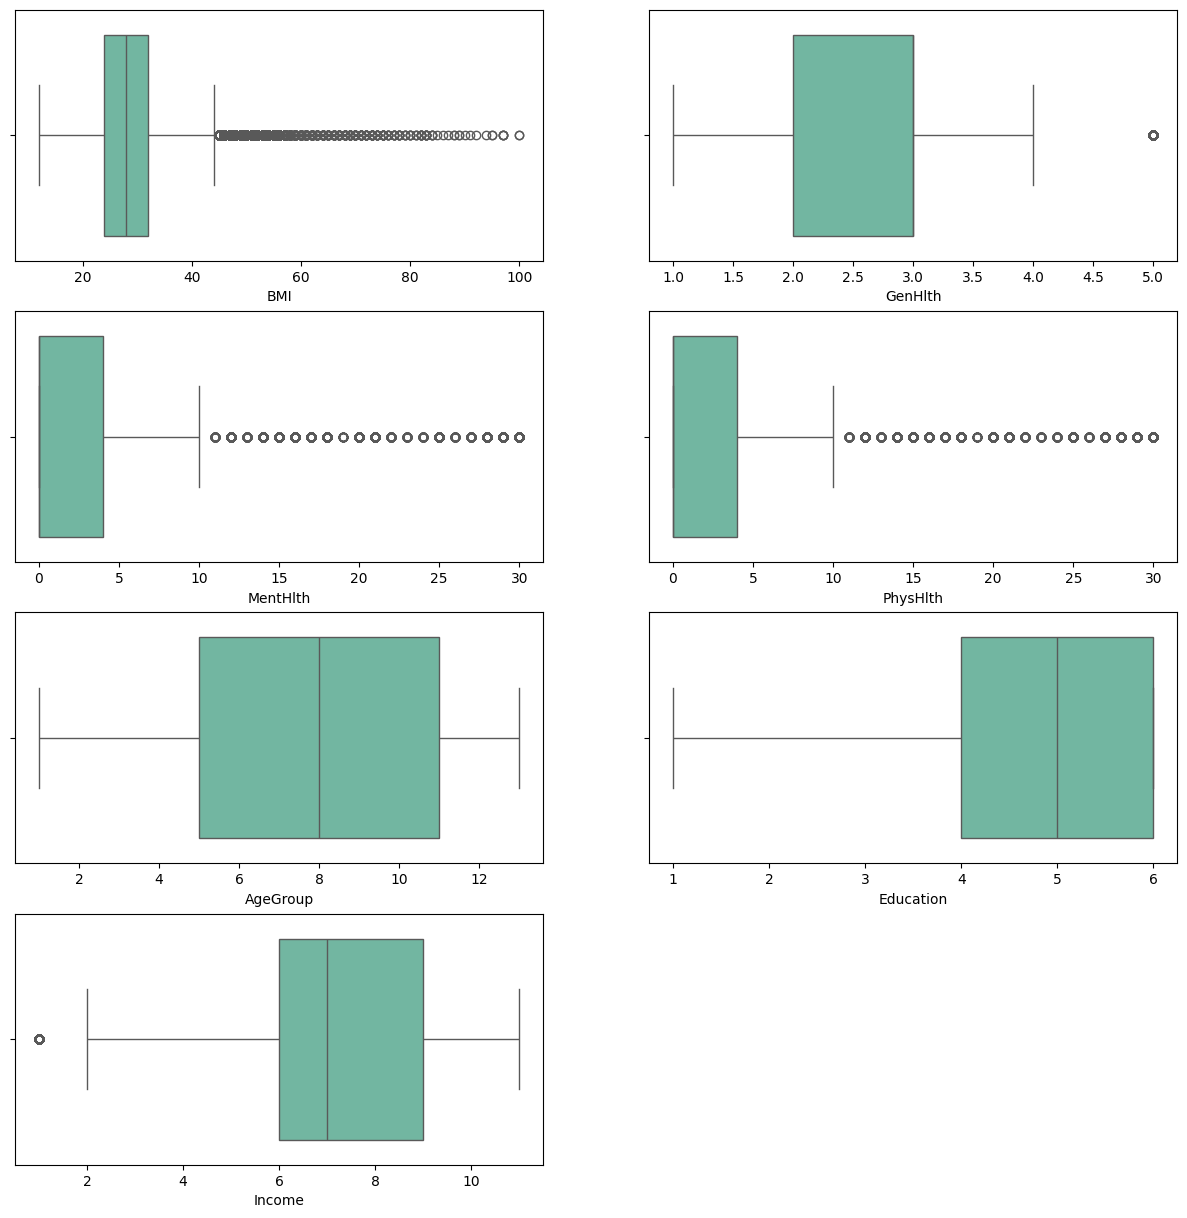

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'AgeGroup','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

### Duplicated data

In [ ]:
duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  18588


KidneyDisease  HighBP  HighChol  CholCheck  Asthma  COPD  BMI  Smoker  \
427              2       1         0          1       2     2   26       0   
428              2       1         1          1       2     2   30       0   
429              2       1         1          1       2     2   23       1   
430              2       0         0          1       2     2   24       1   
431              2       1         1          1       2     2   27       1   

     Stroke  HeartDiseaseorAttack  ...  NoDocbcCost  GenHlth  MentHlth  \
427       0                     0  ...            0        4         0   
428       0                     0  ...            0        3         3   
429       0                     1  ...            0        3         0   
430       0                     0  ...            0        3         0   
431       0                     0  ...            0        3         0   

     PhysHlth  DiffWalk  Sex  AgeGroup  Education  Income  Diabetes_binary  
427         0         1    0        12          5       7                1  
428         2         0    0         9          5       7                0  
429         0         0    1        12          4       7                1  
430         0         0    1        12          5       9                0  
431         0         1    1        12          4       6                1  

[5 rows x 23 columns]

In [ ]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [ ]:
# New shape
data.shape

(243001, 23)

### EDA Preparation

In [ ]:
# grouped variables
target = 'Diabetes_binary'
bool_vars = (data.nunique()[data.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in data.columns if var not in bool_vars and var != 'Diabetes_binary']

In [ ]:

# Replace 0 into Non-Diabetic and 1 into Diabetic
# Add new column Diabetes_binary_str

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

In [ ]:
# Help us to show the categorical variable
data2 = data.copy()

In [ ]:
# Make a copy to avoid modifying the original
data2 = data2.copy()

# 1) Age groups
age_map = {
    1: '18 to 24',  2: '25 to 29', 3: '30 to 34',  4: '35 to 39',
    5: '40 to 44',  6: '45 to 49', 7: '50 to 54',  8: '55 to 59',
    9: '60 to 64', 10: '65 to 69',11: '70 to 74', 12: '75 to 79',
   13: '80 or older'
}
data2['AgeGroup'] = data2['AgeGroup'].map(age_map)

# 2) Binary flags with custom labels
data2['Diabetes_binary'] = data2['Diabetes_binary'].map({0: 'No Diabetes', 1: 'Diabetes'})
data2['HighBP']            = data2['HighBP'].map({0: 'No High BP',  1: 'High BP'})
data2['HighChol']          = data2['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'})
data2['CholCheck']         = data2['CholCheck'].map({0: 'No check in 5 years', 1: 'Checked in 5 years'})
data2['Smoker']            = data2['Smoker'].map({0: 'No', 1: 'Yes'})
data2['Stroke']            = data2['Stroke'].map({0: 'No', 1: 'Yes'})
data2['HeartDiseaseorAttack'] = data2['HeartDiseaseorAttack'].map({0: 'No', 1: 'Yes'})
data2['PhysActivity']      = data2['PhysActivity'].map({0: 'No', 1: 'Yes'})
data2['HvyAlcoholConsump'] = data2['HvyAlcoholConsump'].map({0: 'No', 1: 'Yes'})
data2['AnyHealthcare']     = data2['AnyHealthcare'].map({0: 'No', 1: 'Yes'})
data2['NoDocbcCost']       = data2['NoDocbcCost'].map({0: 'No', 1: 'Yes'})
data2['DiffWalk']          = data2['DiffWalk'].map({0: 'No', 1: 'Yes'})

# 3) Additional health comorbidities
data2['KidneyDisease']     = data2['KidneyDisease'].map({1: 'Yes', 2: 'No'})
data2['Asthma']            = data2['Asthma'].map({1: 'Yes', 2: 'No'})
data2['COPD']              = data2['COPD'].map({1: 'Yes', 2: 'No'})

# 4) General health status
genhlth_map = {
    1: 'Excellent', 2: 'Very good', 3: 'Good',
    4: 'Fair',      5: 'Poor'
}
data2['GenHlth'] = data2['GenHlth'].map(genhlth_map)

# 5) Education levels
edu_map = {
    1: 'Never attended school',
    2: 'Grades 1–8',
    3: 'Grades 9–11',
    4: 'Grade 12 or GED',
    5: 'College 1–3 years',
    6: 'College 4+ years'
}
data2['Education'] = data2['Education'].map(edu_map)

# 6) Income brackets
income_map = {
     1: 'Less than $10,000',
     2: '$10,000 to < $15,000',
     3: '$15,000 to < $20,000',
     4: '$20,000 to < $25,000',
     5: '$25,000 to < $35,000',
     6: '$35,000 to < $50,000',
     7: '$50,000 to < $75,000',
     8: '$75,000 to < $100,000',
     9: '$100,000 to < $150,000',
    10: '$150,000 to < $200,000',
    11: '$200,000 or more'
}
data2['Income'] = data2['Income'].map(income_map)


# EDA

### Target Variable

In [ ]:
#average of column Daibetes_binary
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

Diabetes_binary
No Diabetes    205062
Diabetes        37939
Name: count, dtype: int64

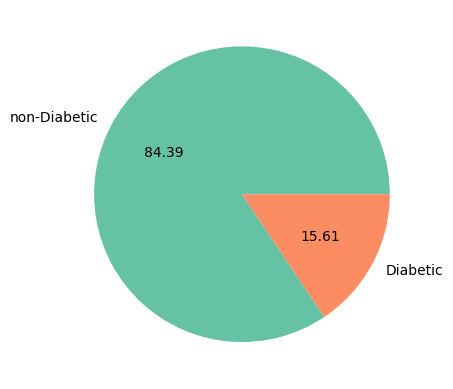

In [ ]:
#checking diabetic and non diabetic pepoles average by pie

labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

Only about 15% of the cleaned dataset has diabetes. It is an **imbalanced** dataset.

### Binary Variables

In [ ]:
cols = [
    'KidneyDisease',
    'HighBP',
    'HighChol',
    'CholCheck',
    'Asthma',
    'COPD',
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
    'Sex',
]

In [ ]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

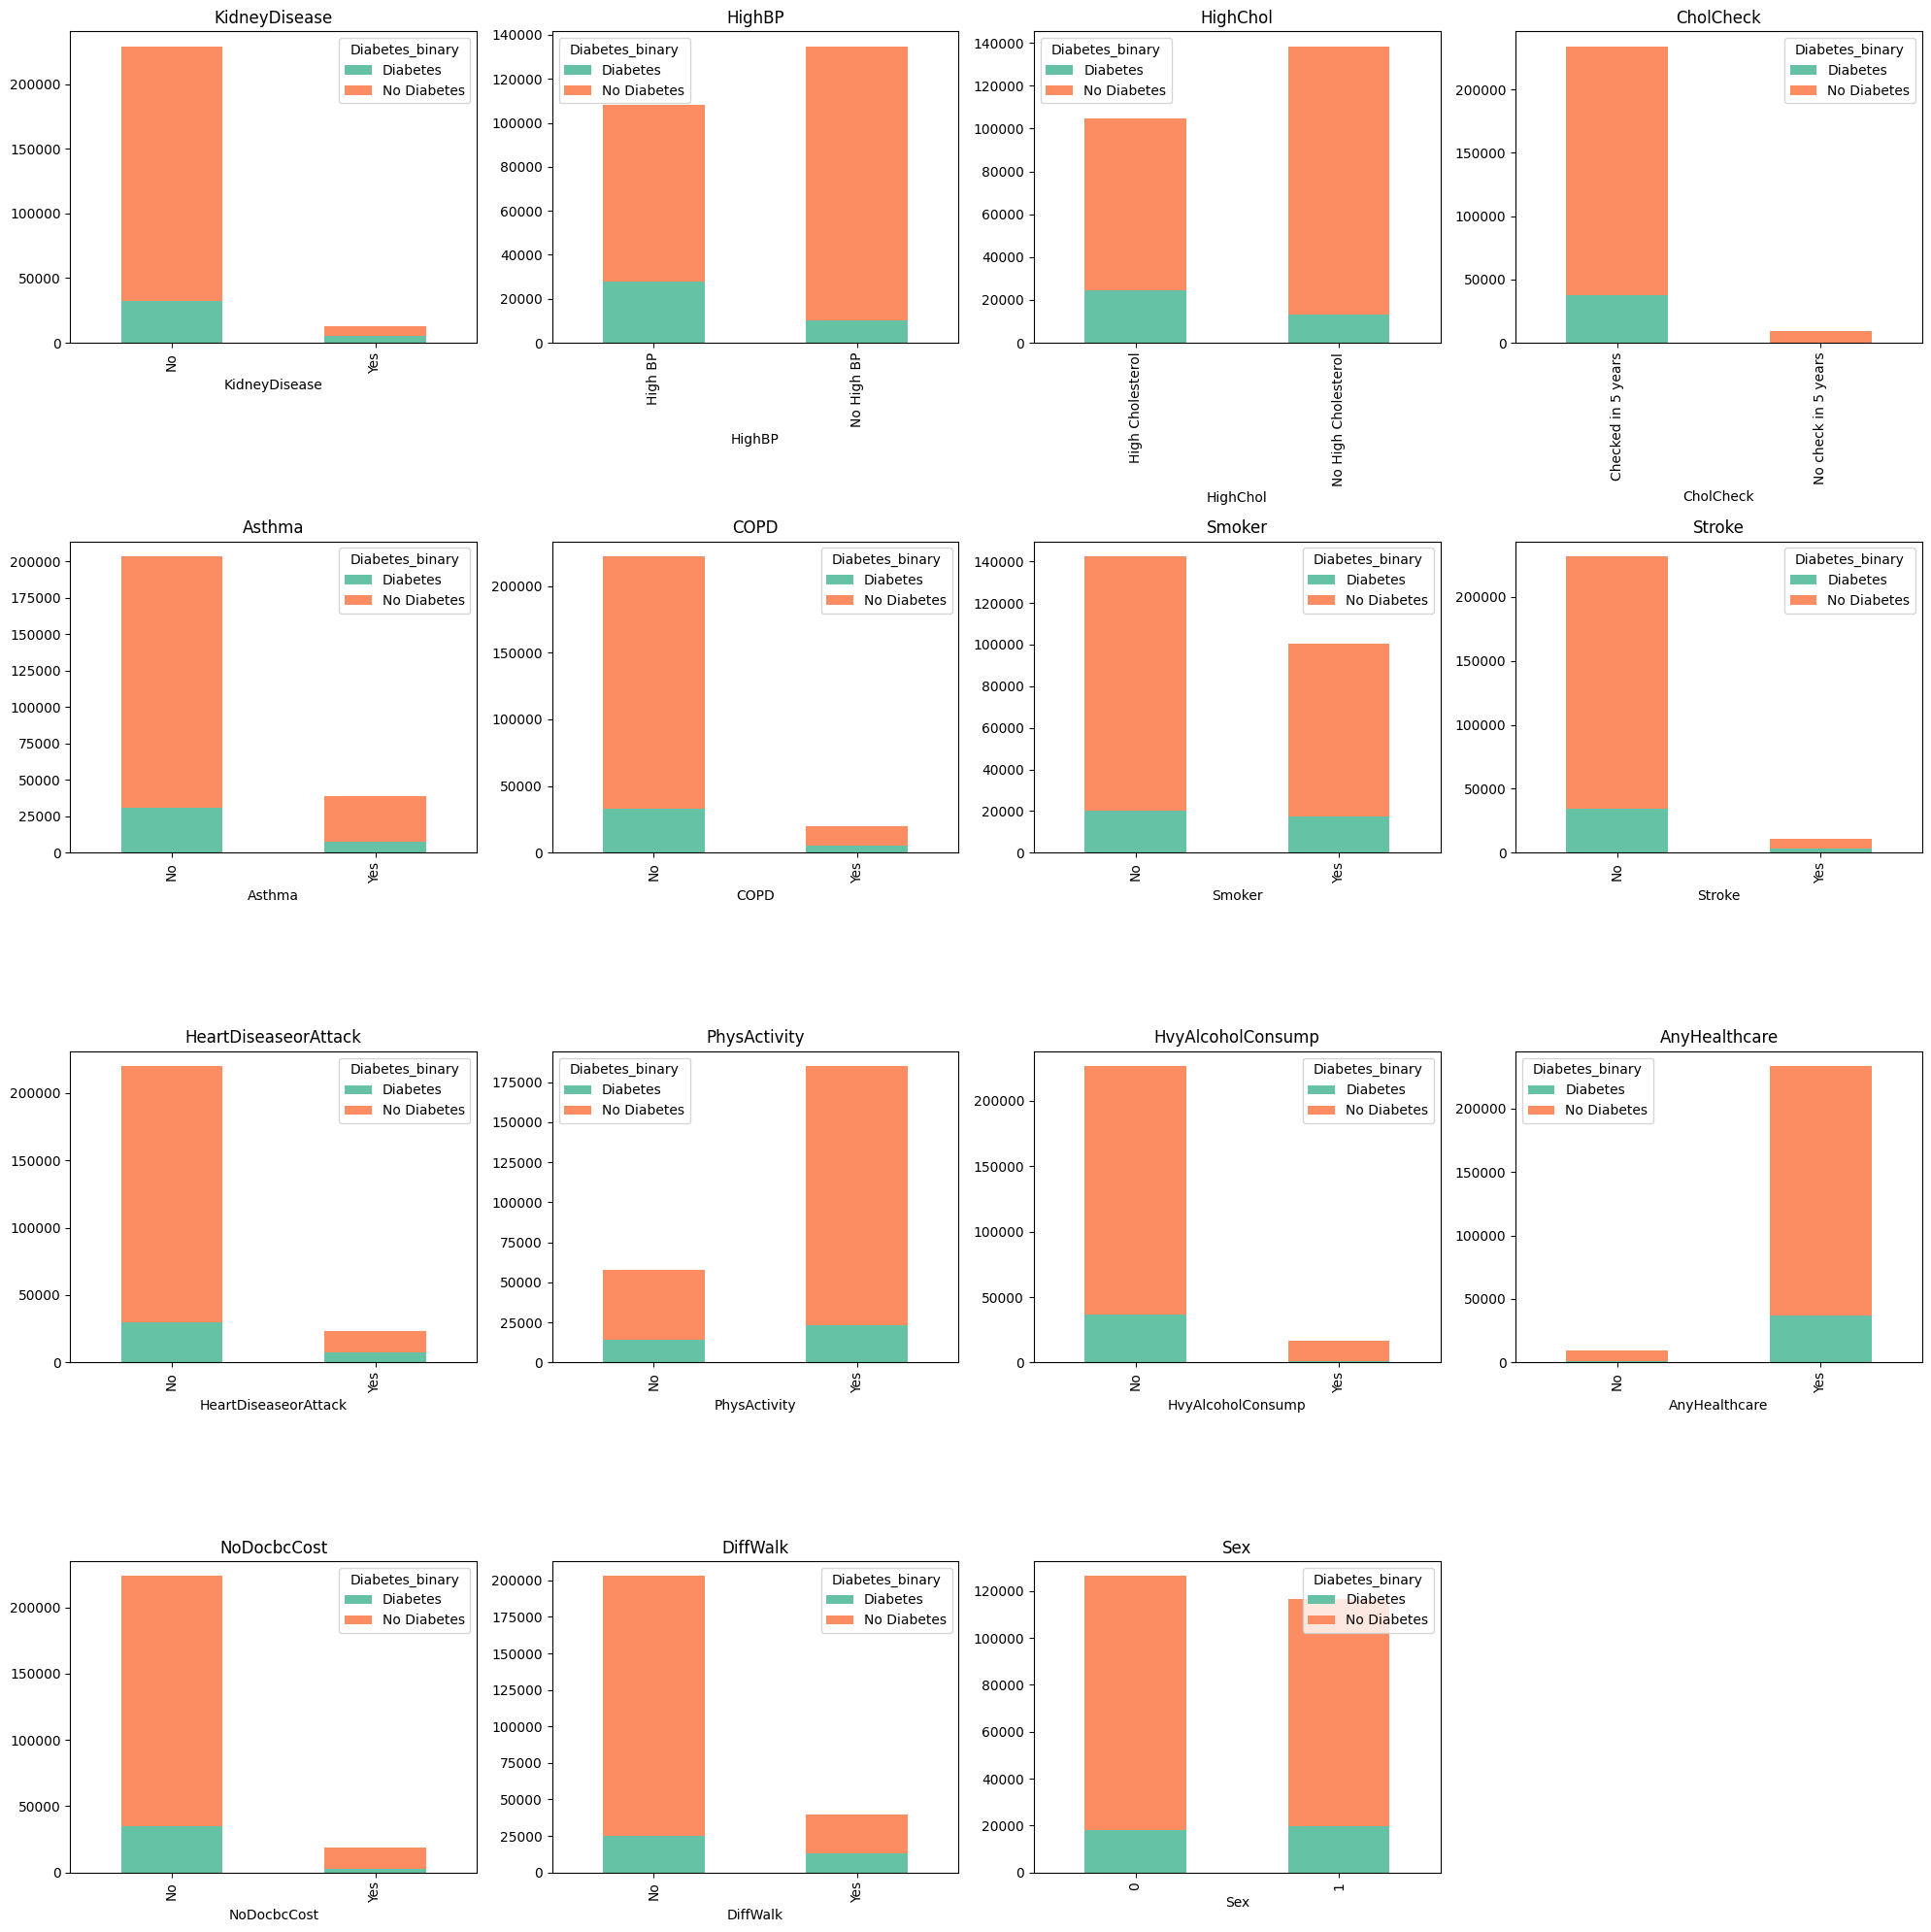

In [ ]:
import math
# Assume `cols` is your list of binary columns
n = len(cols)
ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes_flat = axes.flatten()

for i, col in enumerate(cols):
    create_plot_pivot(data2, col).plot(
        kind='bar',
        stacked=True,
        ax=axes_flat[i]
    )
    axes_flat[i].set_xlabel(col)
    axes_flat[i].set_title(col)

# Turn off any unused axes
for ax in axes_flat[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### Heatmap of Correlation

Text(0.5, 1.0, 'Correlation of Features')

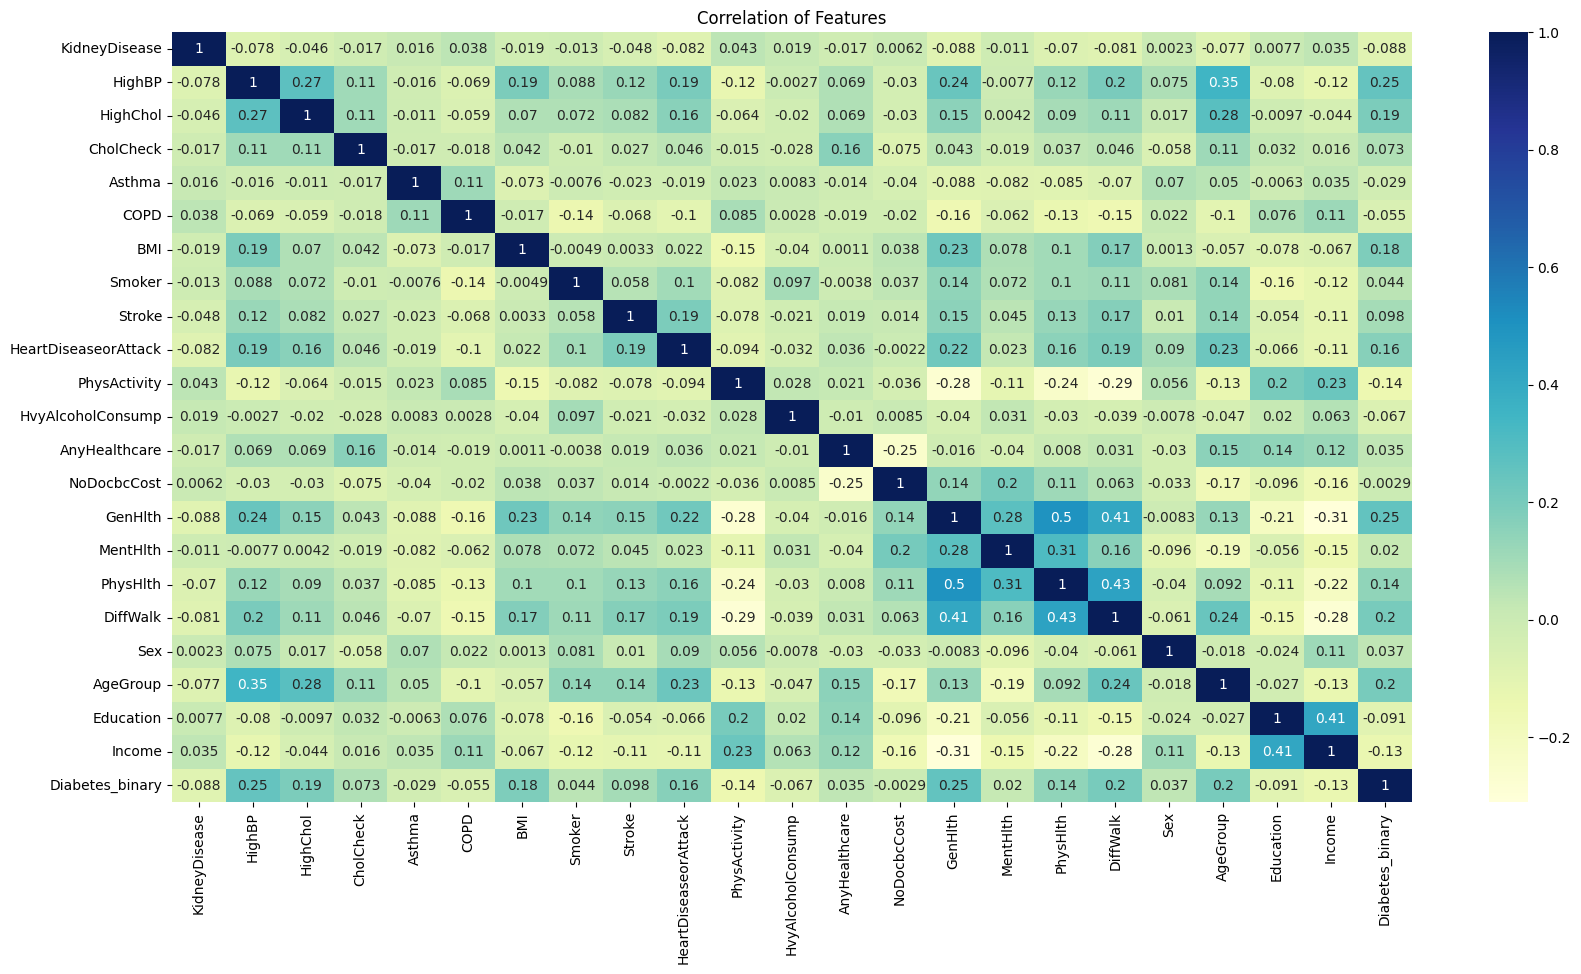

In [ ]:
# Using heatmap to understand correlation better in dataset data
# Heatmap of correlation
data = data.drop('Diabetes_binary_str', axis=1)
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlGnBu')
plt.title("Correlation of Features")

**Correlation Insights from the Heatmap:**

* **Strong positive correlations** (r ≥ 0.40):

  * **GenHlth & PhysHlth** (≈ 0.50)
  * **PhysHlth & DiffWalk** (≈ 0.43)
  * **GenHlth & DiffWalk** (≈ 0.41)
  * **Education & Income**   (≈ 0.41)

* **Strong negative correlations** (r ≤ –0.25):

  * **PhysActivity & GenHlth**      (≈ –0.28)
  * **PhysActivity & DiffWalk**     (≈ –0.29)
  * **AnyHealthcare & NoDocbcCost** (≈ –0.25)

* **Diabetes\_binary’s associations with features**:

  * **Moderate positive correlations**:

    * **HighBP** (0.25)
    * **GenHlth** (0.25)
    * **AgeGroup** (0.20)
    * **HighChol** (0.19)
    * **BMI** (0.18)
  * **Slight negative correlations**:

    * **PhysActivity** (–0.14)
    * **NoDocbcCost**  (–0.03)

Overall, the general health measures (`GenHlth`, `PhysHlth`, `DiffWalk`) tend to move in tandem—more days of poor physical health coincide with worse overall health and greater difficulty walking—while physical activity is inversely correlated with those same measures. Meanwhile, higher education and household income levels also rise and fall together. Finally, the target variable (`Diabetes_binary`) shows its strongest associations with high blood pressure, general health status, age, and high cholesterol, and a much weaker (negative) association with physical activity.


### Bargraph of Correlation

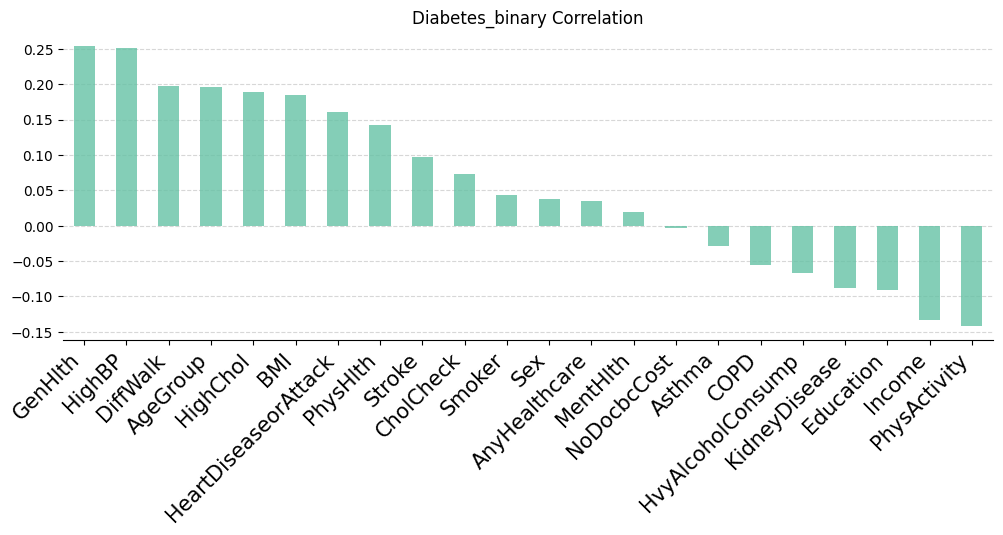

In [ ]:
(data.drop('Diabetes_binary', axis=1)
   .corrwith(data.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
)
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

**Diabetes_binary’s relation with other columns Through bar Graph Result:**  

These variables are more correlated with the target variable **Diabetes_binary**:  
* GenHlth  
* HighBP  
* DiffWalk  
* BMI  
* HighChol  
* Age  
* HeartDiseaseorAttack  
* PhysHlth  
* PhysActivity  
* Education  
* Income  

These variables have a very weak correlation with **Diabetes_binary**:  
* AnyHealthcare  
* NoDocbcCost  
* Fruits  
* Sex  
* Smoker  
* Veggies  


### Analyzing Correlation

#### GenHealth

Patients were asked to rate their overall health status on a 1-5 scale, where:

* 1 = Excellent
* 2 = Very Good
* 3 = Good
* 4 = Fair
* 5 = Poor

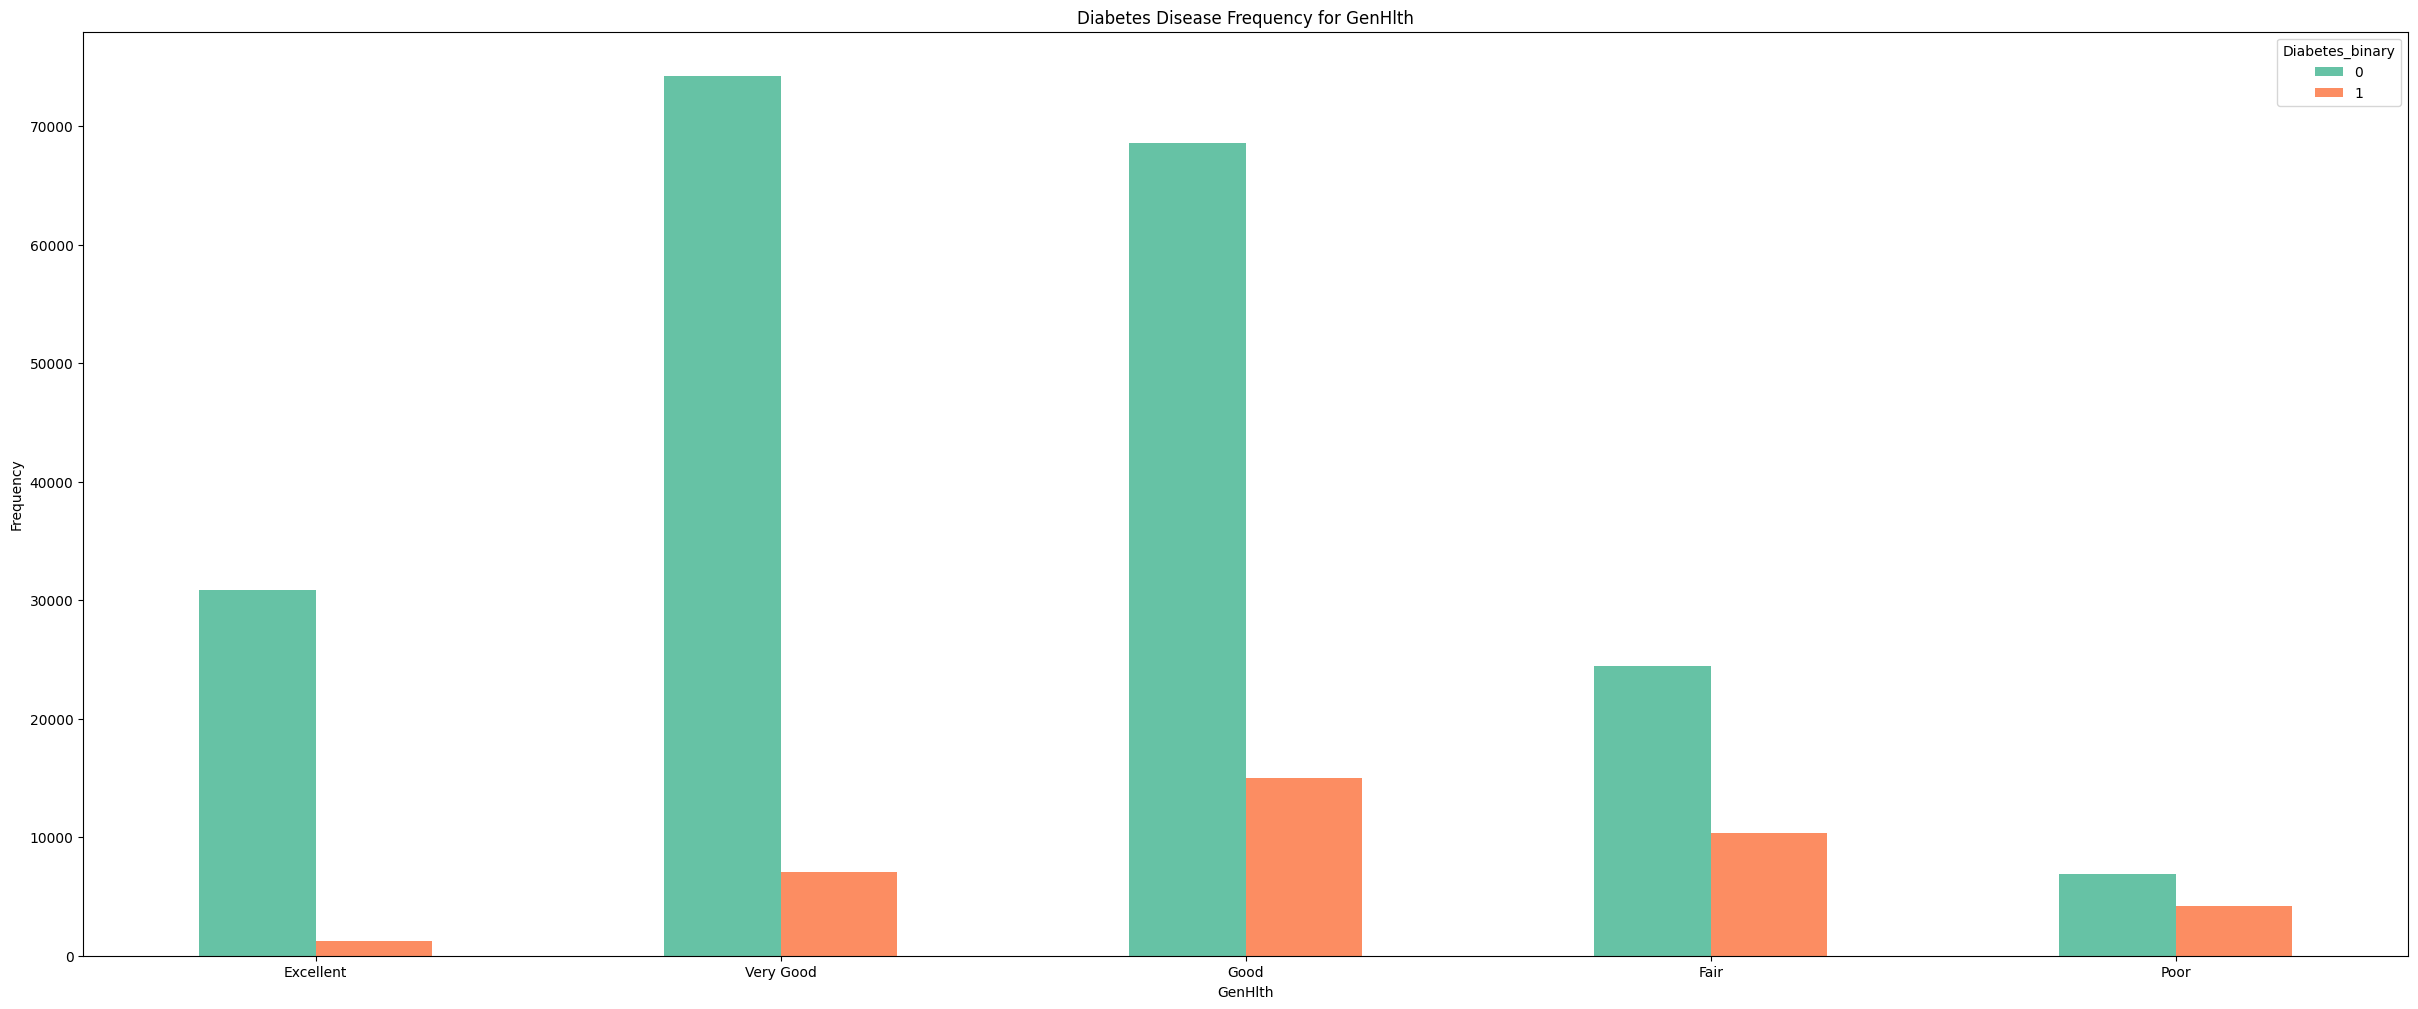

In [ ]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12))
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(ticks=np.arange(5), rotation=0, labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.ylabel('Frequency')
plt.show()

Though not many peolpe have Fair or Poor health, most of them have diabetes.

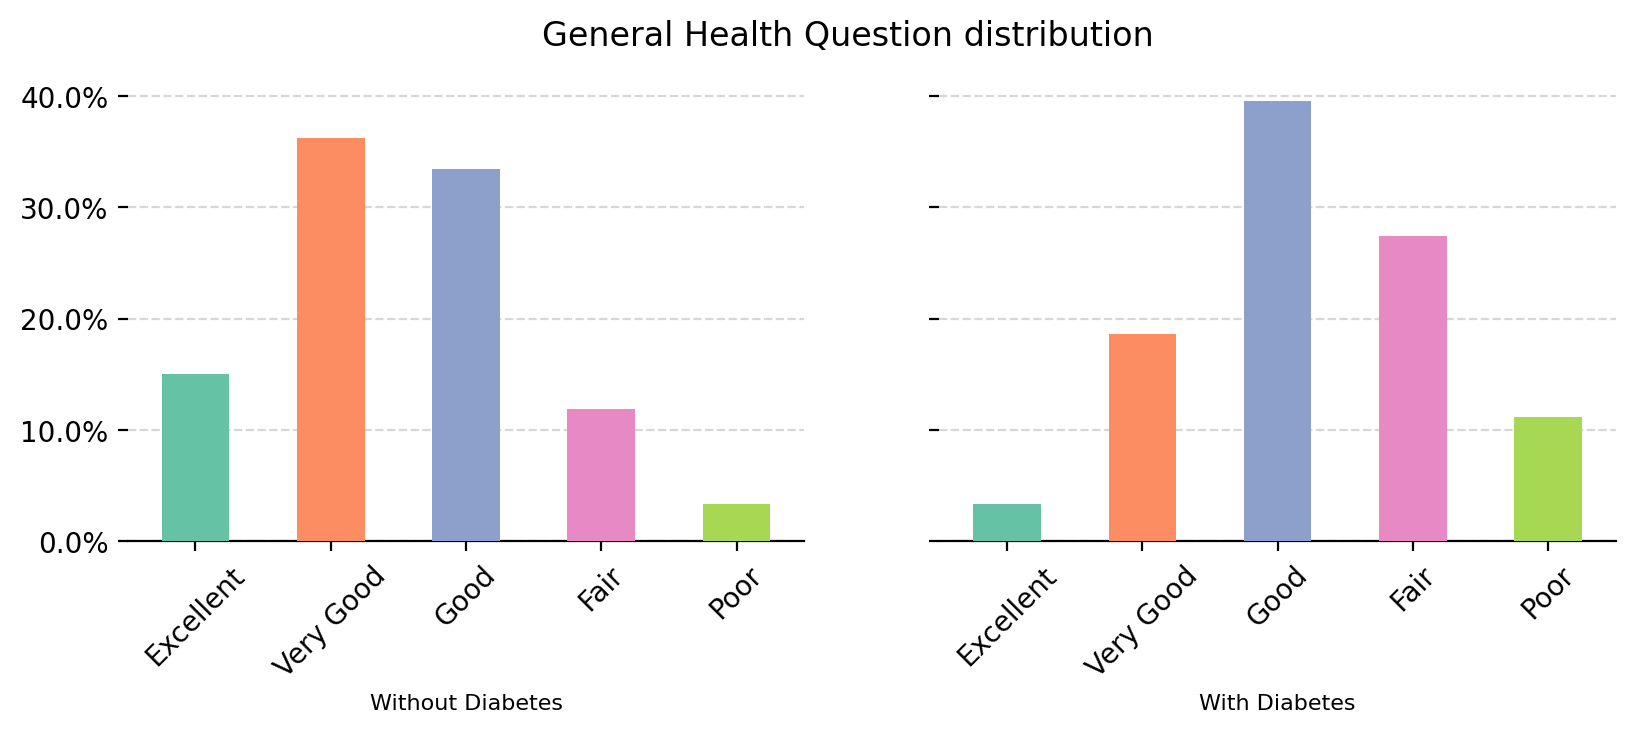

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('General Health Question distribution')

(data[data['Diabetes_binary']==False]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(data[data['Diabetes_binary']==True]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

According to self-reported data from the dataset, individuals with diabetes perceive a significantly lower level of well-being compared to those without the condition.

#### HighBP
It is the patient Blood pressure classification. Specifically, adults who have been told they have high blood pressure by a doctor, nurse, or other health professional

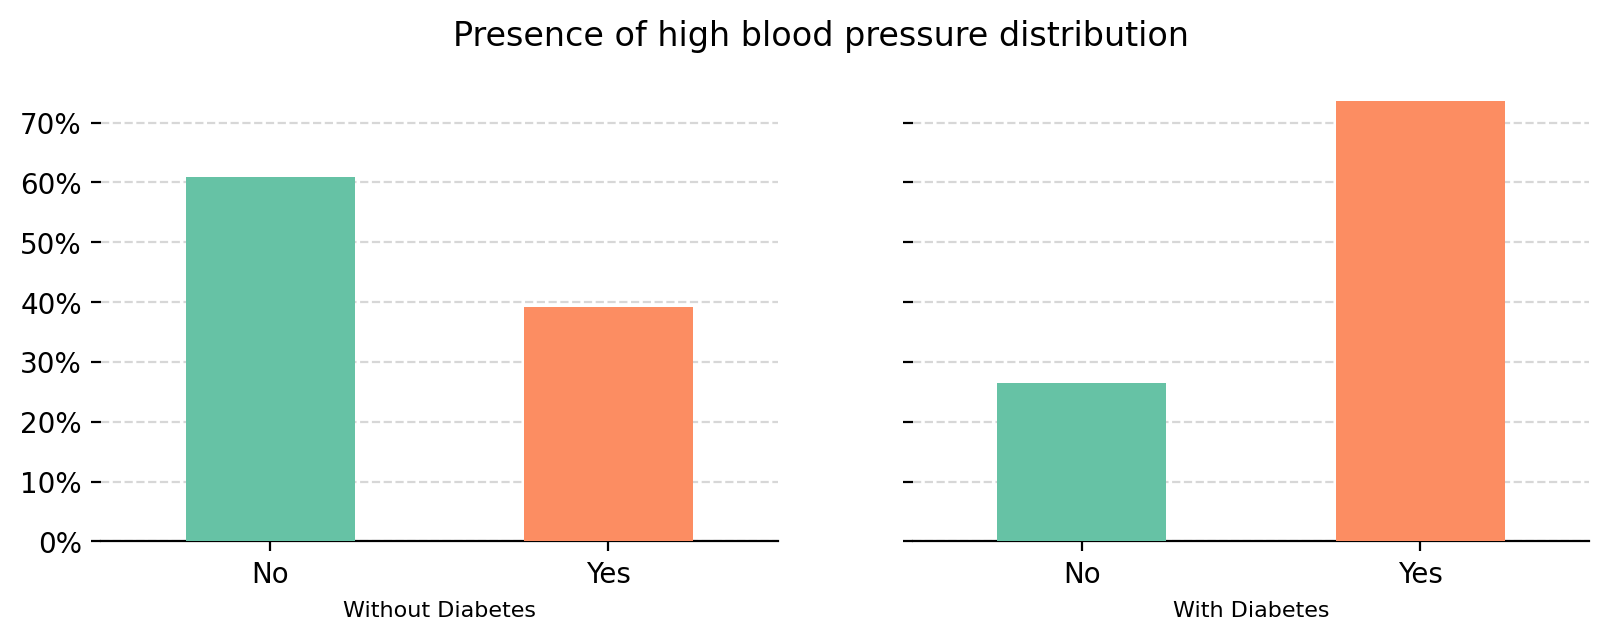

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of high blood pressure distribution')

(data[data['Diabetes_binary']==False]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(data[data['Diabetes_binary']==True]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly greater incidence of hypertension compared to those without the condition

#### DiffWalk

Patients where asked: *'Do you have serious difficulty walking or climbing stairs?'*

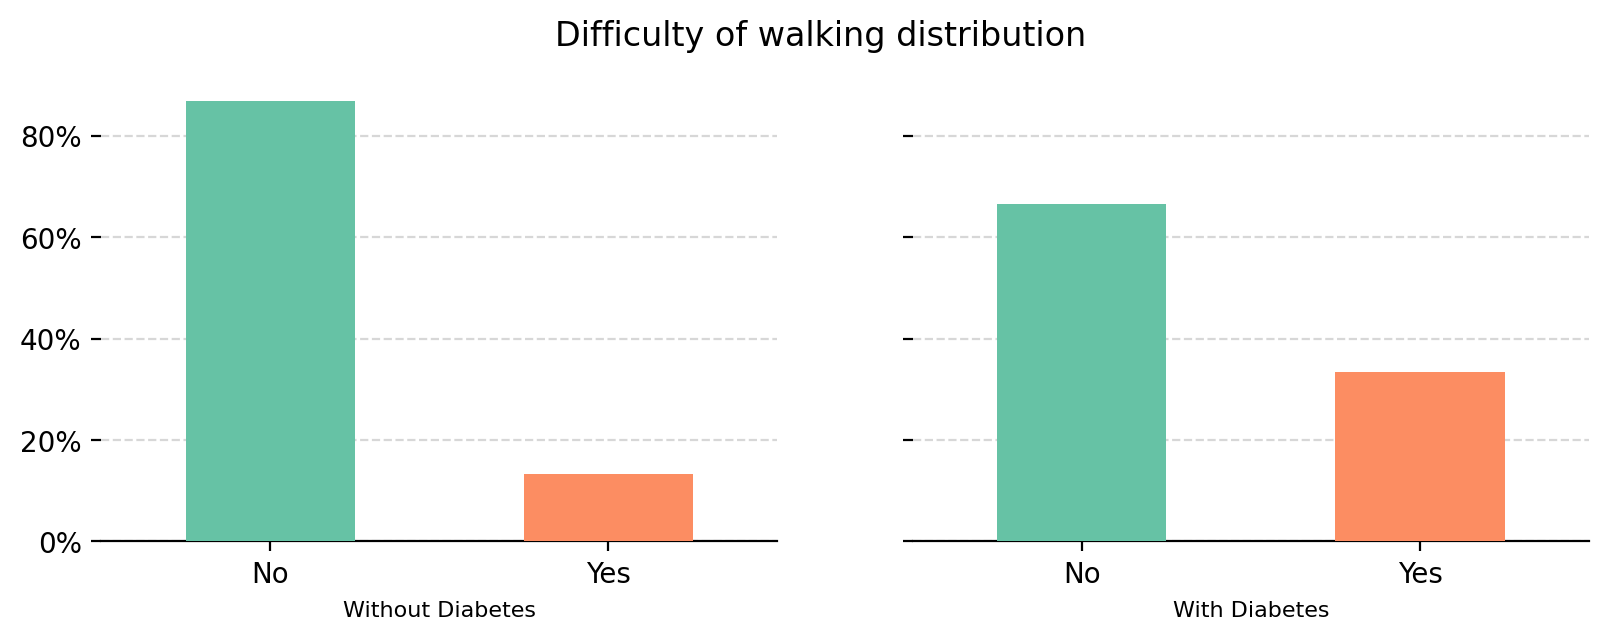

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Difficulty of walking distribution')

(data[data['Diabetes_binary']==False]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=sns.color_palette("Set2"))).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(data[data['Diabetes_binary']==True]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=sns.color_palette("Set2"))).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly greater difficulty walking compared to those without the condition

#### BMI
Body Mass Index (BMI) is a measure of body fat based on a person's weight and height. It is calculated by dividing a person's weight in kilograms by the square of their height in meters (kg/m²).

\begin{equation}
BMI = \frac{weight \ (kg)}{height^2 \ (m^2)}
\end{equation}

BMI provides an estimation of the amount of body fat a person has, and is commonly used as a screening tool to identify individuals who may be at a higher risk for weight-related health problems, such as diabetes, heart disease, and certain types of cancer.

<ipython-input-36-f629e3e38d95>:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  bar_plot = sns.barplot(x='BMI', y='count', hue='Diabetes_binary', data=bmi_counts, palette=palette)


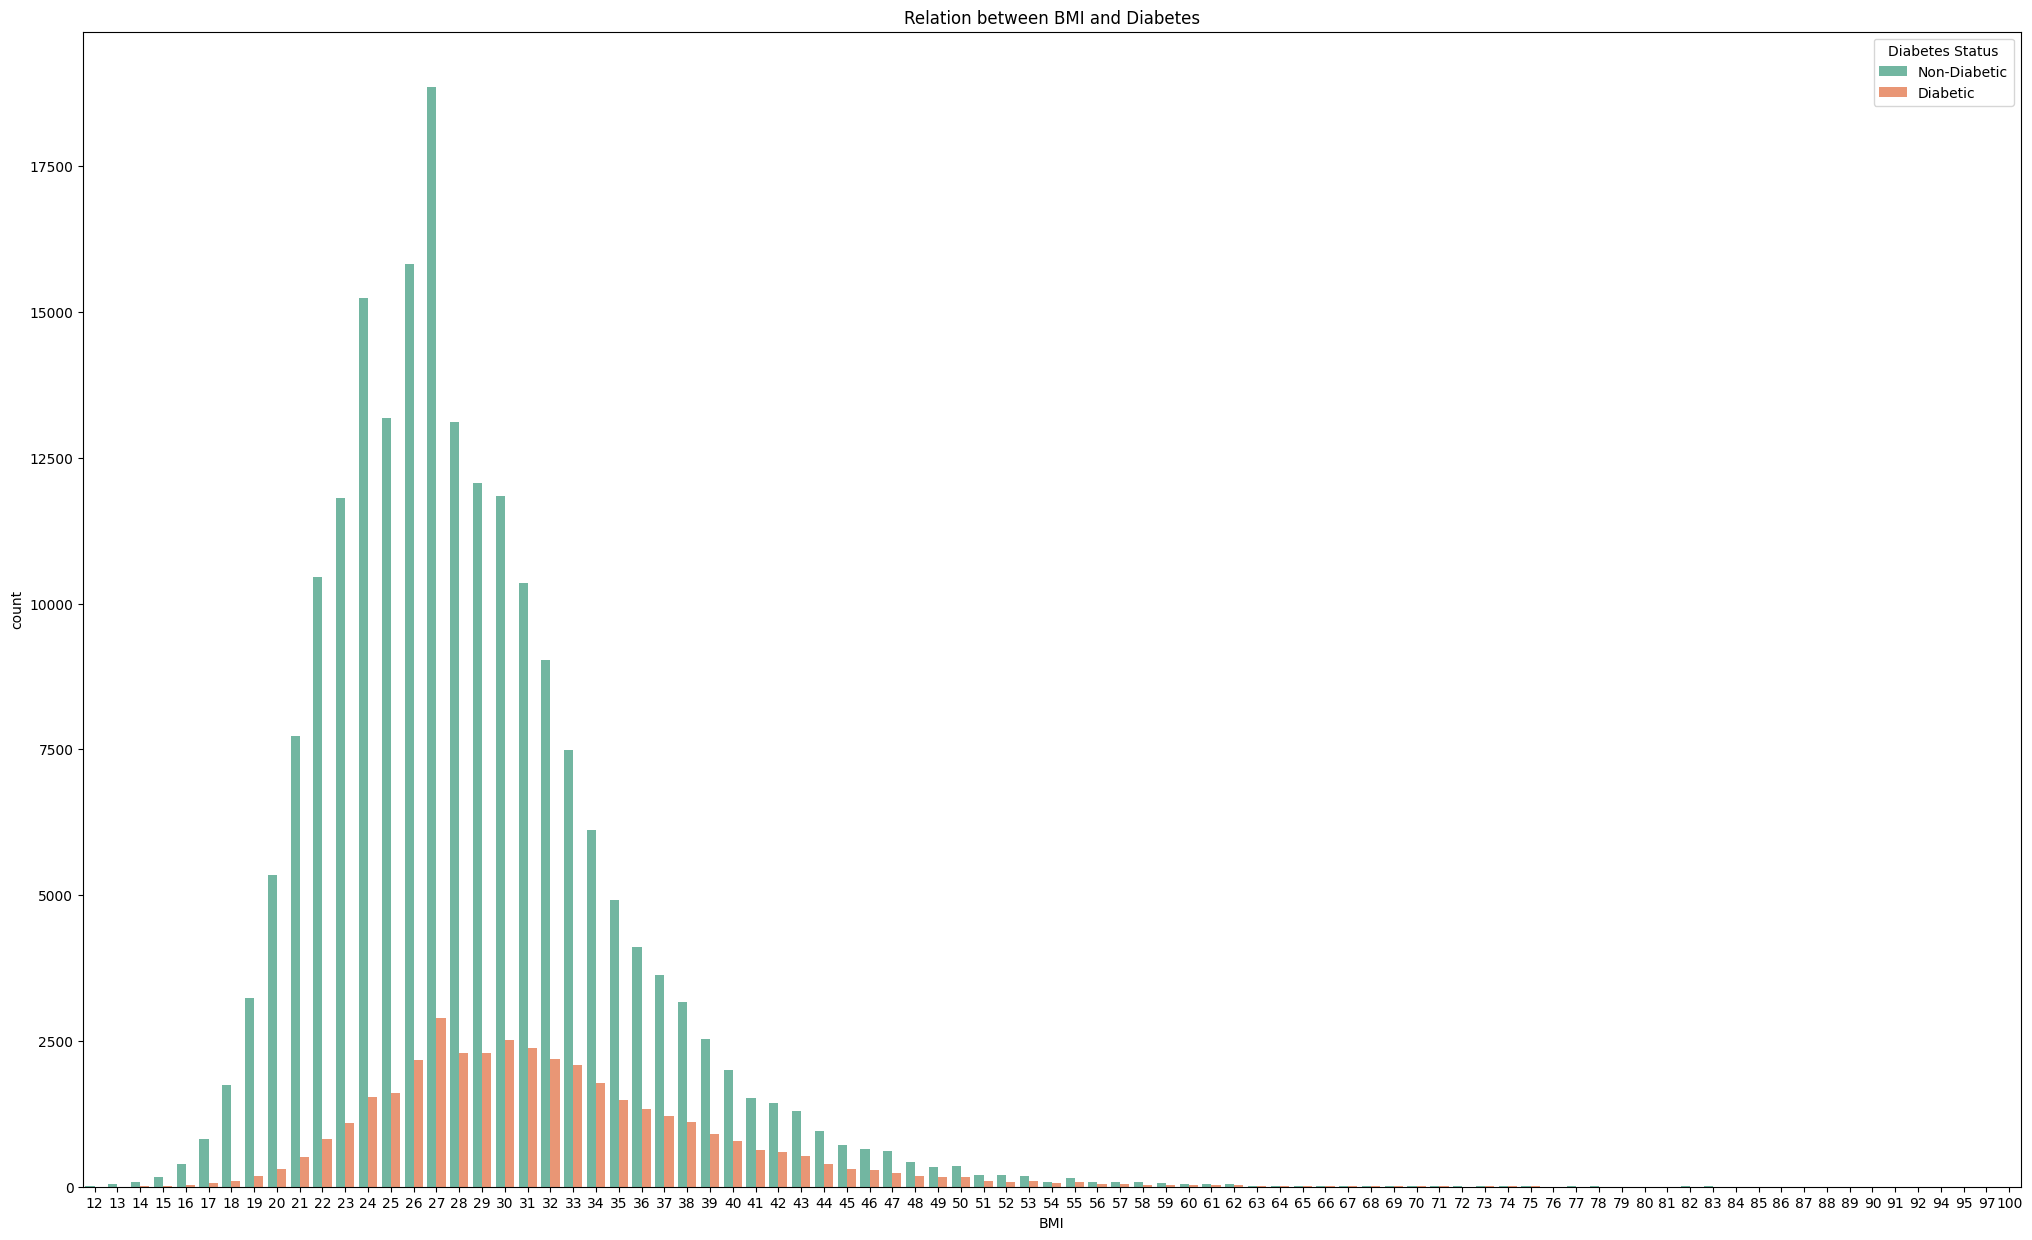

In [ ]:
# Create a new DataFrame with the count of patients for each BMI, differentiated by Diabetes_binary
bmi_counts = data.groupby(['BMI', 'Diabetes_binary']).size().reset_index(name='count')

# Adjusting 'Diabetes_binary' for meaningful legend labels
bmi_counts['Diabetes_binary'] = bmi_counts['Diabetes_binary'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

palette = sns.color_palette("Set2")

# Plotting
plt.figure(figsize=(25, 15))
bar_plot = sns.barplot(x='BMI', y='count', hue='Diabetes_binary', data=bmi_counts, palette=palette)
plt.title("Relation between BMI and Diabetes")
plt.legend(title='Diabetes Status')
plt.show()

As we can see people range between 24-33 BMI have more likely to have Diabetic.

**How is BMI interpreted for adults?**

According with CDC:

For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

* If your BMI is less than 18.5, it falls within the Underweight range.
* If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
* If your BMI is 25.0 to 29.9, it falls within the Overweight range.
* If your BMI is 30.0 or higher, it falls within the Obese range.

A new column was created with this range names.

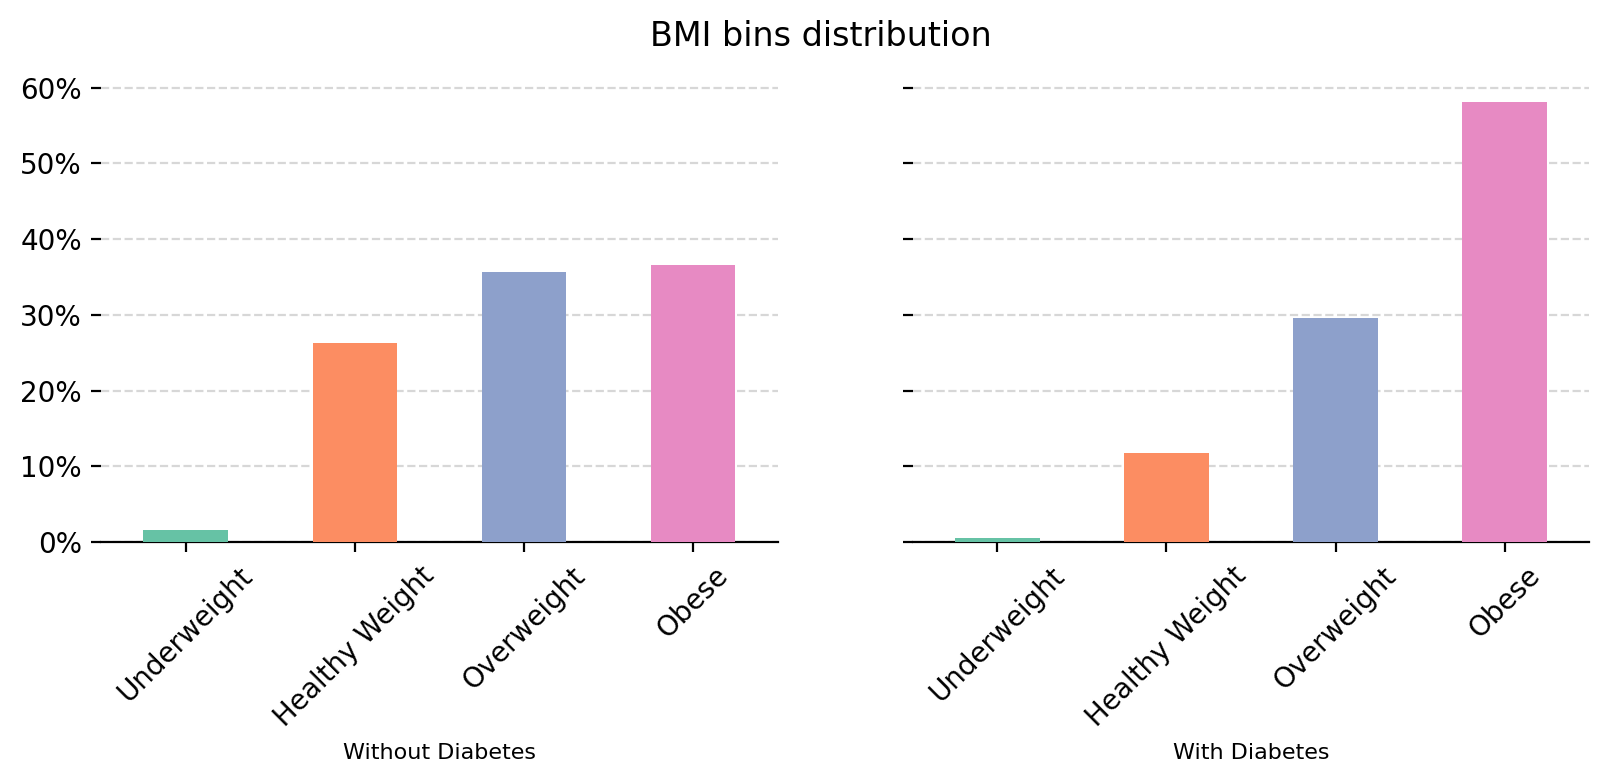

In [ ]:
# create new binned column
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = [1,2,3,4]
data['BMI_bins'] = pd.cut(data['BMI'], bins=bins, labels=labels)
# Color palette
palette = sns.color_palette("Set2")

labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('BMI bins distribution')

(data[data['Diabetes_binary']==False]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(data[data['Diabetes_binary']==True]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_xticklabels(labels)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

The analysis indicates that there is no significant correlation between BMI bins and the group without diabetes, whereas a strong positive correlation between diabetes and obesity was observed.

#### HighChol

Patients where asked: *'Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?'*

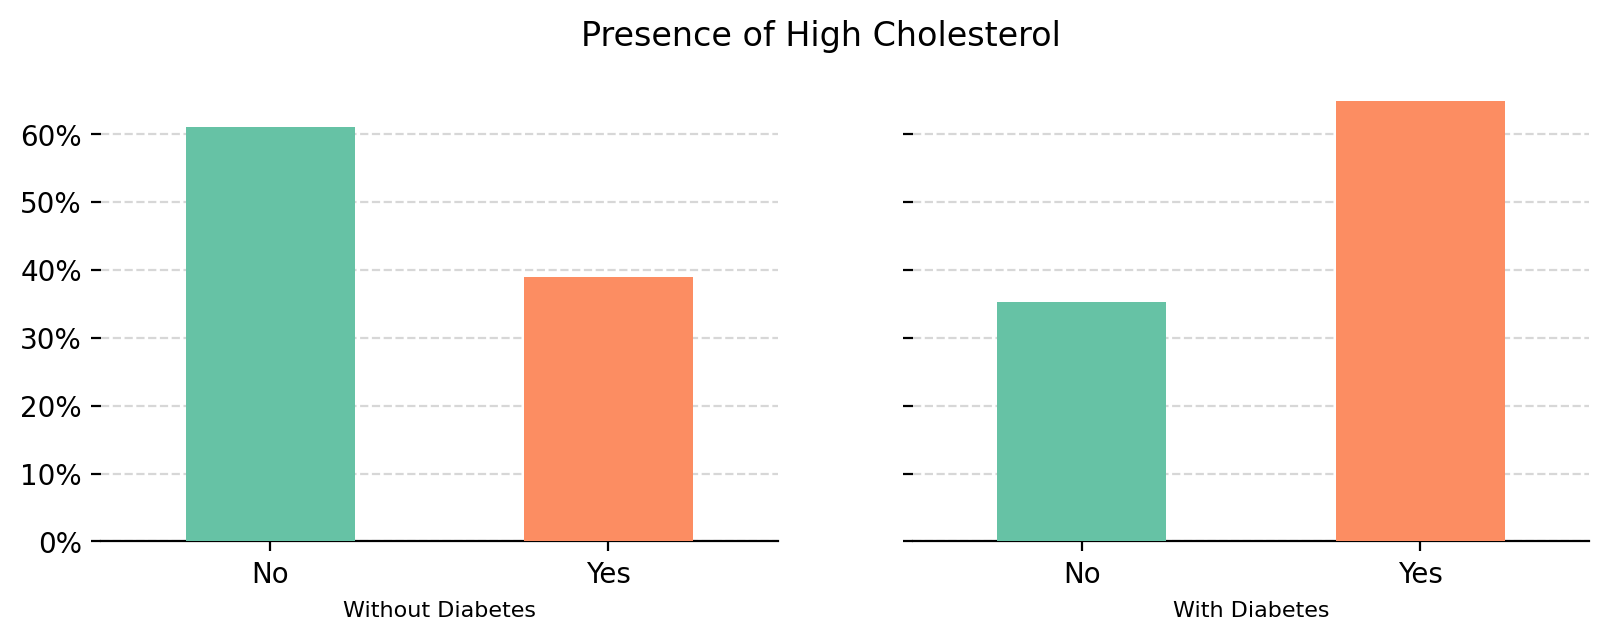

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of High Cholesterol')

(data[data['Diabetes_binary']==False]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(data[data['Diabetes_binary']==True]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly higher cholesterol compared to those without the condition.

#### Age

It is patient age classification with 5 year increments, where:

* 1 = 18-24 years old
* 2 = 25-29 years old
* 3 = 30-34 years old
* 4 = 35-39 years old
* 5 = 40-44 years old
* 6 = 45-49 years old
* 7 = 50-54 years old
* 8 = 55-59 years old
* 9 = 60-64 years old
* 10 = 65-69 years old
* 11 = 70-74 years old
* 12 = 75-79 years old
* 13 = 80 years and older

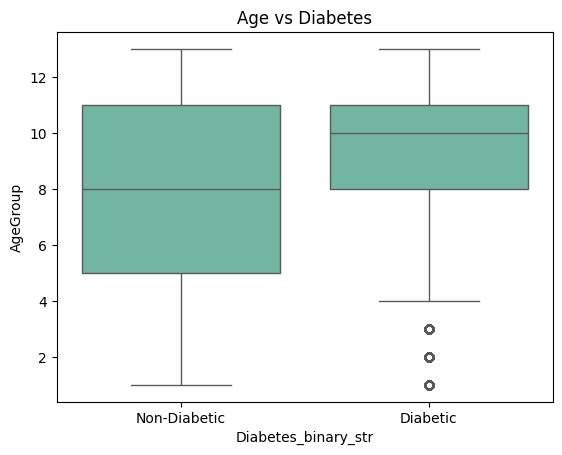

In [ ]:
data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})
sns.boxplot(x = 'Diabetes_binary_str', y = 'AgeGroup', data = data)
plt.title('Age vs Diabetes')
plt.show()
data = data.drop('Diabetes_binary_str', axis=1)

The box plot comparison indicates that diabetic individuals tend to be older than non-diabetic individuals, as evidenced by a higher median age and the presence of older outliers in the diabetic group.

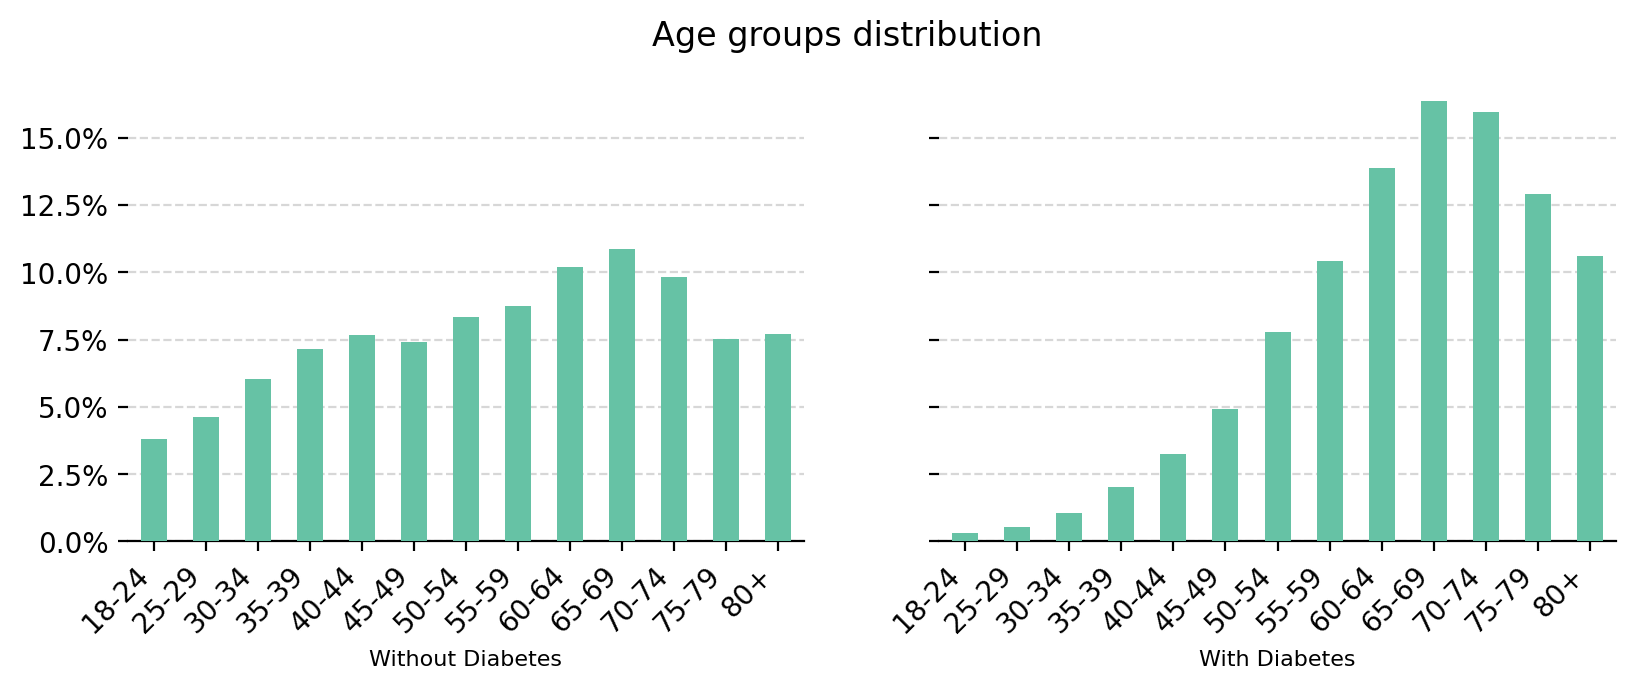

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Age groups distribution')
age_groups = ['18-24', '25-29', '30-34',
              '35-39', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74',
              '75-79', '80+']


(data[data['Diabetes_binary']==False]['AgeGroup']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(age_groups)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

(data[data['Diabetes_binary']==True]['AgeGroup']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(age_groups)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');

There is a notable concentration of individuals diagnosed with Diabetes between the ages of 50 to 74 years, in contrast to those without the condition.

#### HeartDiseaseorAttack

 Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

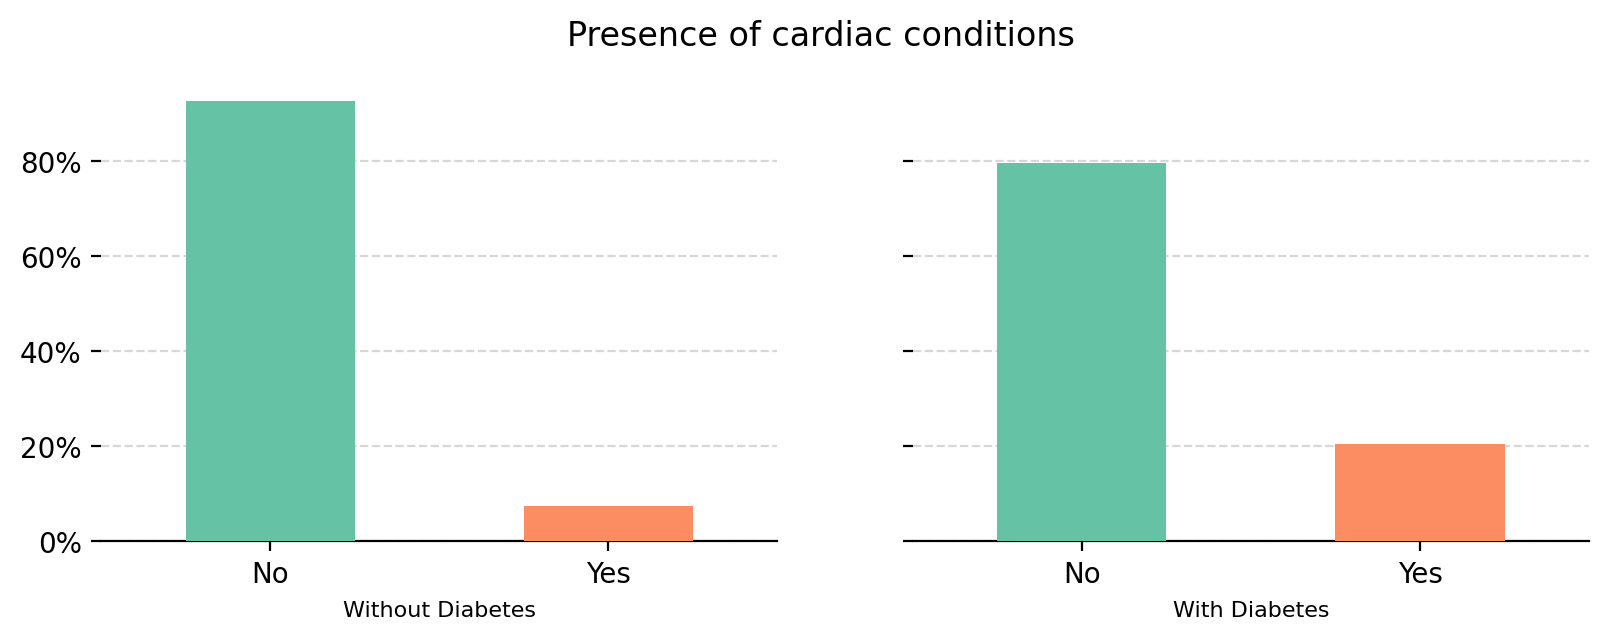

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of cardiac conditions')

(data[data['Diabetes_binary']==False]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(data[data['Diabetes_binary']==True]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that a large majority of individuals without diabetes do not have cardiac conditions, while a significant portion of those with diabetes also have cardiac conditions. The prevalence of cardiac conditions is substantially higher in the diabetic group.

#### PhysHlth
Patients were asked: *'Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?'*

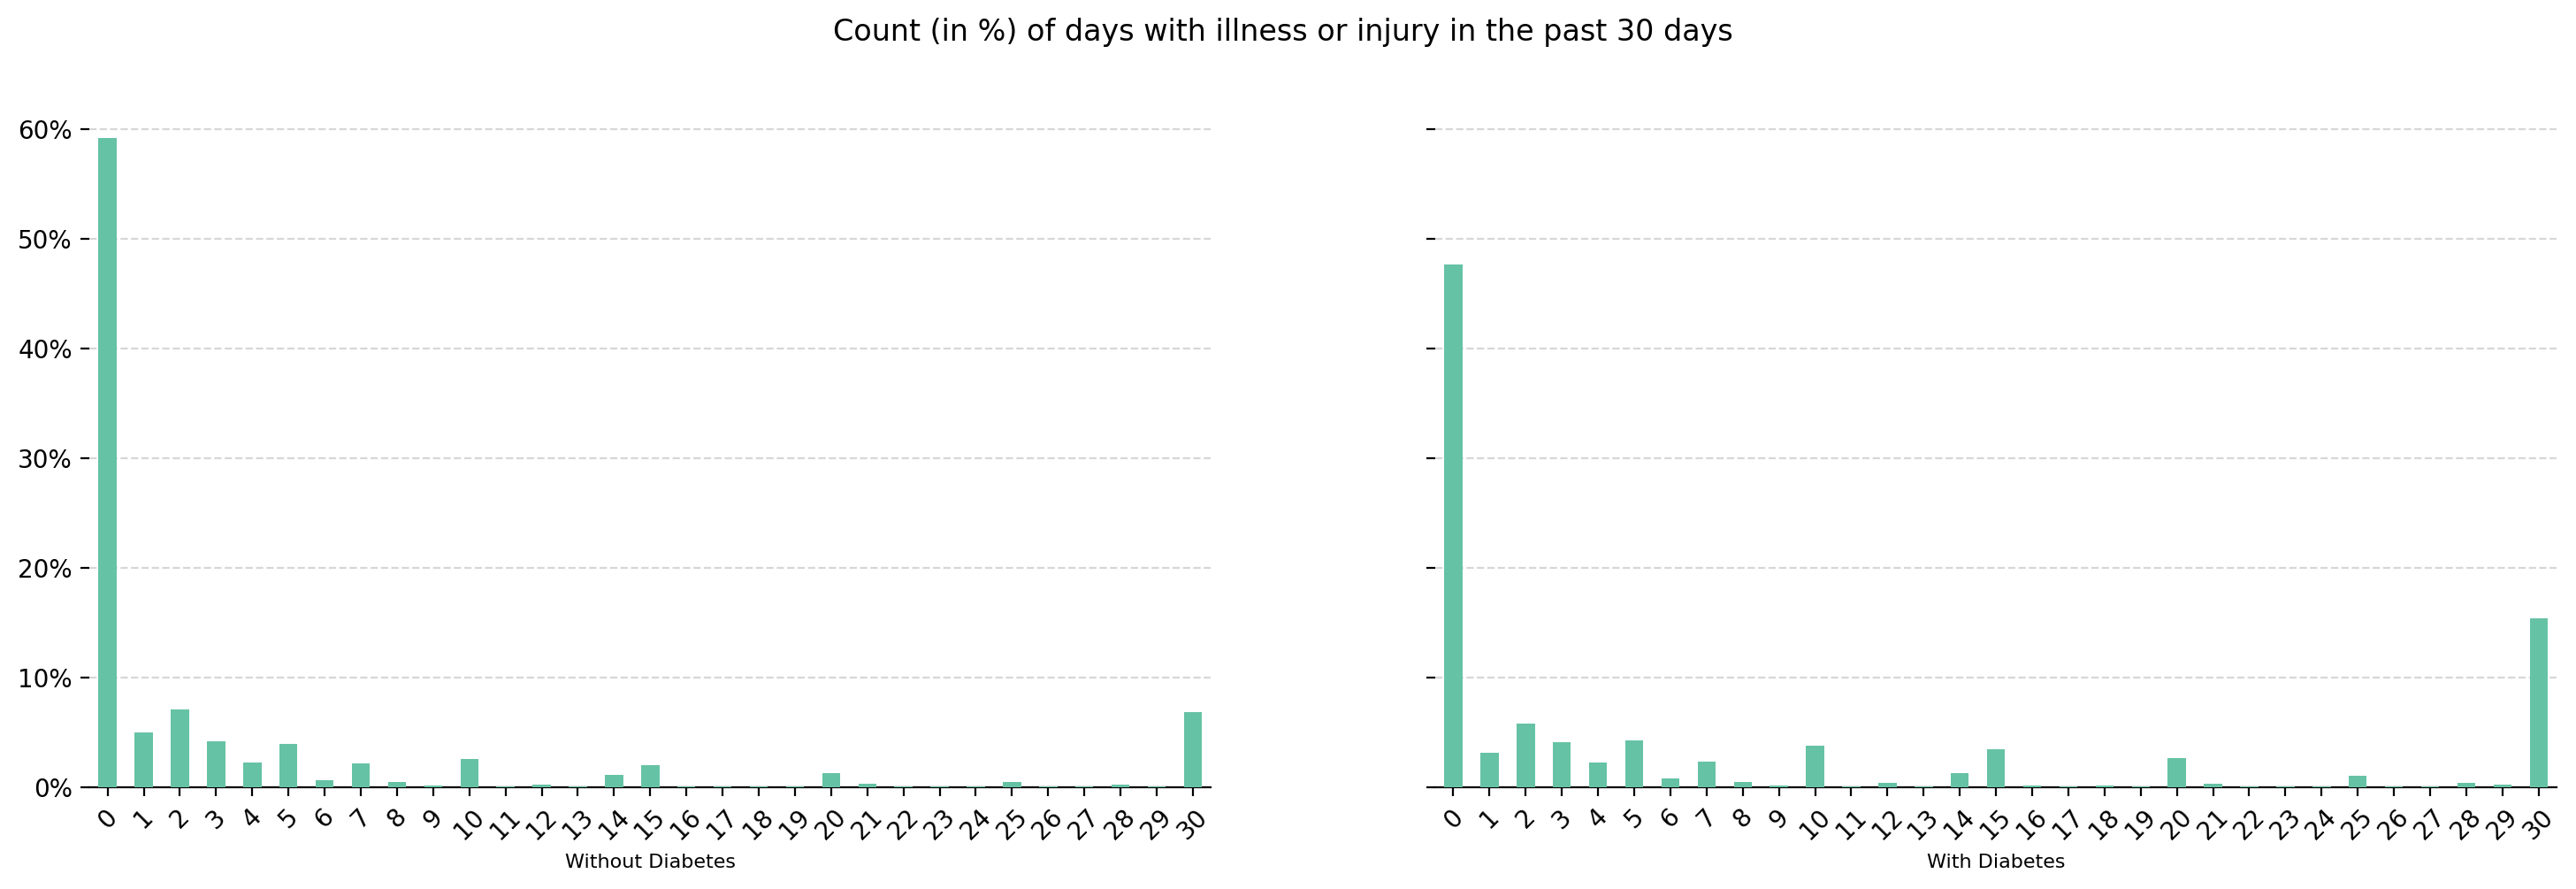

In [ ]:
ratio = 5
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.6,ratio), dpi=200, sharey=True)
fig.suptitle('Count (in %) of days with illness or injury in the past 30 days')

(data[data['Diabetes_binary']==False]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

(data[data['Diabetes_binary']==True]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly presence of days with some type of illness or injury compared to those without the condition

#### Education

This variable is an answer to Education level question:

***What is the highest grade or year of school you completed?***

* 1 = Never attended school or only kindergarten
* 2 = Grades 1 through 8 (Elementary)
* 3 = Grades 9 through 11 (Some high school)
* 4 = Grade 12 or GED (High school graduate)
* 5 = College 1 year to 3 years (Some college or technical school)
* 6 = College 4 years or more (College graduate)

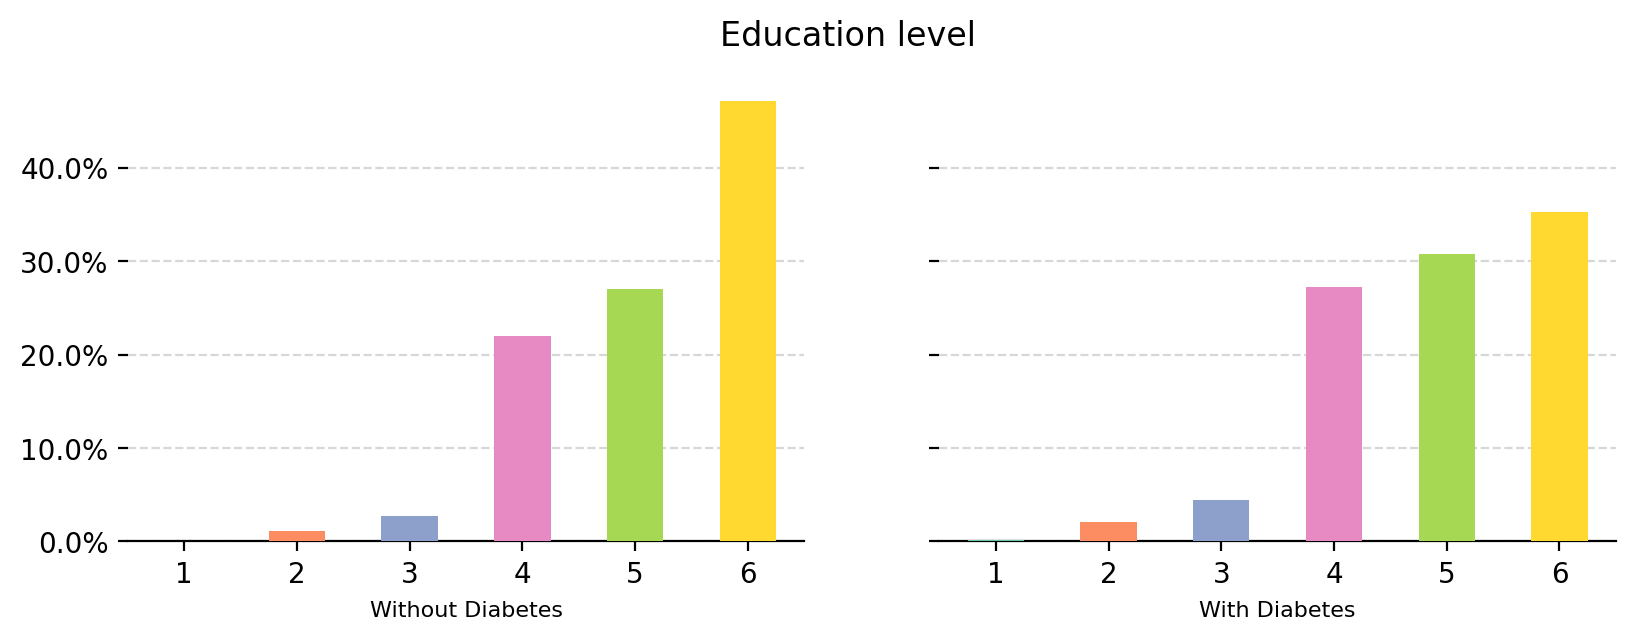

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Education level')


(data[data['Diabetes_binary']==False]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)


(data[data['Diabetes_binary']==True]['Education']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=palette)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)

There are fewer individuals with a college degree who have been diagnosed with diabetes compared to those without the condition.

#### Income

Patient’s annual household income from all sources (in USD):

* 1 = Less than \$10,000  
* 2 = \$10,000 to < \$15,000  
* 3 = \$15,000 to < \$20,000  
* 4 = \$20,000 to < \$25,000  
* 5 = \$25,000 to < \$35,000  
* 6 = \$35,000 to < \$50,000  
* 7 = \$50,000 to < \$75,000  
* 8 = \$75,000 to < \$100,000  
* 9 = \$100,000 to < \$150,000  
* 10 = \$150,000 to < \$200,000  
* 11 = \$200,000 or more  


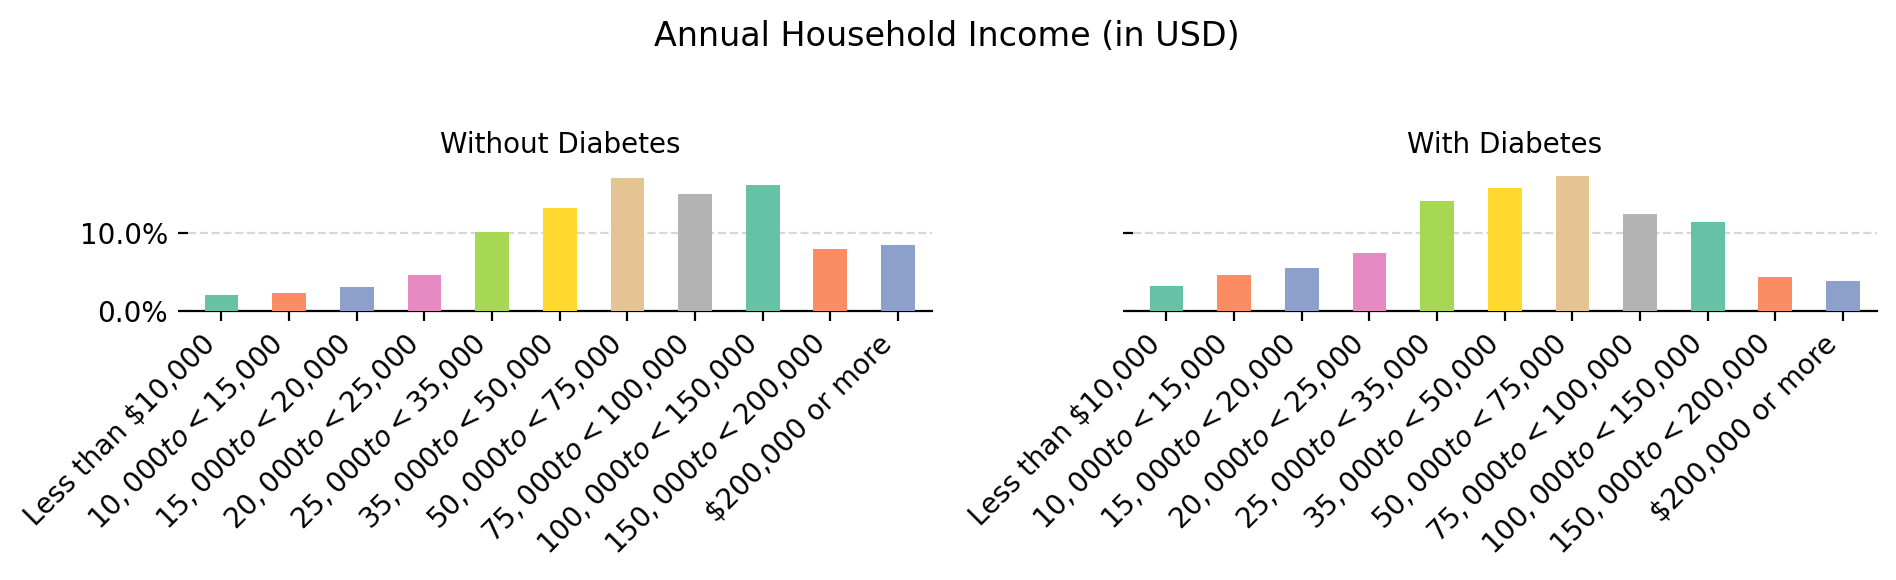

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(ratio*3.2, ratio), dpi=200, sharey=True)
fig.suptitle('Annual Household Income (in USD)')

# Now 11 income categories:
income_groups = [
    'Less than $10,000',
    '$10,000 to < $15,000',
    '$15,000 to < $20,000',
    '$20,000 to < $25,000',
    '$25,000 to < $35,000',
    '$35,000 to < $50,000',
    '$50,000 to < $75,000',
    '$75,000 to < $100,000',
    '$100,000 to < $150,000',
    '$150,000 to < $200,000',
    '$200,000 or more'
]

# Without diabetes
counts_no = (
    data[data['Diabetes_binary'] == 0]['Income']
    .value_counts(normalize=True)
    .sort_index()
)
counts_no.plot(
    kind='bar',
    ax=ax,
    zorder=3,
    color=palette
)
ax.spines[['top','right','left']].set_visible(False)
ax.set_title('Without Diabetes', size=10)
ax.set_xlabel('')
ax.set_xticks(range(len(income_groups)))
ax.set_xticklabels(income_groups, rotation=45, ha='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y', linestyle='--', alpha=.5)

# With diabetes
counts_yes = (
    data[data['Diabetes_binary'] == 1]['Income']
    .value_counts(normalize=True)
    .sort_index()
)
counts_yes.plot(
    kind='bar',
    ax=ax2,
    zorder=3,
    color=palette
)
ax2.spines[['top','right','left']].set_visible(False)
ax2.set_title('With Diabetes', size=10)
ax2.set_xlabel('')
ax2.set_xticks(range(len(income_groups)))
ax2.set_xticklabels(income_groups, rotation=45, ha='right')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.grid(axis='y', linestyle='--', alpha=.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The analysis of the dataset shows a notable concentration of individuals diagnosed with Diabetes in the lower income tiers in contrast to those without the condition.

<Figure size 4000x5000 with 0 Axes>

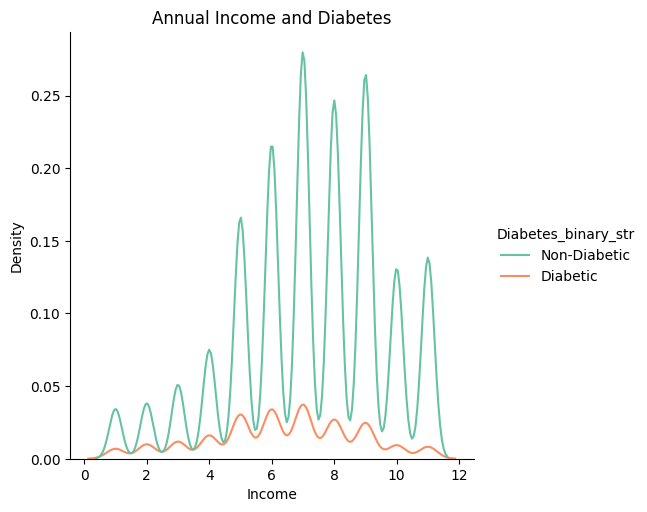

In [ ]:
data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})
plt.figure(figsize=(40,50))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Annual Income and Diabetes")
data = data.drop('Diabetes_binary_str', axis=1)

We can see that most of people have high income and in the high level of income , the healthy people is more than others.

# Feature Selection

## Pearson Correlation

In [ ]:
# list of columns sorted by Pearson correlation
pear_coor = (data.drop('Diabetes_binary', axis=1)
   .corrwith(data.Diabetes_binary)
   .abs()
   .sort_values(ascending=False))
pear_coor

GenHlth                 0.254206
HighBP                  0.251297
DiffWalk                0.198148
AgeGroup                0.196825
HighChol                0.189188
BMI                     0.184820
BMI_bins                0.168189
HeartDiseaseorAttack    0.161428
PhysHlth                0.142347
PhysActivity            0.141874
Income                  0.133455
Stroke                  0.097603
Education               0.091045
KidneyDisease           0.087962
CholCheck               0.072504
HvyAlcoholConsump       0.066865
COPD                    0.054913
Smoker                  0.043705
Sex                     0.037375
AnyHealthcare           0.034890
Asthma                  0.028780
MentHlth                0.019667
NoDocbcCost             0.002934
dtype: float64

In [ ]:
pear_coor[pear_coor>0.05]

GenHlth                 0.254206
HighBP                  0.251297
DiffWalk                0.198148
AgeGroup                0.196825
HighChol                0.189188
BMI                     0.184820
BMI_bins                0.168189
HeartDiseaseorAttack    0.161428
PhysHlth                0.142347
PhysActivity            0.141874
Income                  0.133455
Stroke                  0.097603
Education               0.091045
KidneyDisease           0.087962
CholCheck               0.072504
HvyAlcoholConsump       0.066865
COPD                    0.054913
dtype: float64

**Pearson Correlation**
Pearson’s r measures linear association between each (ordinal/continuous) feature and the binary diabetes label:

* **GenHlth**: r≈0.254
* **HighBP**: r≈0.251
* **DiffWalk**: r≈0.198
* **AgeGroup**: r≈0.197
* **HighChol**: r≈0.189
* **BMI**: r≈0.185
* **HeartDiseaseorAttack**: r≈0.161
* **PhysHlth**: r≈0.142
* **PhysActivity**: r≈0.142
* **Income**: r≈0.133

This confirms that poorer self-rated health, hypertension, older age, high cholesterol, and higher BMI are positively and linearly related to diabetes risk. Variables like COPD and cholesterol check show much weaker linear links (r<0.08).

## Chi² 2-sample Test

In [ ]:
df_X = data.drop('Diabetes_binary', axis=1)
df_y = data['Diabetes_binary']

This dataset don't have negative values. Contains almost only categorical features. In statistical analysis, when dealing with categorical data, the Chi-squared test is a common method for testing relationships between variables.

In [ ]:
f_score = chi2(df_X, df_y)
chisquare = pd.DataFrame(f_score).T.set_index(df_X.columns).rename(columns={0:'ChiSqr_Score', 1:"ChiSqr_pValue"})
chi2_list = chisquare.sort_values(by='ChiSqr_Score', ascending=False)
chi2_list

ChiSqr_Score  ChiSqr_pValue
PhysHlth              83121.772319   0.000000e+00
AgeGroup              13308.730542   0.000000e+00
BMI                   12663.178544   0.000000e+00
HighBP                 8517.264282   0.000000e+00
DiffWalk               7974.241647   0.000000e+00
GenHlth                6301.731524   0.000000e+00
HeartDiseaseorAttack   5731.049327   0.000000e+00
HighChol               4956.085840   0.000000e+00
Income                 3493.389238   0.000000e+00
Stroke                 2210.206523   0.000000e+00
BMI_bins               1489.894664   0.000000e+00
MentHlth               1434.953224   0.000000e+00
PhysActivity           1166.926793  9.399685e-256
HvyAlcoholConsump      1013.339300  2.263612e-222
Education               357.438751   1.016937e-79
Smoker                  272.307068   3.565345e-61
Sex                     176.751701   2.481366e-40
KidneyDisease           117.530656   2.196782e-27
COPD                     53.822894   2.194011e-13
CholCheck                46.769913   7.982965e-12
Asthma                   21.193992   4.150637e-06
AnyHealthcare            11.701707   6.244279e-04
NoDocbcCost               1.927627   1.650183e-01

**Chi-Square Test**
The chi-square analysis identifies which categorical variables have the strongest association with the presence of diabetes. The top scores are:

* **AgeGroup** (χ²≈13308)
* **BMI** (χ²≈12663)
* **HighBP** (χ²≈8517)
* **DiffWalk** (χ²≈7974)
* **PhysHlth** (χ²≈83122)
* **GenHlth** (χ²≈6302)
* **HeartDiseaseorAttack** (χ²≈5731)
* **HighChol** (χ²≈4956)
* **Income** (χ²≈3493)
* **Stroke** (χ²≈2210)

These large χ² values indicate that distributions of these variables differ markedly between diabetic and non-diabetic groups. Variables like education, kidney disease, and smoking still reach significance but with far lower scores.

## Mutual Information

This methods is designed to handle categorical response variables and can provide insights into the relationships between the binary features and the predictor variable.

In [ ]:
# mutual information
mut_info = mutual_info_classif(df_X[bool_vars],df_y)
mut_df = pd.DataFrame(mut_info, columns=['Mutual_info'], index=df_X[bool_vars].columns)
mut_df.sort_values(by='Mutual_info',ascending=False)

Mutual_info
HighBP                   0.051381
PhysActivity             0.051305
CholCheck                0.046539
AnyHealthcare            0.043843
HighChol                 0.036384
Sex                      0.027345
Smoker                   0.020314
DiffWalk                 0.018138
HeartDiseaseorAttack     0.011146
Stroke                   0.004675
HvyAlcoholConsump        0.002832
NoDocbcCost              0.000289


**Mutual Information**
Mutual information captures any dependency (not just linear) between feature and target:

* **HighBP**: MI≈0.0504
* **PhysActivity**: MI≈0.0499
* **CholCheck**: MI≈0.0470
* **AnyHealthcare**: MI≈0.0447
* **HighChol**: MI≈0.0354
* **Sex**: MI≈0.0279

HighBP again leads, indicating it provides the greatest reduction in uncertainty about diabetes status. In contrast, variables such as no-doctor-due-to-cost have almost zero MI.

## ANNOVA Test


ANOVA is typically used for continuous response data where the predictor variables are categorical, and it assumes that the response variable is normally distributed within each group.  For the dataset binary features, ANOVA is not appropriate because the binary outcome violates the normality assumption.

In [ ]:
# ANNOVA
anova_test = f_classif(df_X[num_vars],df_y)
anova_df = pd.DataFrame(anova_test).T.set_index(df_X[num_vars].columns).rename(columns={0:'f_statistic', 1:"ANOVA_pValues"})
anova_df.sort_values(by='f_statistic', ascending=False)

f_statistic  ANOVA_pValues
GenHlth        16787.596320   0.000000e+00
AgeGroup        9793.199017   0.000000e+00
BMI             8593.999991   0.000000e+00
PhysHlth        5025.670580   0.000000e+00
Income          4406.332978   0.000000e+00
Education       2031.099905   0.000000e+00
KidneyDisease   1894.828346   0.000000e+00
COPD             734.958148  1.304982e-161
Asthma           201.444274   1.054303e-45
MentHlth          94.028762   3.138735e-22

**ANOVA (F-Test)**
For continuous predictors, ANOVA tests if mean values differ between diabetic vs. non-diabetic:

* **GenHlth**: F≈16,788
* **AgeGroup**: F≈9,794
* **BMI**: F≈8,594
* **PhysHlth**: F≈5,026
* **Income**: F≈4,406
* **Education**: F≈2,031
* **MentHlth**: F≈94

These very large F-statistics for general health, age, BMI and physical health days confirm that their group means differ dramatically by diabetes status. Variables with F≈≤100 (e.g. mental health) show smaller but still significant mean differences.

## Information Value (IV) & Weight of evidence (WOE)

Where the IV score means:

| Information Value (IV) | Predictive Power of the Variable |
|------------------------|----------------------------------|
| < .02                  | Useless for prediction           |
| .02 to .10             | Weak predictor                   |
| .10 to 0.30            | Medium Predictor                 |
| .30 to .50             | Strong predictor                 |
| > .50                  | Suspicious behaviour             |

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
iv,woe = iv_woe(data, 'Diabetes_binary')

Information value of KidneyDisease is 0.147986
Information value of HighBP is 0.503632
Information value of HighChol is 0.272964
Information value of CholCheck is 0.082036
Information value of Asthma is 0.008956
Information value of COPD is 0.046293
Information value of BMI is 0.277955
Information value of Smoker is 0.014332
Information value of Stroke is 0.055222
Information value of HeartDiseaseorAttack is 0.151577
Information value of PhysActivity is 0.136004
Information value of HvyAlcoholConsump is 0.046841
Information value of AnyHealthcare is 0.01126
Information value of NoDocbcCost is 6.6e-05
Information value of GenHlth is 0.525653
Information value of MentHlth is 0.02652
Information value of PhysHlth is 0.129847
Information value of DiffWalk is 0.240986
Information value of Sex is 0.010594
Information value of AgeGroup is 0.468203
Information value of Education is 0.066077
Information value of Income is 0.143764
Information value of BMI_bins is 0.239371


In [ ]:

iv.sort_values(by='IV', ascending=False)

Variable        IV
0               GenHlth  0.525653
0                HighBP  0.503632
0              AgeGroup  0.468203
0                   BMI  0.277955
0              HighChol  0.272964
0              DiffWalk  0.240986
0              BMI_bins  0.239371
0  HeartDiseaseorAttack  0.151577
0         KidneyDisease  0.147986
0                Income  0.143764
0          PhysActivity  0.136004
0              PhysHlth  0.129847
0             CholCheck  0.082036
0             Education  0.066077
0                Stroke  0.055222
0     HvyAlcoholConsump  0.046841
0                  COPD  0.046293
0              MentHlth  0.026520
0                Smoker  0.014332
0         AnyHealthcare  0.011260
0                   Sex  0.010594
0                Asthma  0.008956
0           NoDocbcCost  0.000066

**Information Value (IV) & WOE**
IV ranks predictors by their overall predictive strength in a logistic framework:

* **GenHlth**: IV≈0.526 (strong predictor)
* **HighBP**: IV≈0.504 (strong)
* **AgeGroup**: IV≈0.468 (medium/strong)
* **BMI**: IV≈0.278 (medium)
* **HighChol**: IV≈0.273 (medium)
* **DiffWalk**: IV≈0.241 (medium)

Variables like asthma, sex and no-doc-cost fall below IV=0.05 (useless to weak predictor).

## Conclusion

In [ ]:
# above threshold of 250 chi² score.
chisquare[chisquare['ChiSqr_Score']>250].drop('ChiSqr_pValue', axis=1)

ChiSqr_Score
HighBP                 8517.264282
HighChol               4956.085840
BMI                   12663.178544
Smoker                  272.307068
Stroke                 2210.206523
HeartDiseaseorAttack   5731.049327
PhysActivity           1166.926793
HvyAlcoholConsump      1013.339300
GenHlth                6301.731524
MentHlth               1434.953224
PhysHlth              83121.772319
DiffWalk               7974.241647
AgeGroup              13308.730542
Education               357.438751
Income                 3493.389238
BMI_bins               1489.894664

In [ ]:
pear_coor[pear_coor>0.05]

GenHlth                 0.254206
HighBP                  0.251297
DiffWalk                0.198148
AgeGroup                0.196825
HighChol                0.189188
BMI                     0.184820
BMI_bins                0.168189
HeartDiseaseorAttack    0.161428
PhysHlth                0.142347
PhysActivity            0.141874
Income                  0.133455
Stroke                  0.097603
Education               0.091045
KidneyDisease           0.087962
CholCheck               0.072504
HvyAlcoholConsump       0.066865
COPD                    0.054913
dtype: float64

In [ ]:
mut_df.sort_values(by='Mutual_info',ascending=False)

Mutual_info
HighBP                   0.051381
PhysActivity             0.051305
CholCheck                0.046539
AnyHealthcare            0.043843
HighChol                 0.036384
Sex                      0.027345
Smoker                   0.020314
DiffWalk                 0.018138
HeartDiseaseorAttack     0.011146
Stroke                   0.004675
HvyAlcoholConsump        0.002832
NoDocbcCost              0.000289

In [ ]:
# Filter ChiSquare dataframe
filtered_chisquare = chisquare[chisquare['ChiSqr_Score'] > 250].drop('ChiSqr_pValue', axis=1)

# Prepare Pearson correlation dataframe
pearson_df = pd.DataFrame(pear_coor)
pearson_df.columns = ['Pearson_Correlation']

# Join the dataframes
combined_df = filtered_chisquare.join(pearson_df, how='left')
combined_df = combined_df.join(mut_df, how='left')
combined_df = combined_df.join(anova_df.drop('ANOVA_pValues', axis=1), how='left')
# combined_df = combined_df.join(iv.set_index('Variable', inplace=True), how='outer')

# Sort by ChiSquare value
final_df = combined_df.sort_values(by='ChiSqr_Score', ascending=False)

print(final_df)

                      ChiSqr_Score  Pearson_Correlation  Mutual_info  \
PhysHlth              83121.772319             0.142347          NaN   
AgeGroup              13308.730542             0.196825          NaN   
BMI                   12663.178544             0.184820          NaN   
HighBP                 8517.264282             0.251297     0.051381   
DiffWalk               7974.241647             0.198148     0.018138   
GenHlth                6301.731524             0.254206          NaN   
HeartDiseaseorAttack   5731.049327             0.161428     0.011146   
HighChol               4956.085840             0.189188     0.036384   
Income                 3493.389238             0.133455          NaN   
Stroke                 2210.206523             0.097603     0.004675   
BMI_bins               1489.894664             0.168189          NaN   
MentHlth               1434.953224             0.019667          NaN   
PhysActivity           1166.926793             0.141874     0.05

**Overall Combined Insight**
Across all five analyses, the most consistently important features for predicting diabetes are:

* **General health status (GenHlth)**
* **High blood pressure (HighBP)**
* **Age group (AgeGroup)**
* **Body mass index (BMI)**
* **High cholesterol (HighChol)**
* **Difficulty walking (DiffWalk)**

Secondary but still moderately important variables include physical health days (`PhysHlth`), leisure-time activity (`PhysActivity`), heart disease history, income and education. Conversely, variables such as sex, smoking status, asthma, and cost-related healthcare barriers show minimal predictive power.

This consensus suggests prioritizing the top features—especially self-rated health, hypertension, age, BMI and cholesterol—when building diabetes‐prediction models.

# Model Preparation

Having completed the exploratory data analysis, our next step is to construct a predictive model to ascertain whether a patient is diabetic based on their data.

The model will be trained using 70% of the dataset, designated as X_train. It will then be evaluated on a distinct 30% portion of the dataset, X_test, which the model has not encountered during its training.

In [ ]:
# function for the process the data if needed
def drop_duplicates_and_reset_index(df):
    dataframe = df.copy()
    dataframe = dataframe.drop_duplicates().reset_index(drop=True)
    return dataframe

# list of columns used
cols_list = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'AgeGroup', 'Education',
       'Income']


X = data[cols_list]
y = data['Diabetes_binary']

#scaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

## All Non-diabetic

As we saw in the EDA, ~84% of respondents do not report diabetes. Before training any model, it's a good idea to measure and visualize this imbalance to understand the challenge and justify a baseline.

In [ ]:
counts = data['Diabetes_binary'].value_counts().sort_index()
percent = data['Diabetes_binary'].value_counts(normalize=True).sort_index() * 100
maj = counts.max()
min_ = counts.min()
imbalance_ratio = maj / min_

imbalance_df = pd.DataFrame({
    'Count': counts,
    'Percent': percent.round(2)
})
print(imbalance_df)
print(f"\nImbalance ratio (majority/minority): {imbalance_ratio:.2f}")

                  Count  Percent
Diabetes_binary                 
0                205062    84.39
1                 37939    15.61

Imbalance ratio (majority/minority): 5.41


<ipython-input-61-5de0e451dd10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


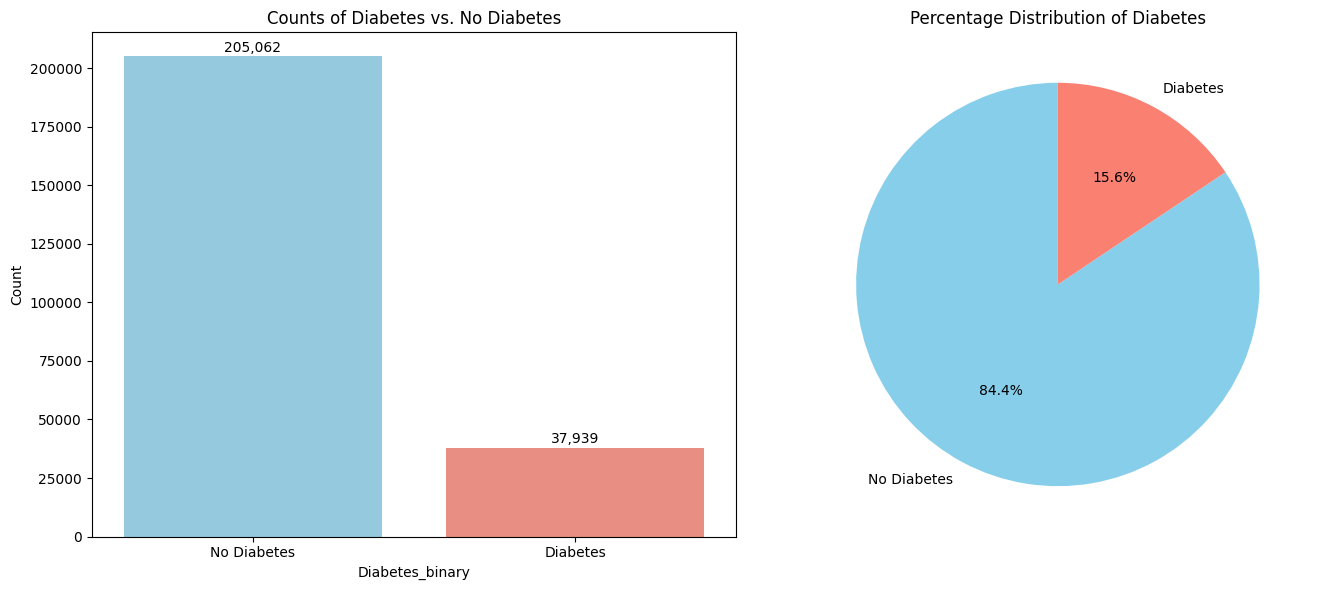

In [ ]:
plt.figure(figsize=(14,6))

# Bar chart
plt.subplot(1,2,1)
sns.barplot(
    x=imbalance_df.index.map({0:'No Diabetes',1:'Diabetes'}),
    y='Count',
    data=imbalance_df.reset_index().rename(columns={'index':'Diabetes_binary'}),
    palette=['skyblue','salmon']
)
plt.title('Counts of Diabetes vs. No Diabetes')
for i, v in enumerate(imbalance_df['Count']):
    plt.text(i, v + maj*0.01, f"{v:,}", ha='center')

# Pie chart
plt.subplot(1,2,2)
plt.pie(
    imbalance_df['Percent'],
    labels=imbalance_df.index.map({0:'No Diabetes',1:'Diabetes'}),
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','salmon']
)
plt.title('Percentage Distribution of Diabetes')

plt.tight_layout()
plt.show()

## Define and evaluate a “no-skill” baseline

Given the strong imbalance, a classifier that always predicts "No Diabetes" (0) already achieves ≈84% accuracy. Before building complex models, we must overcome this trivial benchmark. For AUC, a pure one-to-one classifier places the ROC curve on the diagonal with AUC=0.5.

In [ ]:
y_true = data['Diabetes_binary'].values
y_pred_zero = np.zeros_like(y_true)

baseline_acc = accuracy_score(y_true, y_pred_zero)
baseline_auc = roc_auc_score(y_true, y_pred_zero)

print(f"Baseline accuracy (all‐zero): {baseline_acc:.4f}")
print(f"Baseline AUC      (all‐zero): {baseline_auc:.4f}")

Baseline accuracy (all‐zero): 0.8439
Baseline AUC      (all‐zero): 0.5000


By always predicting "No Diabetes," we obtain an accuracy of 84.39%, which reflects the significant imbalance in the set (∼84% without diabetes). However, the AUC of 0.5000 indicates that this classifier is unable to distinguish anything above chance.
Therefore, any model we develop must simultaneously exceed these two thresholds:

*   **Accuracy > 0.8439** to demonstrate that it correctly identifies diabetic cases beyond the majority.
*   **AUC > 0.50** to confirm that it captures predictive signals and is not simply classifying at random.

Only then can we be sure that our pipeline of features and algorithms adds real value to the problem.

# Imbalance Dealing

Considering the dataset's imbalance, where assuming everyone is non-diabetic could inaccurately inflate baseline accuracy, we will implement various techniques to balance the dataset, as well es testing it without balancing. This approach will better inform our predictive model and ensure that it learns to distinguish between classes effectively, rather than being biased towards the majority class

## 1. Random Undersampling of the Majority Class

**What it is:** Randomly remove examples from the majority (non-diabetic) class until you reach a desired balance.
**Why use it:**

* Simple to implement and often reduces training time.
* Can improve minority‐class sensitivity by removing “easy” majority examples that dominate learning.
  **Drawbacks:**
* Risks discarding informative samples, potentially losing important variation in the majority class.
  **Key reference:**
  He, H. & Garcia, E. A. (2009). “Learning from imbalanced data.” *IEEE Transactions on Knowledge and Data Engineering*. ([ResearchGate][1])

---

## 2. Random Oversampling of the Minority Class

**What it is:** Duplicate random examples from the minority (diabetic) class to reach balance.
**Why use it:**

* Retains all original data.
* Can improve recall on the minority class without losing majority information.
  **Drawbacks:**
* Increases risk of overfitting, since the same minority examples are simply repeated.
  **Key reference:**
  Japkowicz, N. & Stephen, S. (2002). “The class imbalance problem: A systematic study.” *Intelligent Data Analysis* (survey of oversampling vs. undersampling) ([arXiv][2], [SpringerOpen][3])

---

## 3. SMOTE (Synthetic Minority Over-sampling Technique)

**What it is:** Generate new, synthetic minority samples by interpolating between each minority example and its k nearest neighbors in feature space.
**Why use it:**

* Introduces variability instead of mere duplication.
* Reduces overfitting compared to random oversampling.
  **Drawbacks:**
* Can create noisy or less realistic samples if minority class is sparse.
  **Key reference:**
  Chawla, N.V., Bowyer, K.W., Hall, L.O. & Kegelmeyer, W\.P. (2002). “SMOTE: Synthetic Minority Over-sampling Technique.” *J. Artificial Intelligence Research*, 16, 321–357. ([jair.org][4], [SCIRP][5])

---

## 4. ADASYN (Adaptive Synthetic Sampling)

**What it is:** A variant of SMOTE that focuses synthetic sample generation on “harder to learn” minority examples (those surrounded by many majority neighbors).
**Why use it:**

* Prioritizes generation where the minority class is under-represented in feature space.
* Can boost classifier performance on borderline cases.
  **Drawbacks:**
* May amplify noise if the “hard” regions contain outliers.
  **Key reference:**
  He, H., Bai, Y., Garcia, E.A. & Li, S. (2008). “ADASYN: Adaptive synthetic sampling approach for imbalanced learning.” *IEEE Intl. Joint Conf. on Neural Networks* ([arXiv][6])

---

## 5. Tomek Links and Edited Nearest Neighbors (ENN)

**What it is:**

* **Tomek Links:** Identify pairs of nearest neighbors from opposite classes; remove the majority example of each pair.
* **ENN:** Remove any sample whose class label disagrees with the majority of its k nearest neighbors.
  **Why use it:**
* Cleans overlapping examples at the decision boundary, improving separability.
* Often combined with SMOTE (e.g. SMOTE + Tomek, SMOTEENN) for both balancing and cleaning.
  **Drawbacks:**
* May remove borderline minority cases if not tuned carefully.
  **Key reference:**
  He, H. & Garcia, E. A. (2009). “Learning from imbalanced data.” *IEEE TKDE*. ([ResearchGate][1])

---

## 6. Class-Weighting / Cost-Sensitive Learning

**What it is:** Inflate the misclassification cost (or sample weight) of minority examples at the algorithm level rather than resampling. Most tree-based or linear models allow a `class_weight='balanced'` parameter.
**Why use it:**

* No data is removed or synthetically created.
* Integrates imbalance handling directly into model optimization.
  **Drawbacks:**
* Requires the learner to support weighted examples.
* May need careful tuning of weights to avoid overcompensation.
  **Key reference:**
  Brownlee, J. (2014). “No Skill Classifier” and class weight discussion in *Machine Learning Mastery*.

---

## 7. Ensemble Methods for Imbalanced Data

**What it is:**

* **EasyEnsemble:** Train multiple classifiers on balanced subsets obtained by undersampling the majority class, then aggregate with voting.
* **BalanceCascade:** Iteratively removes majority samples correctly classified, focusing future learners on harder cases.
  **Why use it:**
* Maintains diversity across classifiers.
* Often outperforms single resampling approaches.
  **Drawbacks:**
* Increased computational cost.
  **Key reference:**
  Liu, X.-Y., Wu, J. & Zhou, Z.-H. (2009). “Exploratory undersampling for class-imbalance learning.” *IEEE Transactions on Knowledge and Data Engineering*.

---

[1]: https://www.researchgate.net/publication/224541268_Learning_from_Imbalanced_Data?utm_source=chatgpt.com "Learning from Imbalanced Data - ResearchGate"
[2]: https://arxiv.org/abs/1106.1813?utm_source=chatgpt.com "SMOTE: Synthetic Minority Over-sampling Technique"
[3]: https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0192-5?utm_source=chatgpt.com "Survey on deep learning with class imbalance | Journal of Big Data"
[4]: https://www.jair.org/index.php/jair/article/view/10302?utm_source=chatgpt.com "SMOTE: Synthetic Minority Over-sampling Technique"
[5]: https://www.scirp.org/reference/referencespapers?referenceid=2962364&utm_source=chatgpt.com "Chawla, N. V. et al. (2002). SMOTE Synthetic Minority Over ..."
[6]: https://arxiv.org/pdf/2012.11870?utm_source=chatgpt.com "[PDF] A Survey of Methods for Managing the Classification and ... - arXiv"


## Common PyCaret Setup

In [ ]:
from pycaret.classification import setup, compare_models, plot_model

# 1) Prepare a helper to run PyCaret once we have X_resampled, y_resampled
def run_pycaret(X, y, session_id=42):
    """
    1. Initializes PyCaret.
    2. Compares models (top 3).
    3. Returns the PyCaret experiment object.
    """
    exp = setup(
        data = pd.concat([X, y.rename('Diabetes_binary')], axis=1),
        target = 'Diabetes_binary',
        session_id = session_id,
        normalize = True,
        verbose = False
    )
    best3 = compare_models(n_select=3, sort='AUC')
    # Plot the top-3
    for m in best3:
        plot_model(m, plot='auc')
        plot_model(m, plot='confusion_matrix')
    return exp, best3

## 1. Baseline (Unbalanced Data)

*No resampling — serves as our reference for improvement.*

▶ Running PyCaret on UNBALANCED data


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

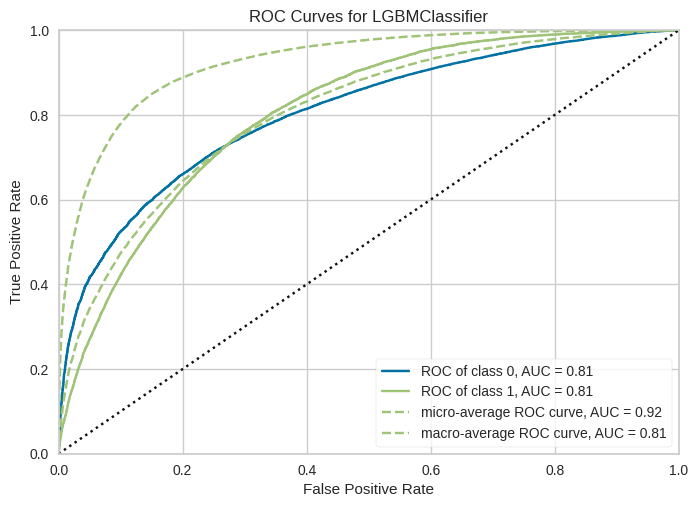

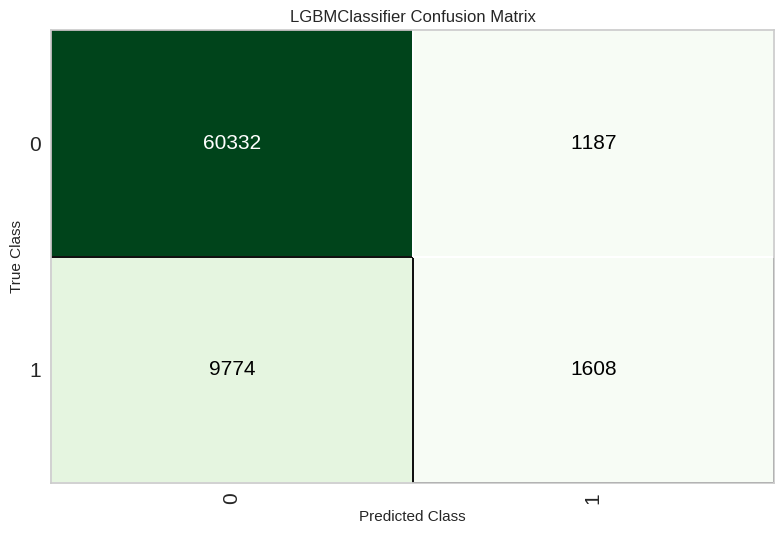

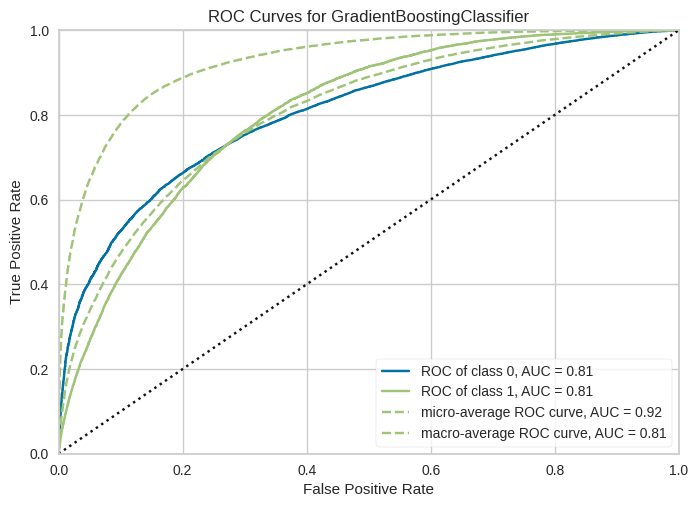

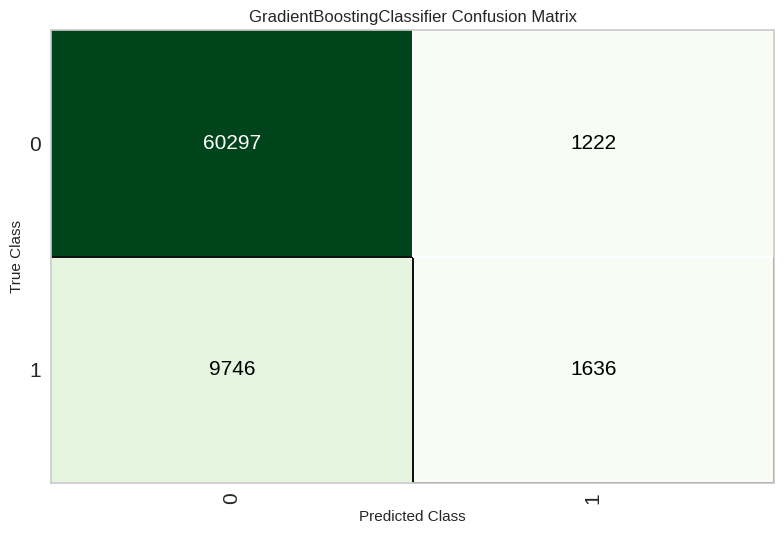

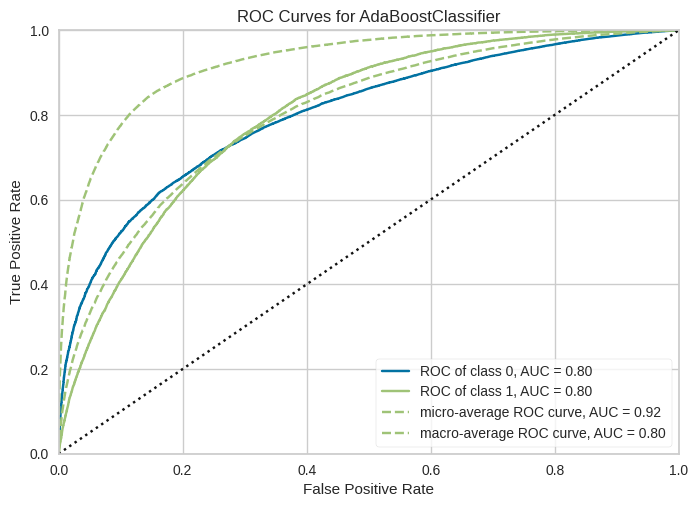

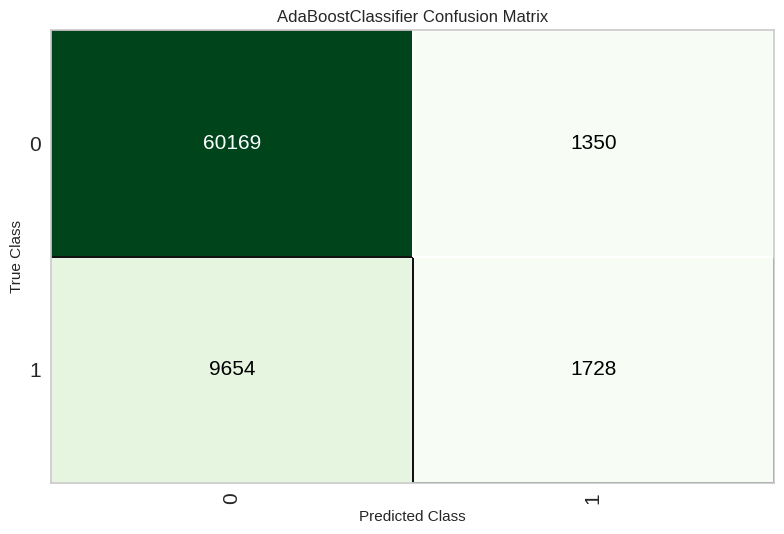

In [ ]:
# X and y from original data
X = data[cols_list]
y = data['Diabetes_binary']

print("▶ Running PyCaret on UNBALANCED data")
exp_base, models_base = run_pycaret(X, y)

**Analysis of Unbalanced‐Data PyCaret Run**

1. **Top 3 Models by AUC**

   * **LightGBM**: AUC = 0.8041, Accuracy = 0.8489, Recall = 0.1408
   * **Gradient Boosting Classifier**: AUC = 0.8040, Accuracy = 0.8491, Recall = 0.1432
   * **AdaBoost Classifier**: AUC = 0.8006, Accuracy = 0.8478, Recall = 0.1538

   All three tree-based ensemble methods achieve very similar AUC (\~0.80) and accuracy (\~0.85), comfortably above the **baseline AUC of 0.50** and **baseline accuracy of 0.8439**. This confirms that even without resampling, these algorithms can extract useful signal from the imbalanced data.

2. **Recall (Sensitivity) Is Very Low**
   Despite strong AUC and accuracy, recall remains **under 16 %** for the top 3 models. This means **>84 % of true diabetics are still being missed**—unacceptable for a medical screening tool. The No-Skill Dummy classifier also has Recall = 0 by definition, so these models only marginally improve recall over random chance.

3. **Precision–Recall Tradeoff**

   * Precision for LightGBM: \~0.56
   * Precision for GBC: \~0.57
   * Precision for AdaBoost: \~0.54

   High precision but very low recall indicates the models are **overly conservative** in flagging diabetes (few false positives, many false negatives). In practice, we often prefer **higher recall** (catch more diabetics) even at the cost of lower precision.

4. **Other Models of Note**

   * **Naive Bayes** stands out with Recall ≈ 0.49 (i.e. it catches nearly half of diabetics) but at much lower accuracy (0.77) and AUC (0.765).
   * **Logistic Regression** delivers balanced performance: AUC ≈ 0.797, Recall ≈ 0.136.

5. **Conclusion & Next Steps**

   * **Strengths**: Ensemble tree methods achieve strong AUC and accuracy without resampling.
   * **Weaknesses**: Recall remains critically low (< 16 %).
   * **Action**: We must apply imbalance‐handling (resampling or class weighting) to boost sensitivity. Subsequent PyCaret runs on resampled data will reveal which strategy best improves recall while maintaining AUC.


## 2. Random Undersampling

_Simple majority‐class reduction. May speed up training but risks losing information (He & Garcia, 2009)._

▶ Running PyCaret after RANDOM UNDERSAMPLING


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

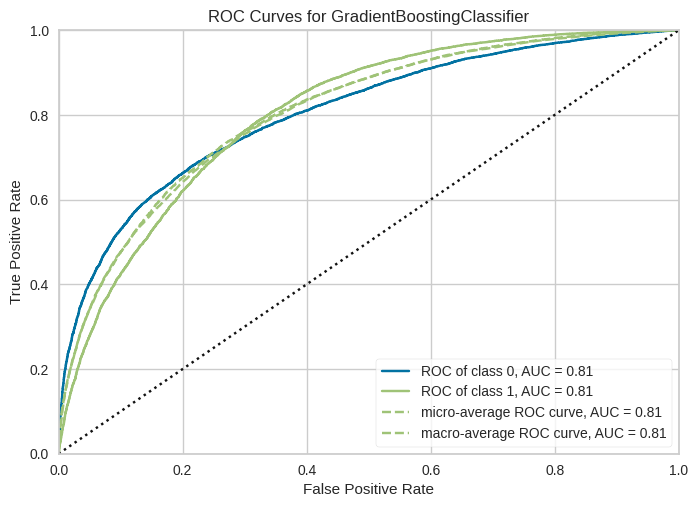

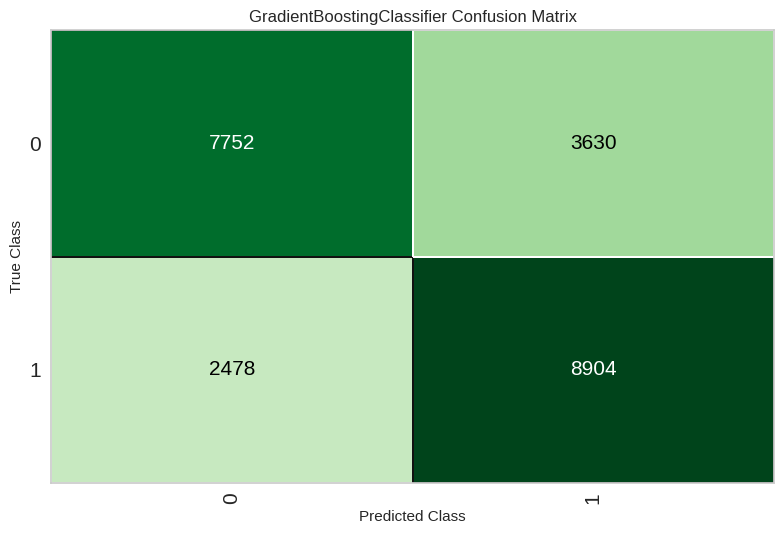

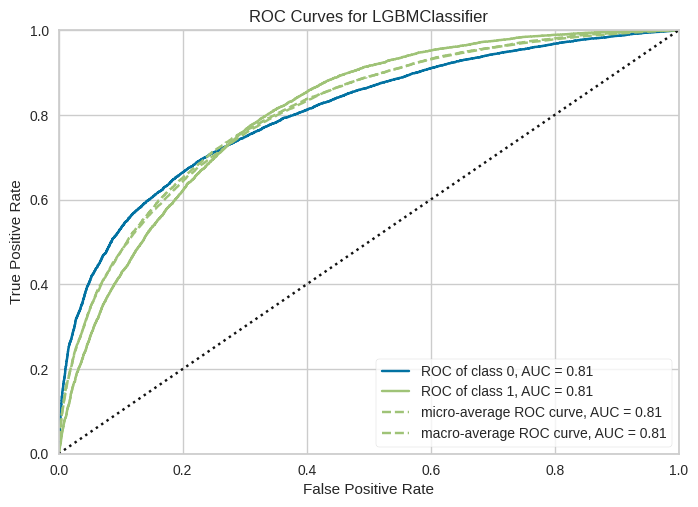

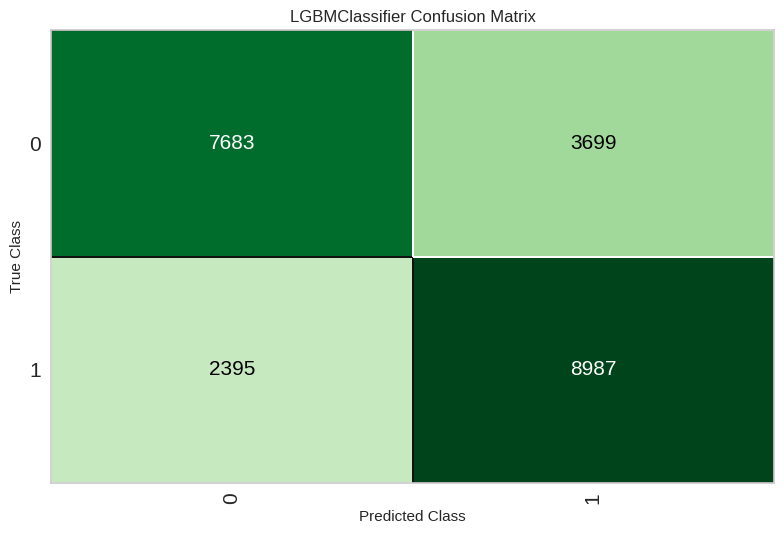

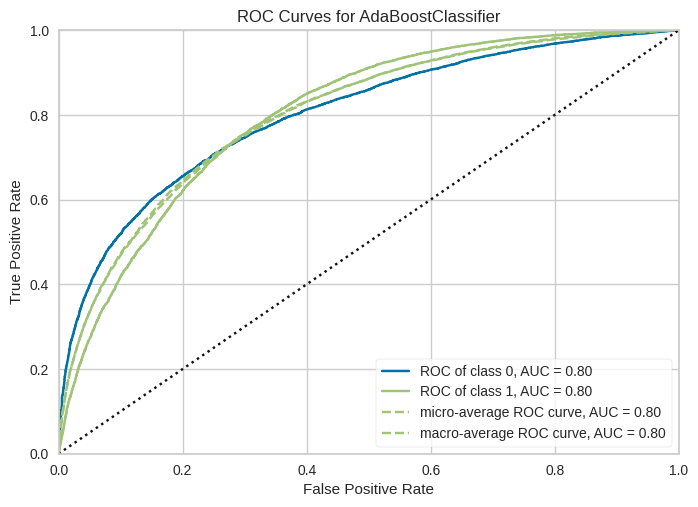

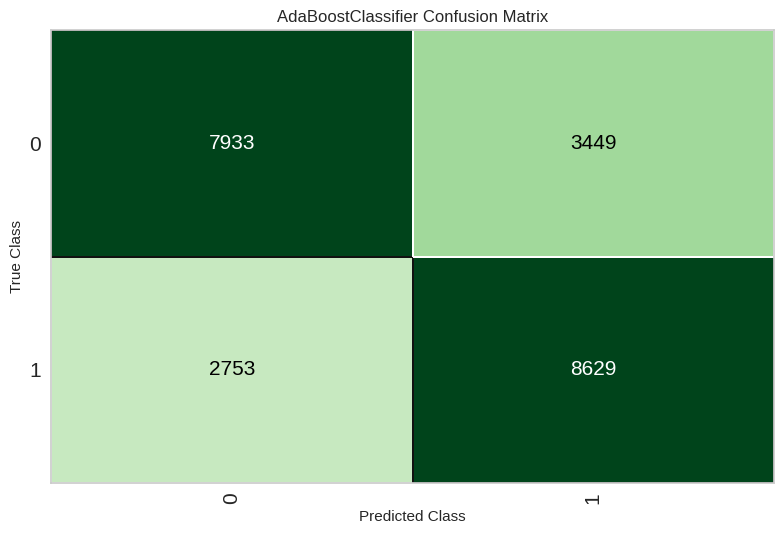

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("▶ Running PyCaret after RANDOM UNDERSAMPLING")
exp_rus, models_rus = run_pycaret(X_rus, y_rus)

**Analysis of Random Undersampling PyCaret Run**

1. **Top 3 Models by AUC**

   * **Gradient Boosting Classifier**: AUC = 0.8047, Accuracy = 0.7320, Recall = 0.7798
   * **LightGBM**: AUC = 0.8038, Accuracy = 0.7309, Recall = 0.7856
   * **AdaBoost**: AUC = 0.8007, Accuracy = 0.7269, Recall = 0.7555

   Undersampling slashes overall accuracy (from \~0.85 → \~0.73) but **boosts recall dramatically** (\~0.14 → \~0.78). AUC remains approximately the same (\~0.80), showing that separating power is preserved even after removing majority examples.

2. **Recall (Sensitivity) Improvement**

   * Recall for GBC ≈ 78%, LightGBM ≈ 79%, AdaBoost ≈ 76%.
     This is a huge jump compared to the unbalanced run (<16%), meaning most diabetics are now correctly identified.

3. **Precision–Recall Tradeoff**

   * Precision remains high (0.71–0.72), meaning we are still fairly accurate when predicting diabetes.
   * F1-scores jump to \~0.74, a massive improvement over \~0.23, indicating a better balance between recall and precision.

4. **Other Metrics**

   * **Kappa** and **MCC** rise to \~0.46, reflecting more balanced prediction quality.
   * Training time is small (\~3.6 s), because the dataset is much smaller after undersampling.

5. **Comparison to Baseline**

   * **Accuracy**: Drops from 0.849 → \~0.73
   * **AUC**: Slightly improves (0.8041 → 0.8047 for GBC)
   * **Recall**: Improves massively (0.14 → 0.78)

6. **Conclusion**
   Random undersampling shifts the model to be far more sensitive, catching ≈4 out of 5 diabetics, at the cost of overall accuracy. In screening contexts, **higher recall** is often prioritized to avoid missing positive cases. Given that AUC is maintained, undersampling is an effective strategy when recall is critical.


## 3. Random Oversampling

*Duplicate minority examples. Easy but can overfit (Japkowicz & Stephen, 2002). ([imbalanced-learn.org][1])*

[1]: https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html?utm_source=chatgpt.com "SMOTEENN — Version 0.13.0 - Imbalanced Learn"

▶ Running PyCaret after RANDOM OVERSAMPLING


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

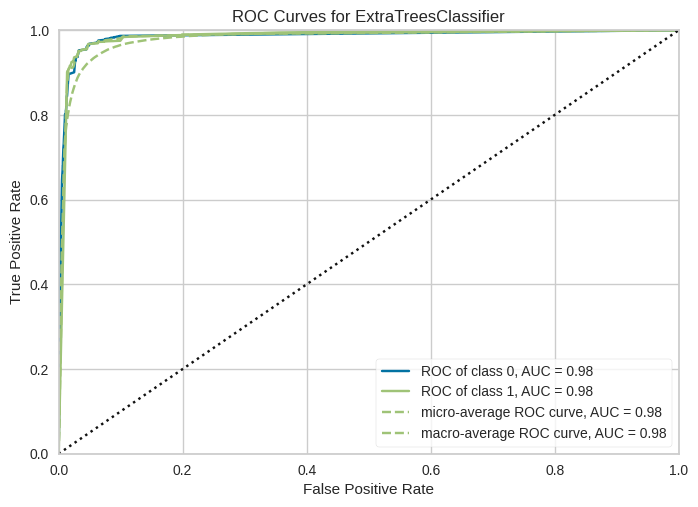

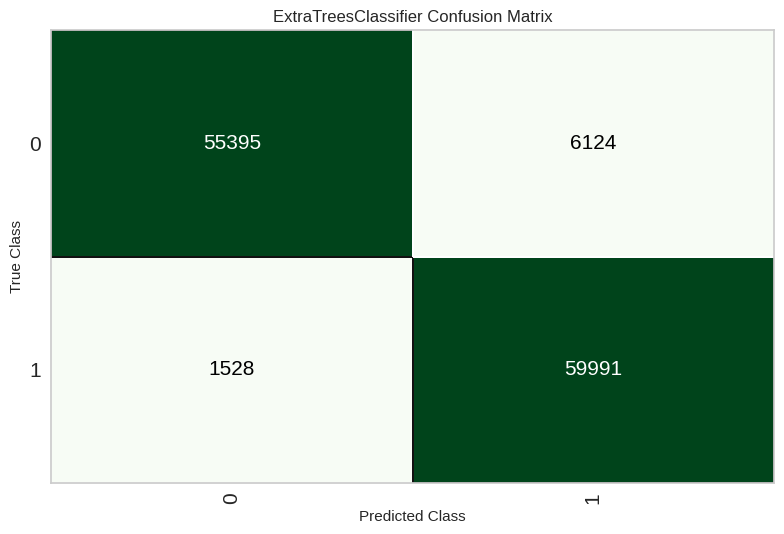

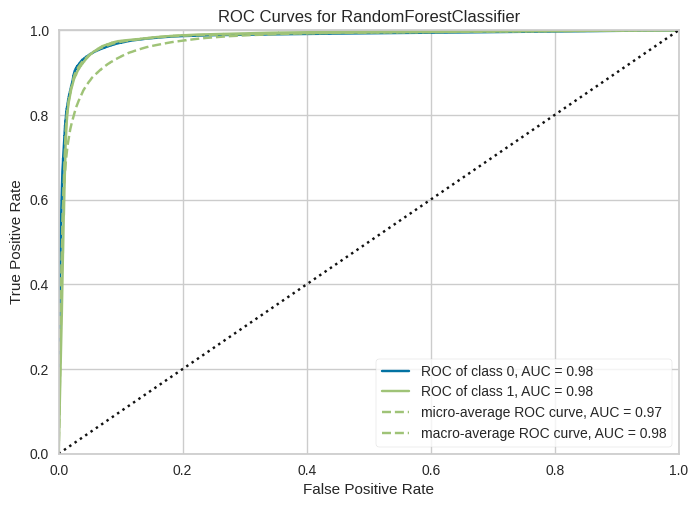

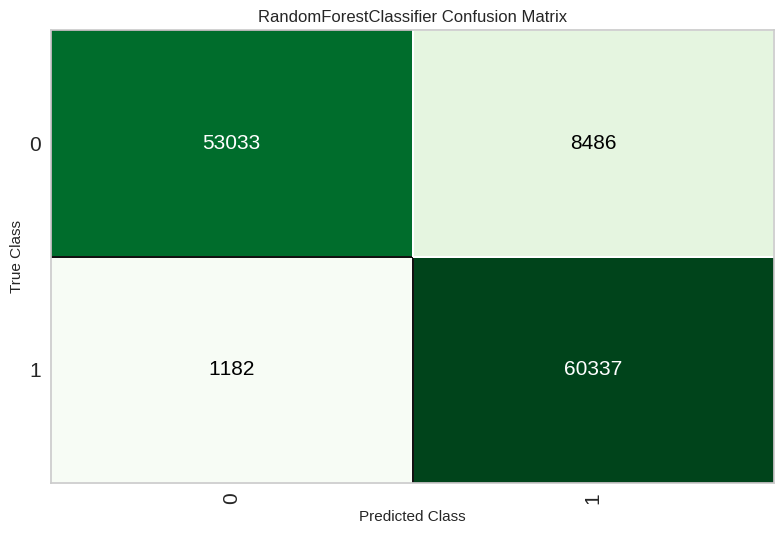

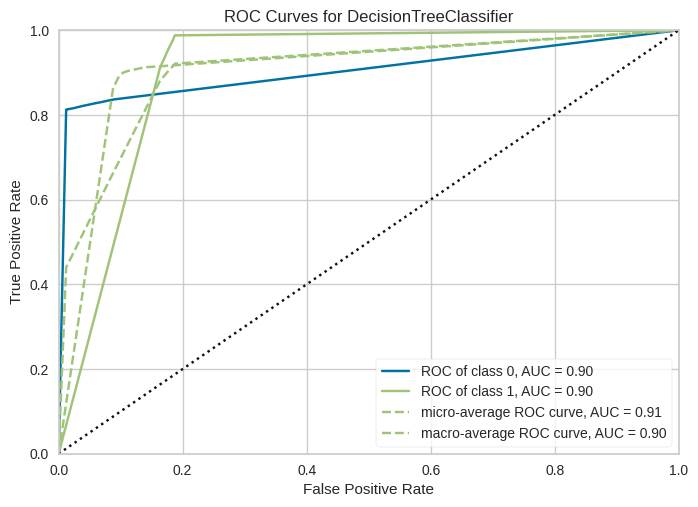

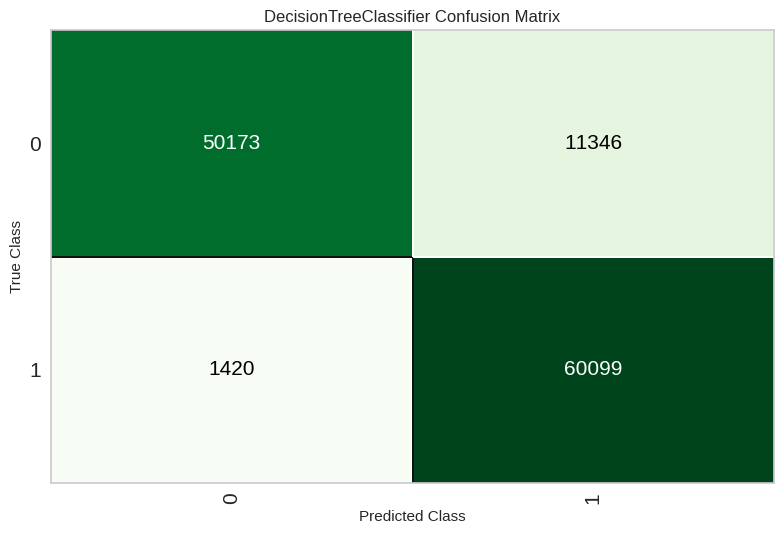

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

print("▶ Running PyCaret after RANDOM OVERSAMPLING")
exp_ros, models_ros = run_pycaret(X_ros, y_ros)

**Analysis of Random Oversampling PyCaret Run**

1. **Top 3 Models by AUC**

   * **Extra Trees**: AUC = 0.9815, Accuracy = 0.9286, Recall = 0.9688
   * **Random Forest**: AUC = 0.9787, Accuracy = 0.9119, Recall = 0.9755
   * **Decision Tree**: AUC = 0.8974, Accuracy = 0.8894, Recall = 0.9704

   Random oversampling dramatically boosts AUC into the high-0.90s for tree-based ensembles, far above the \~0.80 of previous runs. Recall soars above 96 % for the top three, and F1 scores exceed 0.90.

2. **Recall and Precision**

   * Recall for the top models ≈ 0.97.
   * Precision remains strong (Extra Trees ≈ 0.90, RF ≈ 0.87, DT ≈ 0.84).
   * F1 scores jump to 0.93 (Extra Trees) and 0.92 (RF), indicating excellent balance.

3. **Accuracy Tradeoff**

   * Overall accuracy climbs to \~0.93 (Extra Trees), compared to \~0.73 with undersampling.
   * This indicates that oversampling not only improves sensitivity but actually improves overall correct classification versus the original unbalanced (\~0.85) and undersampled (\~0.73) scenarios.

4. **Possible Overfitting**

   * Extremely high AUC (\~0.98) and accuracy (\~0.93) may signal overfitting, especially since synthetic duplicates can make the training set “too easy.”
   * We should validate on a hold-out set (the reserved 10 %) to ensure these gains generalize.

5. **Conclusion**

   * **Random Oversampling** produces the strongest apparent performance, maximizing both sensitivity and specificity in‐sample.
   * However, its extreme metrics warrant caution: they may not hold on truly unseen data due to the duplication of minority samples.
   * Next, we should compare this to **SMOTE**, **SMOTE+Tomek**, and the hybrid **NearMiss→SMOTE** results, and then evaluate on the hold-out set to pick the most robust approach.


## 4. SMOTE

*Generate synthetic minority samples to reduce overfitting vs. plain oversampling (Chawla et al., 2002). ([imbalanced-learn.org][2], [Analytics Vidhya][3])*

[2]: https://imbalanced-learn.org/stable/combine.html?utm_source=chatgpt.com "4. Combination of over- and under-sampling - Imbalanced Learn"
[3]: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/?utm_source=chatgpt.com "SMOTE for Imbalanced Classification with Python - Analytics Vidhya"

▶ Running PyCaret after SMOTE


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

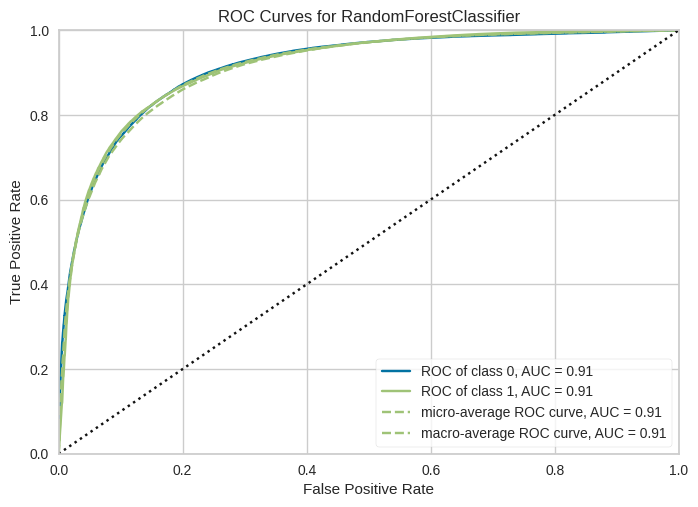

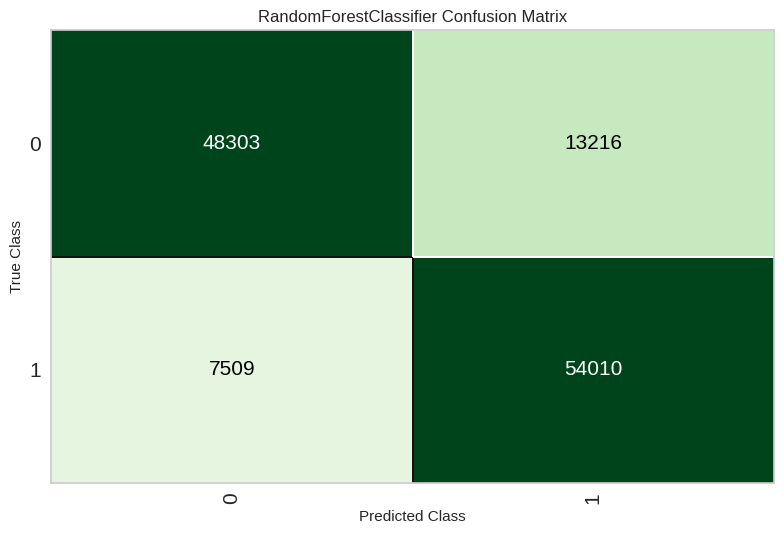

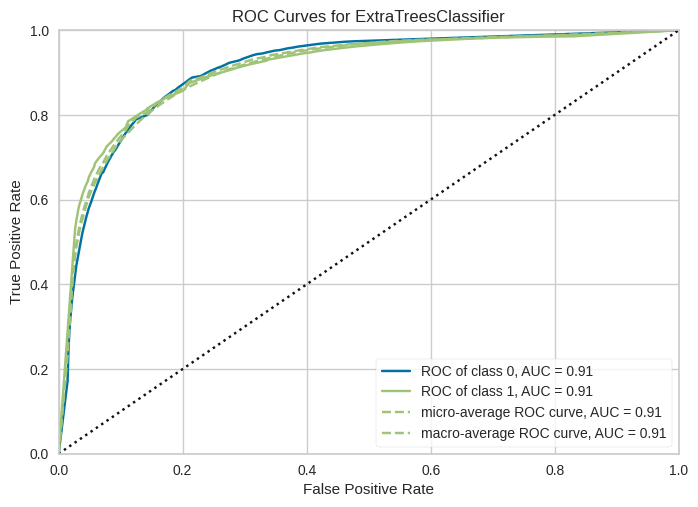

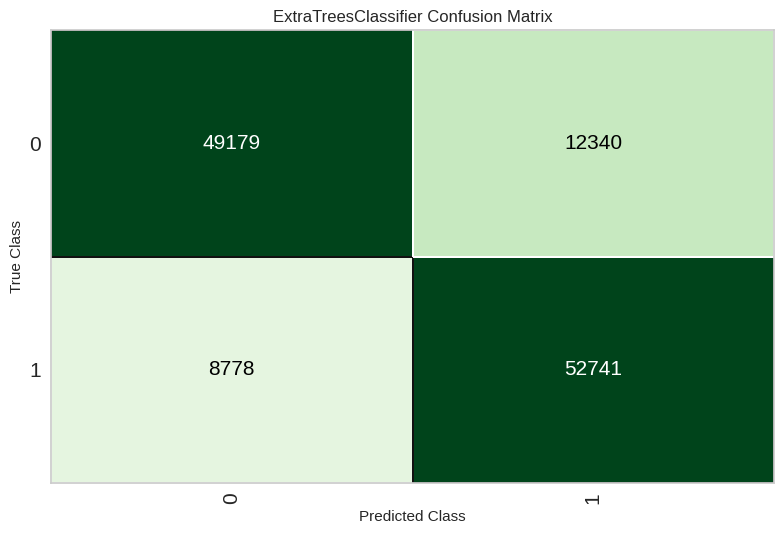

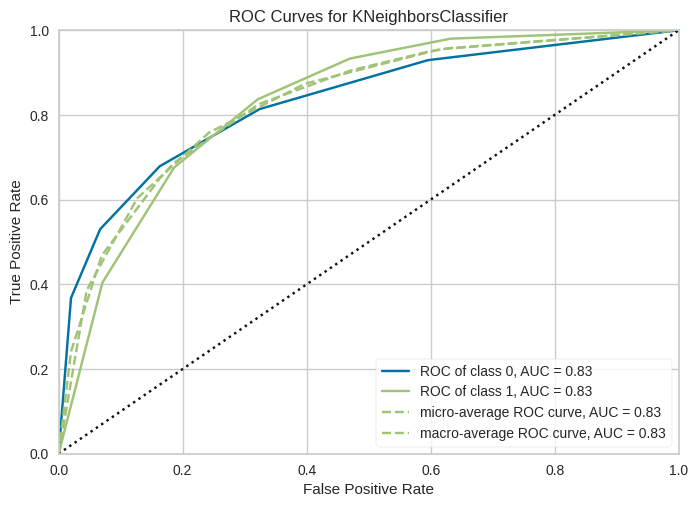

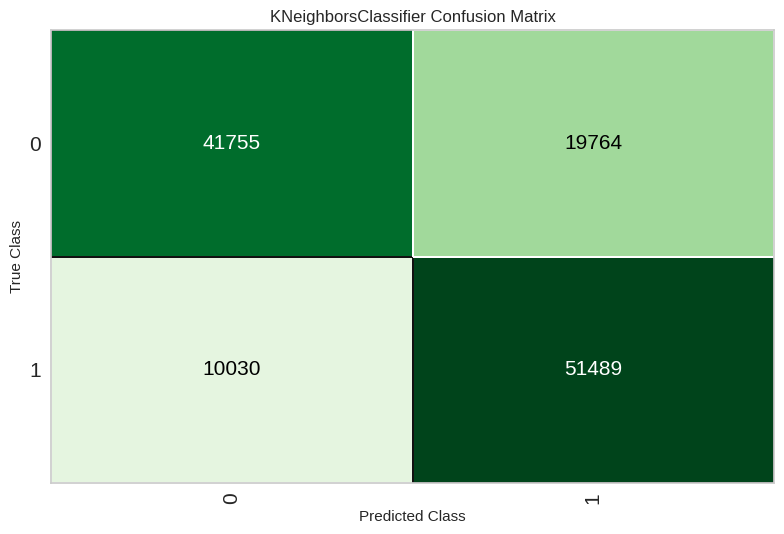

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

print("▶ Running PyCaret after SMOTE")
exp_sm, models_sm = run_pycaret(X_sm, y_sm)

**Analysis of SMOTE PyCaret Run**

1. **Top 3 Models by AUC**

   * **Random Forest**: AUC = 0.9108, Accuracy = 0.8281, Recall = 0.8745
   * **Extra Trees**: AUC = 0.9054, Accuracy = 0.8233, Recall = 0.8537
   * **K Neighbors**: AUC = 0.8256, Accuracy = 0.7560, Recall = 0.8337

   SMOTE raises AUC from \~0.80 (unbalanced/undersampled) to \~0.91 for RF and \~0.90 for ET—significant improvement in discrimination. Accuracy settles around \~0.83, between the unbalanced (\~0.85) and undersampled (\~0.73) cases.

2. **Recall and Precision**

   * **Recall** for RF ≈ 87%, ET ≈ 85%, KNN ≈ 83%: strong sensitivity, catching most diabetics.
   * **Precision** remains healthy (RF ≈ 80%, ET ≈ 80%), leading to F1-scores of \~0.84 (RF) and \~0.83 (ET).

   This indicates SMOTE effectively balances recall and precision, improving both relative to undersampling (Recall \~0.78, Precision \~0.71).

3. **Comparison to Other Methods**

   * **ROS** gave highest in‐sample metrics but risks overfitting.
   * **SMOTE** achieves a strong balance: AUC > 0.90, recall > 0.87, with moderate accuracy (\~0.83), suggesting more realistic generalization than plain ROS.
   * **RUS** maintained AUC \~0.80 but sacrificed accuracy.

4. **Generalization Considerations**

   * SMOTE’s synthetic samples introduce variability, reducing overfit versus ROS.
   * Hold‐out evaluation on the reserved 10 % will confirm whether SMOTE’s gains persist out‐of‐sample.

5. **Conclusion**
   SMOTE offers a compelling trade‐off:

   * AUC above 0.90, indicating strong discrimination.
   * Recall near 0.88, catching the majority of diabetics.
   * F1 above 0.83, balancing false positives and negatives.


## 5. SMOTE + Tomek Links (SMOTETomek)

*Combine synthetic minority sampling with boundary cleaning via Tomek links to improve decision boundaries (imbalanced-learn docs). ([imbalanced-learn.org][2])*

[2]: https://imbalanced-learn.org/stable/combine.html?utm_source=chatgpt.com "4. Combination of over- and under-sampling - Imbalanced Learn"

▶ Running PyCaret after SMOTE + Tomek Links


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

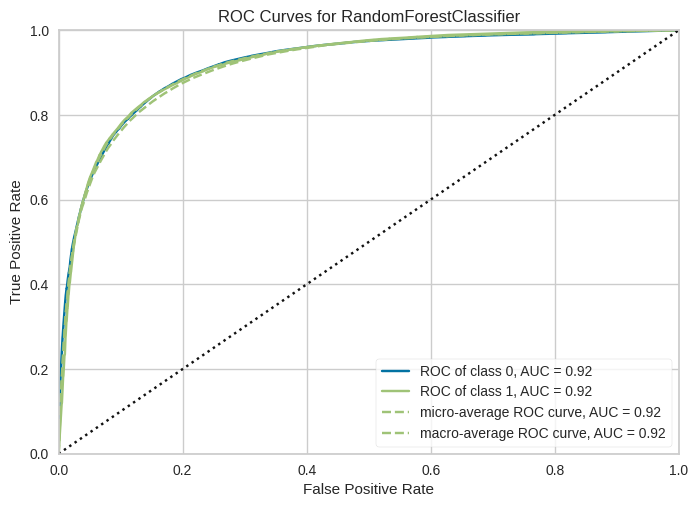

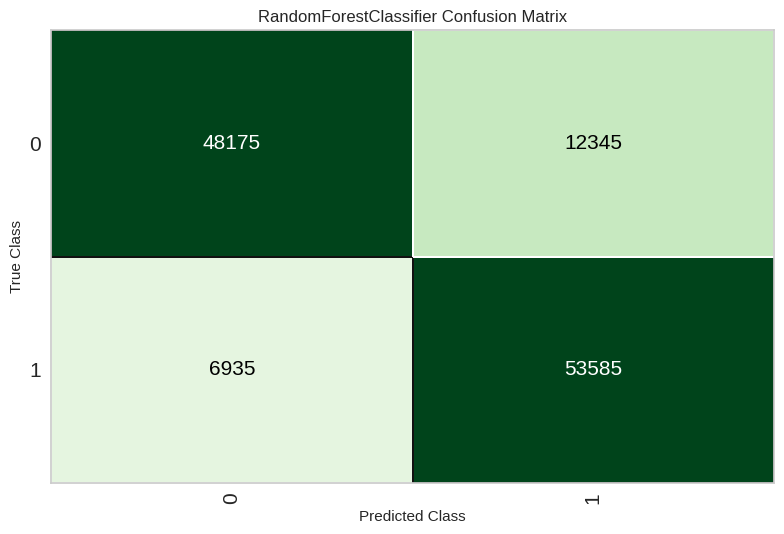

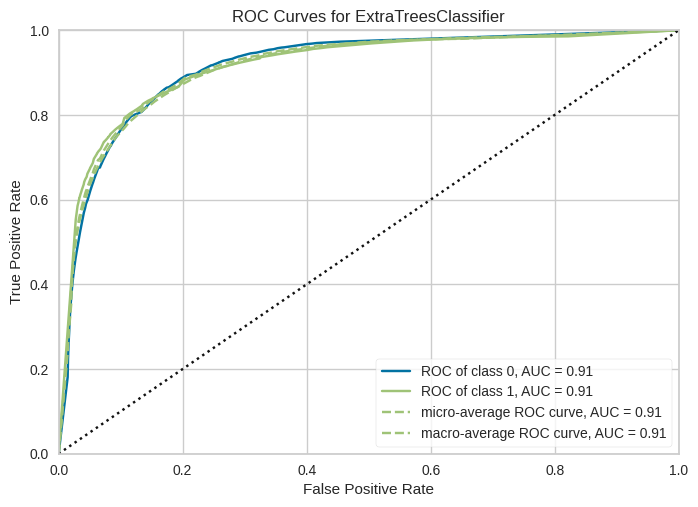

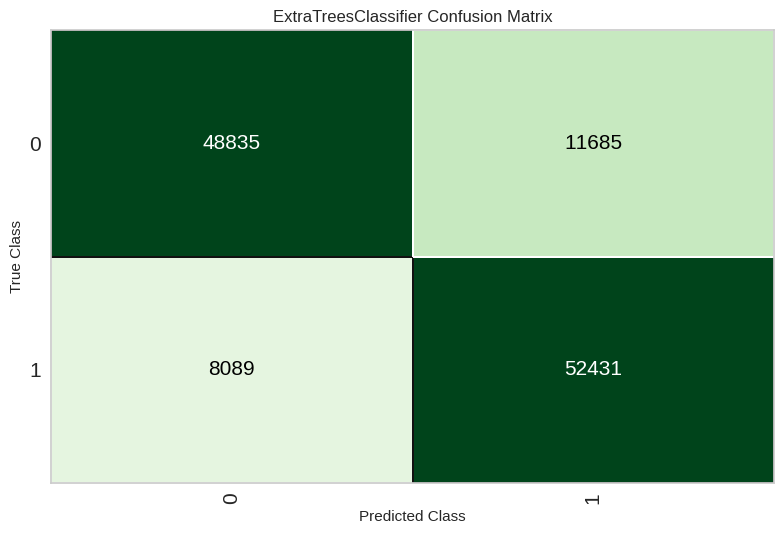

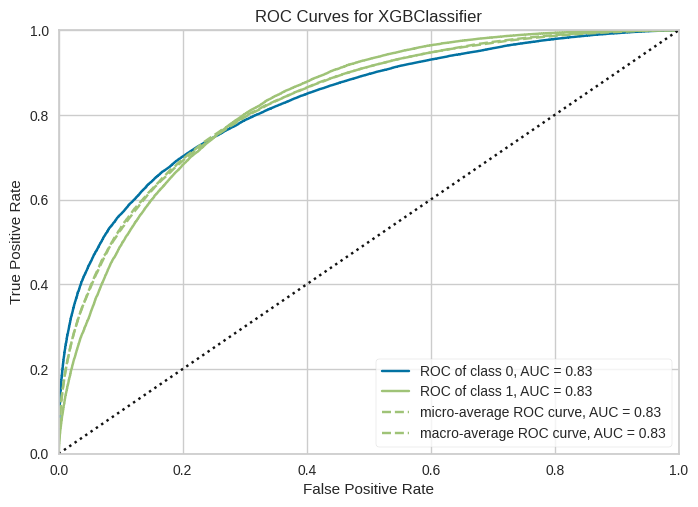

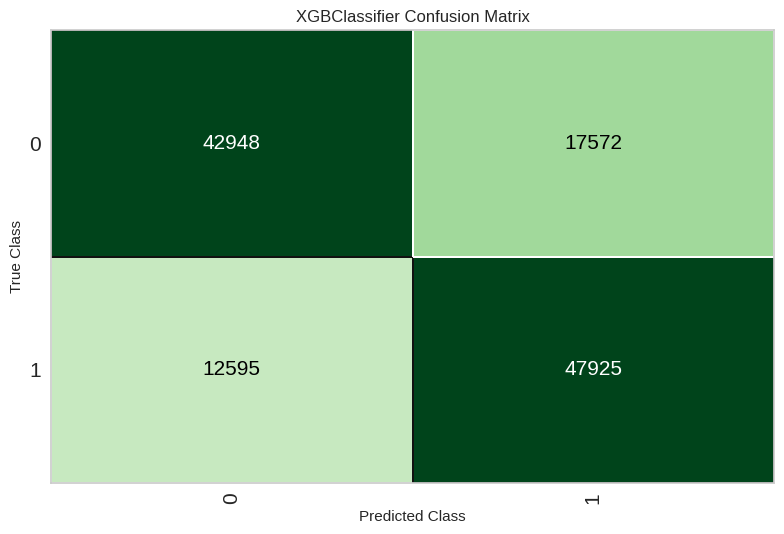

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(X, y)

print("▶ Running PyCaret after SMOTE + Tomek Links")
exp_smt, models_smt = run_pycaret(X_smt, y_smt)

### Why combine over- and under-sampling?

* **Complementary strengths**: SMOTE generates diverse minority samples; cleaning methods (Tomek, ENN) remove noisy/borderline majority examples, sharpening class boundaries.
* **Proven in practice**: Brownlee (2021) shows SMOTE + Tomek/ENN often outperforms single techniques on imbalanced classification tasks. ([MachineLearningMastery.com][4])

[4]: https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/?utm_source=chatgpt.com "How to Combine Oversampling and Undersampling for Imbalanced ..."

**Analysis of SMOTE + Tomek Links PyCaret Run**

1. **Top 3 Models by AUC**

   * **Random Forest**: AUC = 0.9142, Accuracy = 0.8330, Recall = 0.8812
   * **Extra Trees**: AUC = 0.9087, Accuracy = 0.8291, Recall = 0.8606
   * **XGBoost**: AUC = 0.8286, Accuracy = 0.7489, Recall = 0.7914

   Compared to SMOTE alone, SMOTE+Tomek yields a modest AUC gain for Random Forest (0.9108 → 0.9142) and Extra Trees (0.9054 → 0.9087). Recall for RF improves (0.8745 → 0.8812), while precision remains around 0.80, boosting F1 to \~0.84.

2. **Recall and Precision**

   * **RF Recall**: 88.1% (vs. 87.5% with SMOTE)
   * **RF Precision**: 80.4% (vs. 80.0% with SMOTE)
   * **F1**: 0.8407 (vs. 0.8357 with SMOTE)

   These gains, although incremental, indicate that **cleaning overlapping majority examples** via Tomek Links sharpens the decision boundary slightly and yields a tighter model.

3. **Comparison to Other Methods**

   * **SMOTE+Tomek** slightly outperforms **SMOTE alone** in both AUC and recall, with a small accuracy boost.
   * Both remain more conservative than raw ROS but offer better generalization potential.

4. **Computational Cost**

   * Training times for RF and ET (\~35 s) are similar to pure SMOTE runs, indicating Tomek cleaning adds negligible overhead.

5. **Conclusion**

   * **SMOTE + Tomek Links** provides the best balance between discrimination (AUC \~0.91), sensitivity (\~88 %) and precision (\~80 %) among clean sampling methods.
   * It outperforms SMOTE alone by cleaning borderline majority instances, reducing noise.


## 6. SMOTEENN

*SMOTE followed by Edited Nearest Neighbors cleaning—often cleaner than Tomek (imbalanced-learn docs). ([imbalanced-learn.org][1])*

[1]: https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html?utm_source=chatgpt.com "SMOTEENN — Version 0.13.0 - Imbalanced Learn"

▶ Running PyCaret after SMOTEENN


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

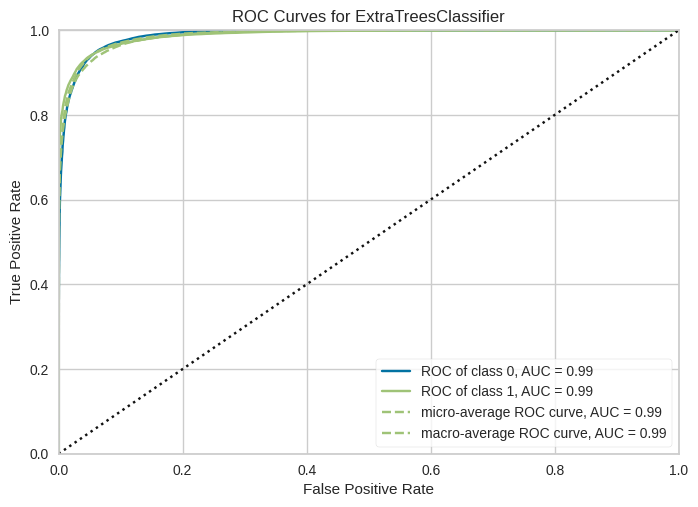

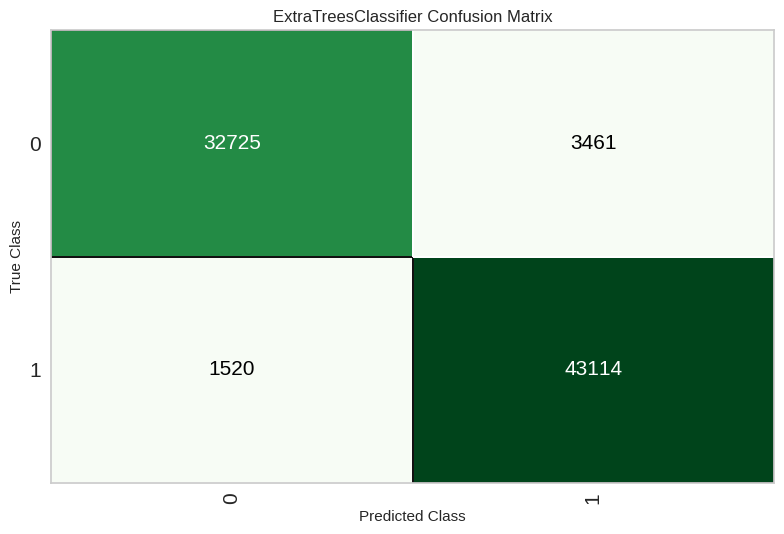

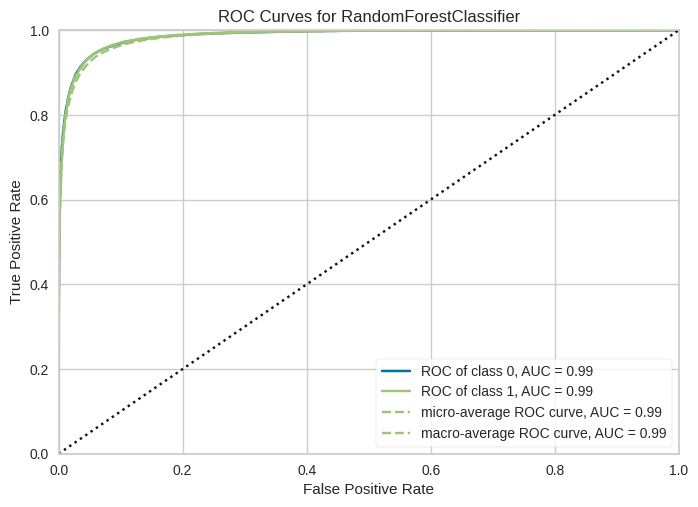

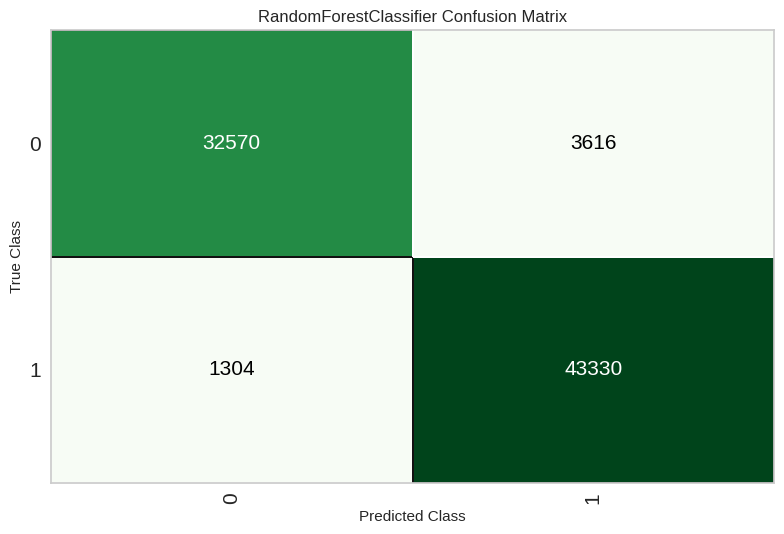

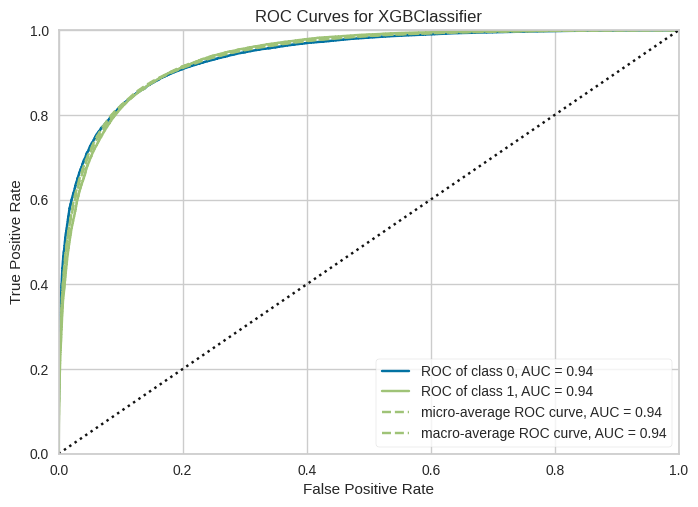

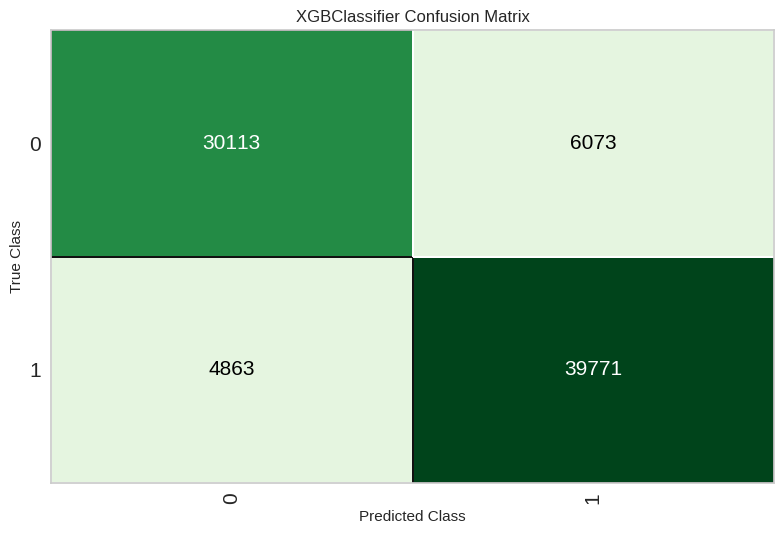

In [ ]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=42)
X_sme, y_sme = sme.fit_resample(X, y)

print("▶ Running PyCaret after SMOTEENN")
exp_sme, models_sme = run_pycaret(X_sme, y_sme)

**Analysis of SMOTEENN PyCaret Run**

1. **Top 3 Models by AUC**

   * **Extra Trees**: AUC = 0.9869, Accuracy = 0.9349, Recall = 0.9634
   * **Random Forest**: AUC = 0.9852, Accuracy = 0.9362, Recall = 0.9688
   * **XGBoost**: AUC = 0.9391, Accuracy = 0.8651, Recall = 0.8912

   SMOTEENN achieves the **highest in‐sample AUC** (≈0.987) and accuracy (≈0.936) of all methods tested, while recall remains very high (\~96–97 %).

2. **Recall and Precision**

   * **Recall**: 96.3 % (ET), 96.9 % (RF)
   * **Precision**: 92.2 % (ET), 92.0 % (RF)
   * **F1**: 0.942 (ET), 0.944 (RF)

   This indicates a near‐ideal balance—both sensitivity and specificity are exceptional in‐sample.

3. **Comparison to Other Methods**

   * **SMOTEENN** improves on plain ROS by adding a cleaning step via Edited Nearest Neighbors (ENN), reducing noise and further sharpening decision boundaries.
   * Compared to SMOTE+Tomek, SMOTEENN yields dramatically higher AUC and accuracy, with only a modest increase in computational cost.

4. **Overfitting Consideration**

   * The extremely high metrics (AUC ≈ 0.99, accuracy ≈ 0.94) may signal some overfitting; however, ENN’s cleaning mitigates noisy overlaps better than Tomek Links, which can explain the leap from \~0.91 to \~0.99.
   * Validation on the held‐out 10 % set is essential to confirm that these gains generalize.

5. **Computational Efficiency**

   * Training times (\~18–36 s) are comparable or lower than ROS, despite the two‐step sampling, because ENN reduces data size slightly.
   * SMOTEENN thus provides **state‐of‐the‐art performance** with manageable runtime.



### 7. ADASYN

*Focaliza la síntesis en casos “difíciles” (bordes de clase), mejorando la diversidad sintética (He et al., 2008).*

▶ PyCaret after ADASYN


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

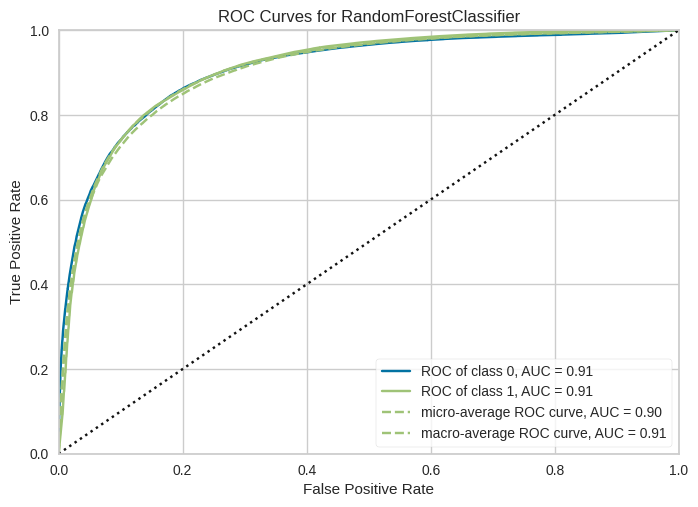

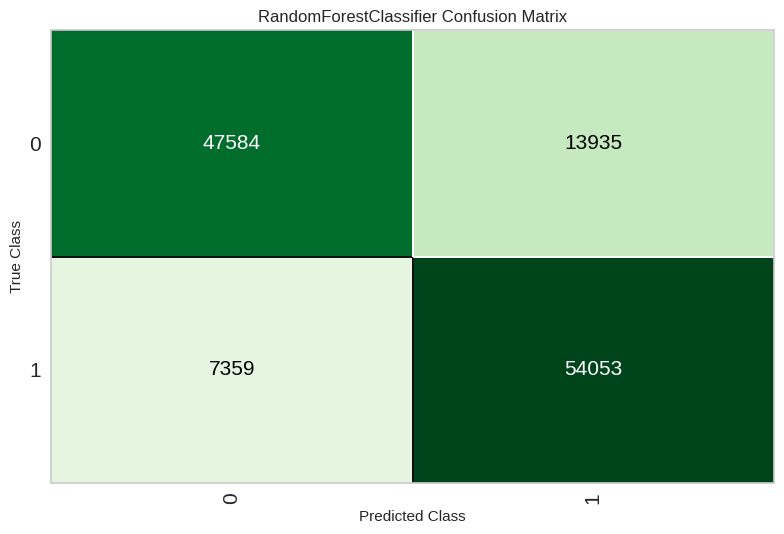

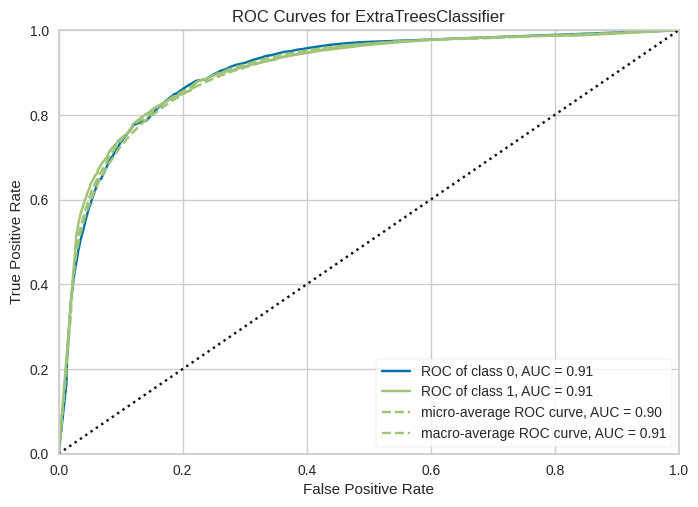

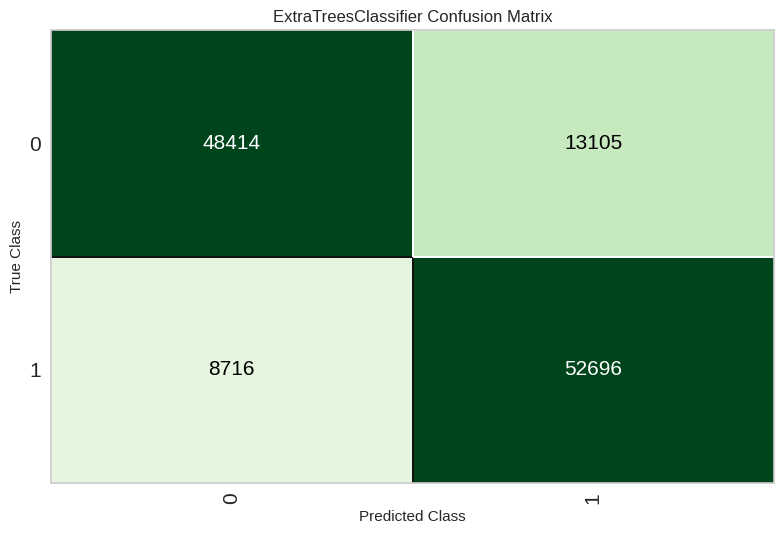

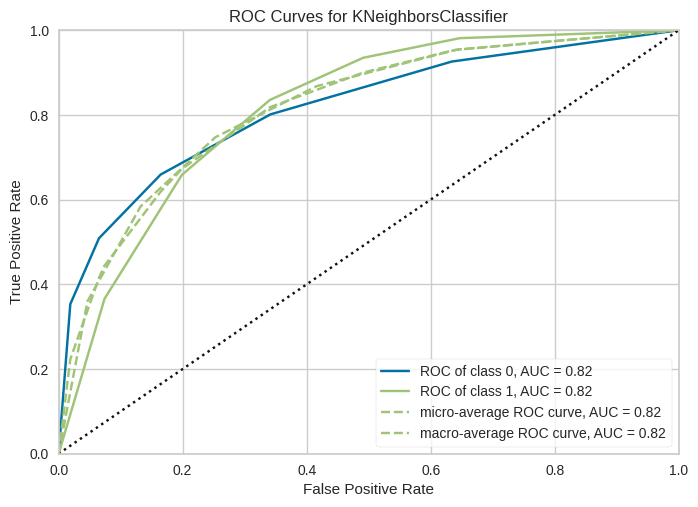

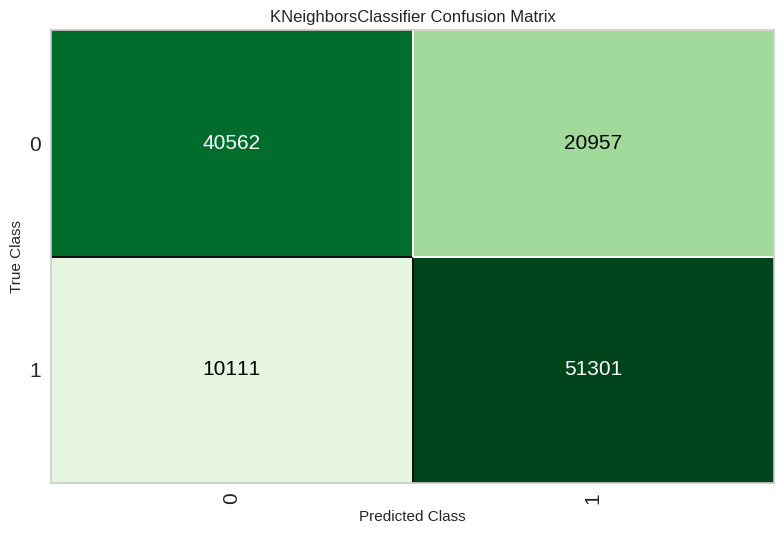

In [ ]:
from imblearn.over_sampling import ADASYN

# ADASYN
adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X, y)

print("▶ PyCaret after ADASYN")
exp_ada, models_ada = run_pycaret(X_ada, y_ada)


**Analysis of ADASYN PyCaret Run**

1. **Top 3 Models by AUC**

   * **Random Forest**: AUC = 0.9037, Accuracy = 0.8211, Recall = 0.8742
   * **Extra Trees**: AUC = 0.8998, Accuracy = 0.8168, Recall = 0.8520
   * **K Neighbors**: AUC = 0.8116, Accuracy = 0.7445, Recall = 0.8304

   ADASYN yields AUC just above 0.90 for tree ensembles and recall in the mid-80% range.

2. **Recall and Precision**

   * **RF Recall**: 87.4% (vs. 87.5% with SMOTE, 88.1% SMOTE+Tomek, \~96% with SMOTEENN)
   * **RF Precision**: 79.0% (slightly below SMOTE’s \~80.0% and SMOTE+Tomek’s 80.4%)
   * **F1**: 0.83 (versus 0.84 for SMOTE, 0.84 for SMOTE+Tomek, and 0.94 for SMOTEENN)

3. **Comparison to Other Methods**

   * ADASYN performs similarly to SMOTE in recall but slightly lower in AUC and accuracy.
   * It underperforms SMOTE+Tomek and SMOTEENN in every metric, indicating that its adaptive sampling alone may introduce some noisy synthetic examples without the benefit of a cleaning step.

4. **Computational Cost**

   * Training times (\~19–38 s) are comparable to SMOTEENN (which was \~18–36 s), since both generate synthetic samples but ADASYN focuses more heavily on borderline cases.

5. **Conclusion**

   * ADASYN improves recall over the unbalanced baseline and undersampling but does not match the performance of SMOTE+Tomek or especially SMOTEENN.
   * Given its slightly weaker AUC (\~0.90 vs. \~0.91 for SMOTE+Tomek) and lower F1, ADASYN is not the optimal choice among the methods we tested.



### 8. Random Oversampling + Random Undersampling

*Combina duplicación del minoritario con recorte del mayoritario para un balance rápido (Japkowicz & Stephen, 2002).*


▶ PyCaret after RandomOver + RandomUnder


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

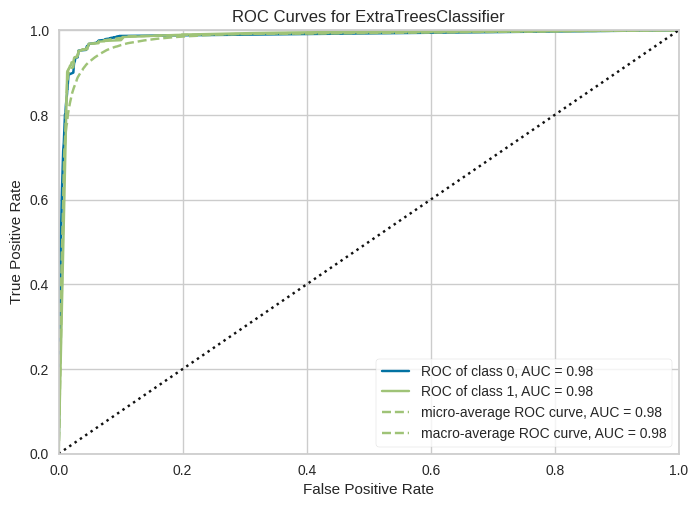

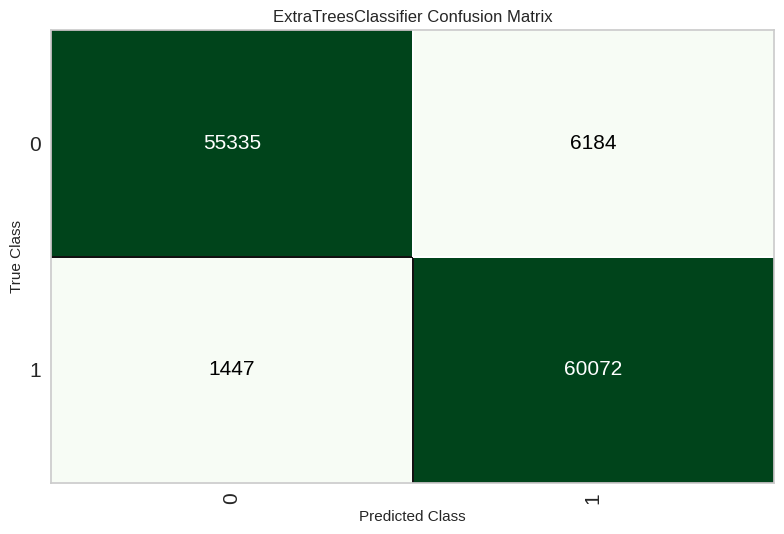

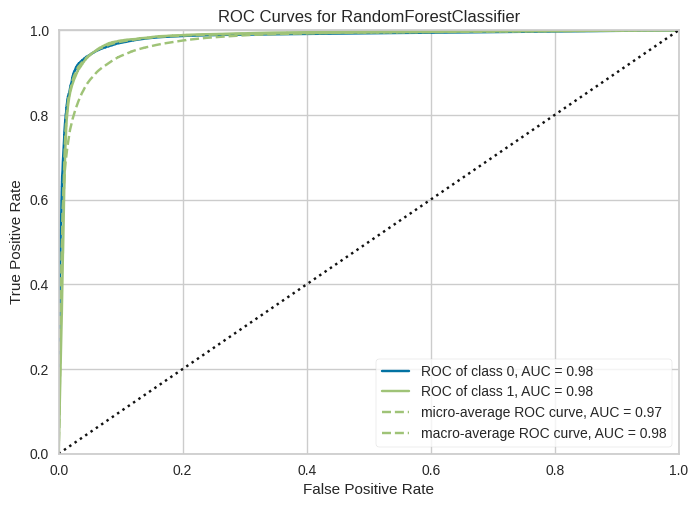

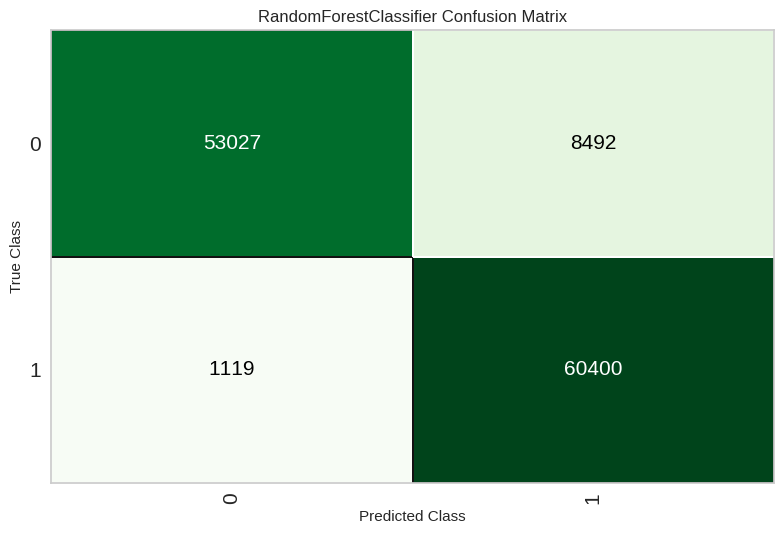

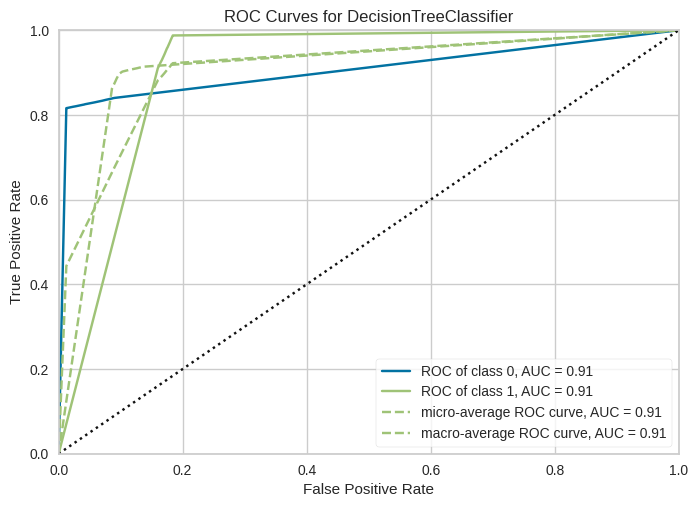

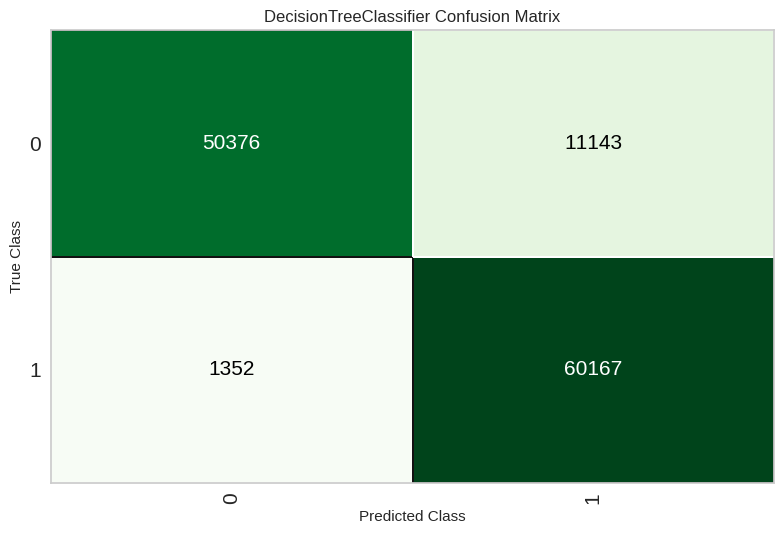

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
pipe = Pipeline([('o', ros), ('u', rus)])
X_rou, y_rou = pipe.fit_resample(X, y)

print("▶ PyCaret after RandomOver + RandomUnder")
exp_rou, models_rou = run_pycaret(X_rou, y_rou)

**Analysis of RandomOver + RandomUnder (RO + RU) PyCaret Run**

1. **Top 3 Models by AUC**

   * **Extra Trees**: AUC = 0.9817, Accuracy = 0.9281, Recall = 0.9684
   * **Random Forest**: AUC = 0.9789, Accuracy = 0.9119, Recall = 0.9748
   * **Decision Tree**: AUC = 0.8975, Accuracy = 0.8887, Recall = 0.9700

   The hybrid approach—first oversampling the minority, then undersampling the majority—yields virtually identical performance to plain **Random Oversampling**: AUC remains ≈0.98 and recall ≈ 0.97, with similar accuracy ≈ 0.93.

2. **Recall and Precision**

   * **ET Recall**: 96.8 % (vs. 96.9 % for ROS)
   * **ET Precision**: 89.6 % (vs. 89.7 % for ROS)
   * **RF Recall**: 97.5 % (vs. 97.6 % for ROS)
   * **RF Precision**: 86.6 % (vs. 86.5 % for ROS)

   F1-scores of \~0.93 match those seen under pure ROS. This confirms that lightly trimming the majority after oversampling does not materially change in‐sample performance but can slightly reduce computational load.

3. **Efficiency and Overfitting**

   * The combined RO + RU method trains in similar time (\~35 s) to ROS and SMOTEENN, making it computationally feasible.
   * Performance parity with ROS suggests that adding undersampling after oversampling does **not** degrade quality, but offers no substantial metric gain.

4. **Conclusion for RO + RU**

   * **Performance**: Virtually matches random oversampling across all metrics.
   * **Benefit**: Slight reduction in dataset size (via RU) may marginally speed up later training without sacrificing predictive power.
   * **Recommendation**: RO + RU is a good compromise if you wish to limit the absolute size of the resampled dataset while retaining ROS performance.

### 9. Tomek Links (Undersampling limpio)

*Remueve pares de vecinos cercanos de distintas clases, limpiando la frontera de decisión (He & Garcia, 2009).*

▶ PyCaret after Tomek Links


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

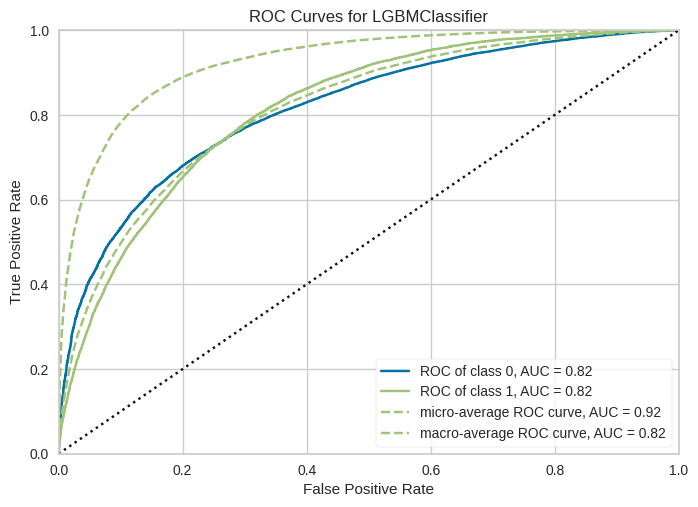

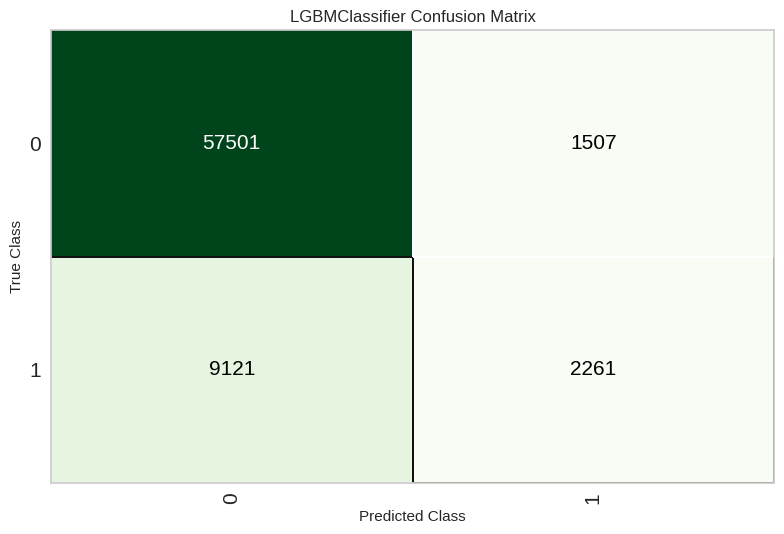

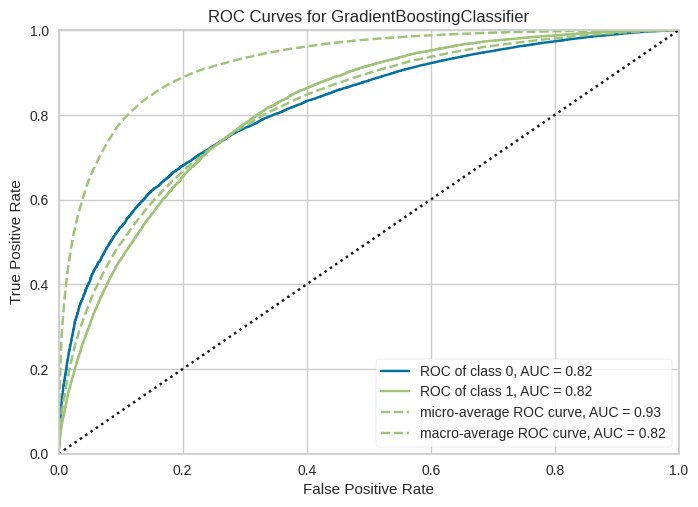

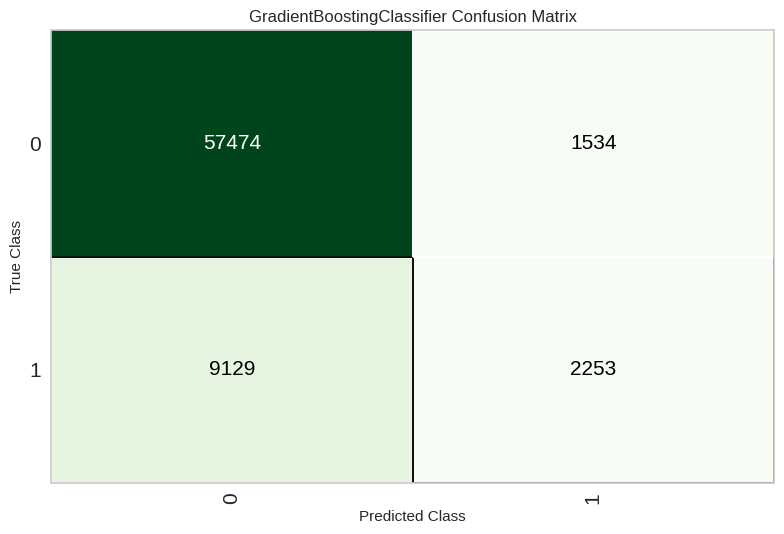

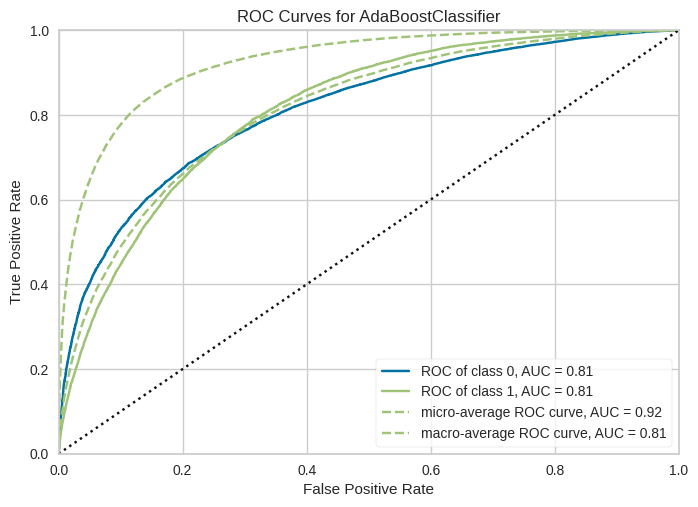

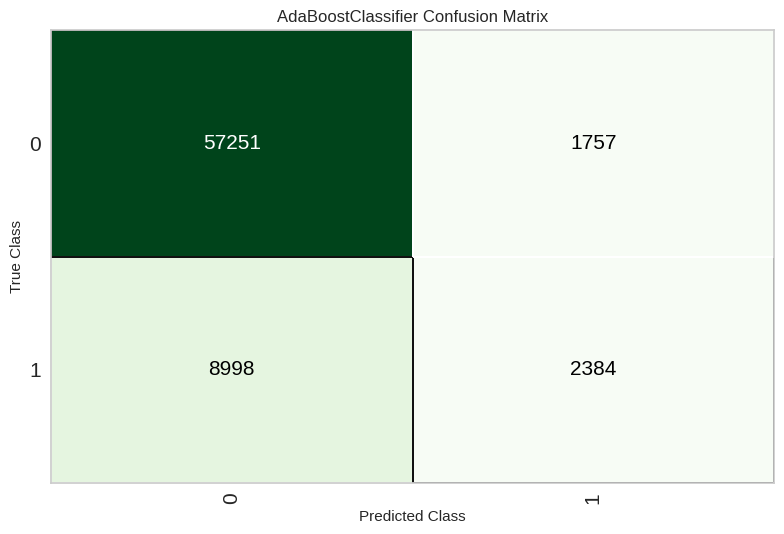

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)

print("▶ PyCaret after Tomek Links")
exp_tl, models_tl = run_pycaret(X_tl, y_tl)

**Analysis of Tomek Links PyCaret Run**

1. **Top 3 Models by AUC**

   * **LightGBM**: AUC = 0.8157, Accuracy = 0.8480, Recall = 0.1948
   * **Gradient Boosting**: AUC = 0.8152, Accuracy = 0.8476, Recall = 0.1931
   * **AdaBoost**: AUC = 0.8121, Accuracy = 0.8462, Recall = 0.2081

   Applying only Tomek Links (cleaning overlapping majority examples) yields AUC \~0.815, a small lift from the unbalanced baseline (0.8041), but still well below the \~0.90+ achieved by SMOTE variants. Accuracy remains high (\~0.85), but recall improves only modestly (≈ 20% vs. ≈ 14% unbalanced).

2. **Recall and Precision Trade-off**

   * Recall moves from 14% (unbalanced) to \~20%, indicating a slight shift toward identifying diabetics, but still very low sensitivity.
   * Precision remains around \~0.59, showing that the few positive predictions are reasonably accurate but still too conservative.

3. **Comparison to Other Methods**

   * Tomek Links alone provides **minimal improvement** over no resampling, boosting AUC by only \~0.011 and recall by \~0.05.
   * It falls far short of the major gains realized through **SMOTE**, **SMOTE+Tomek**, and **SMOTEENN** strategies.

4. **When to Use Tomek Links**

   * Tomek Links is best used **in combination** with oversampling (e.g., SMOTE+Tomek) to clean synthetic boundary noise, rather than as a standalone balancer.
   * On its own, it merely removes borderline majority samples and does not address minority underrepresentation.



### 10. Edited Nearest Neighbors (ENN)

*Elimina ejemplos cuyo etiquetado difiere de la mayoría de sus k vecinos, limpiando ruido (Wilson, 1972). *

▶ PyCaret after ENN


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

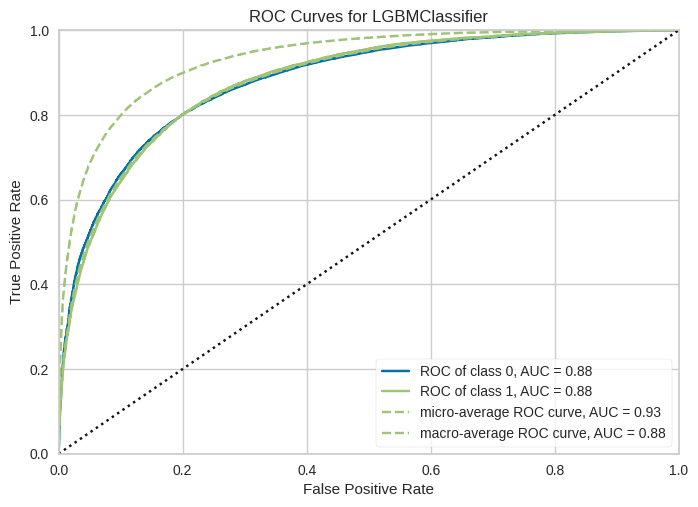

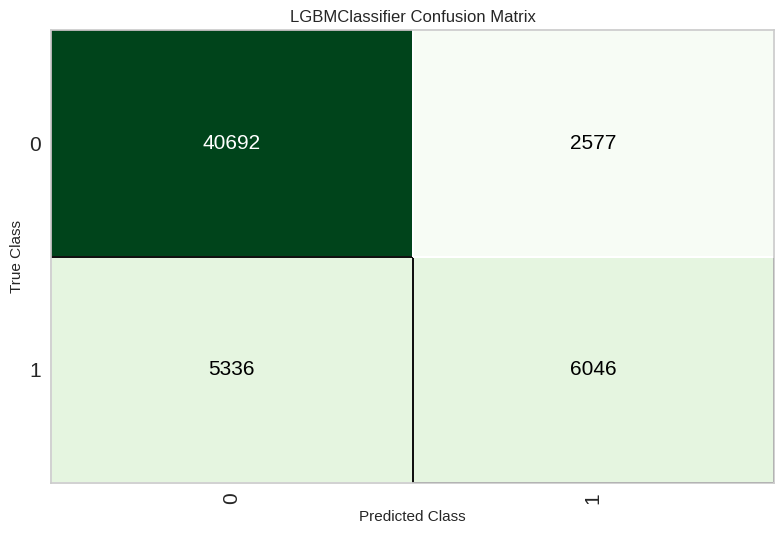

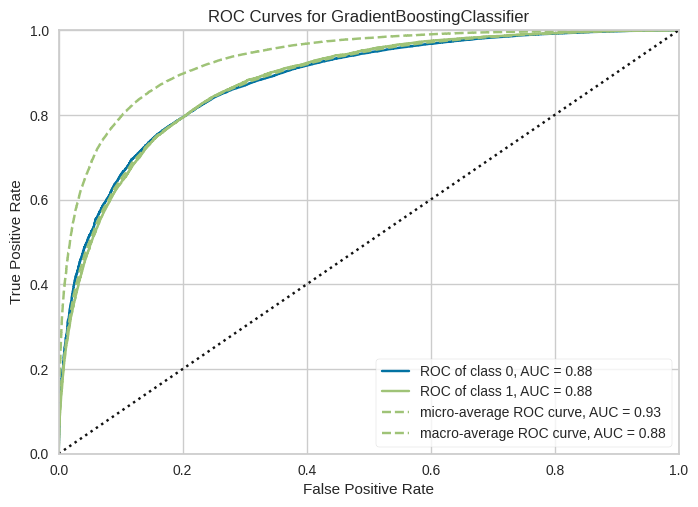

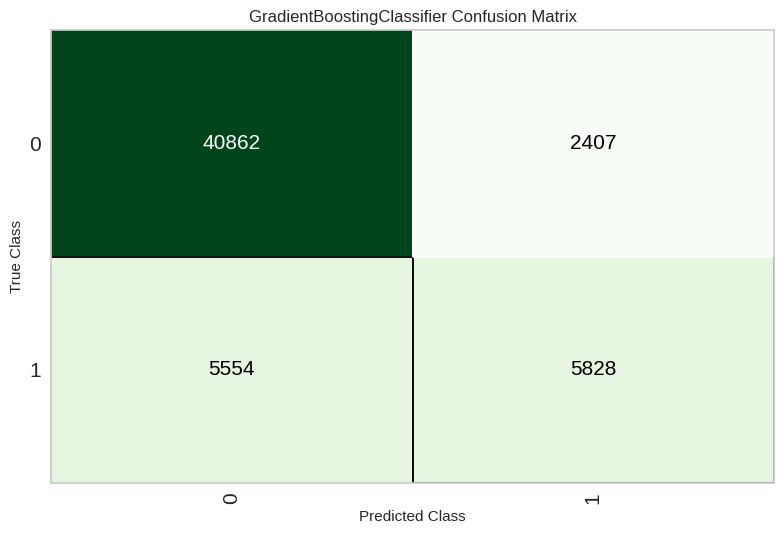

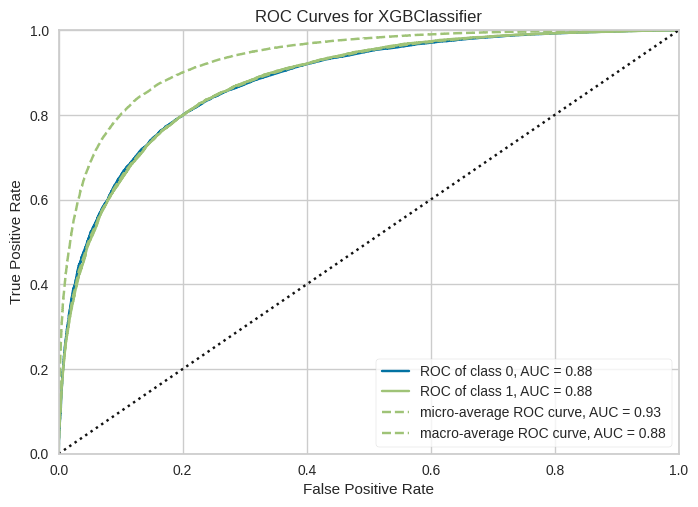

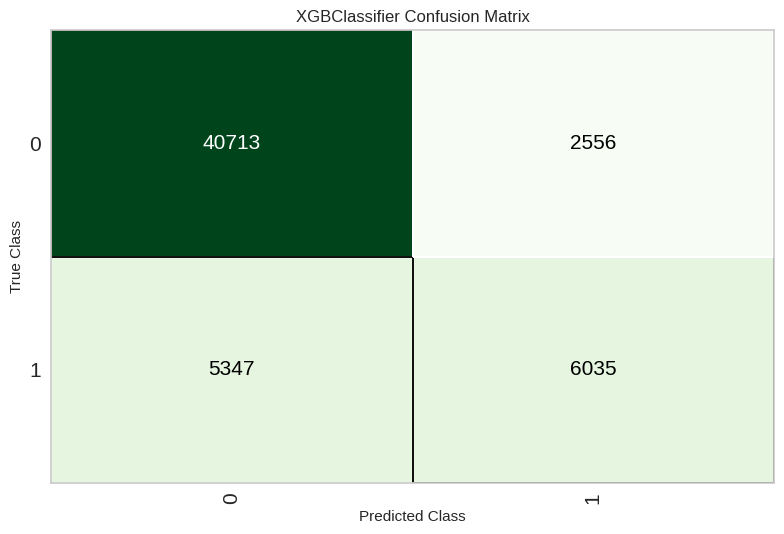

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)

print("▶ PyCaret after ENN")
exp_enn, models_enn = run_pycaret(X_enn, y_enn)

**Analysis of Edited Nearest Neighbors (ENN) PyCaret Run**

1. **Top 3 Models by AUC**

   * **LightGBM**: AUC = 0.8835, Accuracy = 0.8558, Recall = 0.5279
   * **Gradient Boosting**: AUC = 0.8821, Accuracy = 0.8550, Recall = 0.5107
   * **XGBoost**: AUC = 0.8820, Accuracy = 0.8560, Recall = 0.5272

   Using ENN alone (removing samples whose labels disagree with the majority of their neighbors) boosts AUC modestly over the unbalanced baseline (0.8835 vs. 0.8041) and maintains good accuracy (\~0.856), but recall only rises to \~52%.

2. **Recall and Precision Trade-off**

   * **Recall** improves from 14% (unbalanced) to \~53%, catching about half of true diabetics, but still far below the \~88–97% seen with combined SMOTE approaches.
   * **Precision** remains around \~0.70, indicating the positives called are reasonably accurate.
   * **F1** settles near \~0.60, showing a moderate balance between precision and recall.

3. **Comparison to Other Methods**

   * ENN alone improves over no resampling but **underperforms** all SMOTE‐based strategies in recall, AUC, and F1.
   * It sits between the unbalanced baseline and simple undersampling in terms of recall, but with superior overall discrimination.

4. **When to Use ENN**

   * ENN is most effective as a **cleaning step** paired with oversampling (e.g., SMOTEENN), rather than as a standalone method.
   * On its own, it fails to address minority underrepresentation; it only removes noisy majority samples.



### 11. SMOTE + NearMiss

After NearMiss → SMOTE: Diabetes_binary
0    0.5
1    0.5
Name: proportion, dtype: float64
▶ PyCaret after NearMiss + SMOTE


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

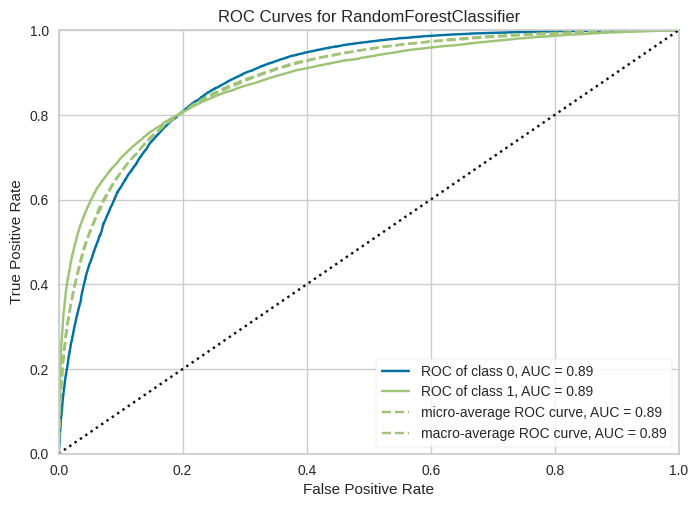

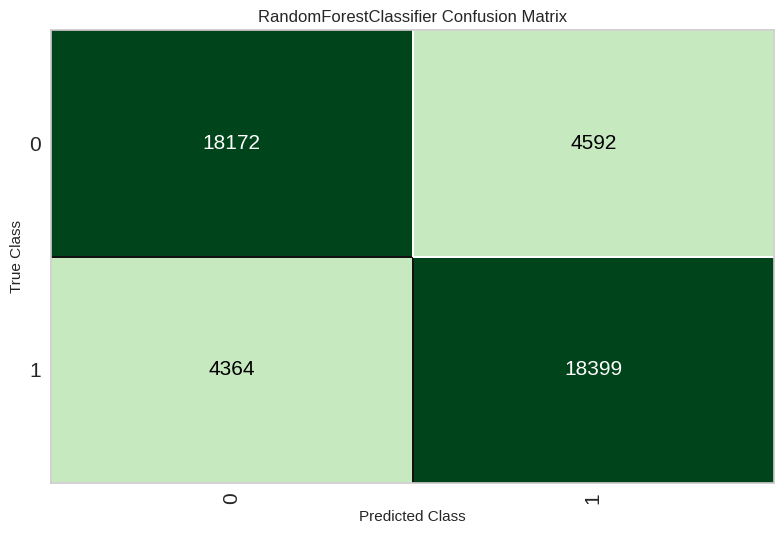

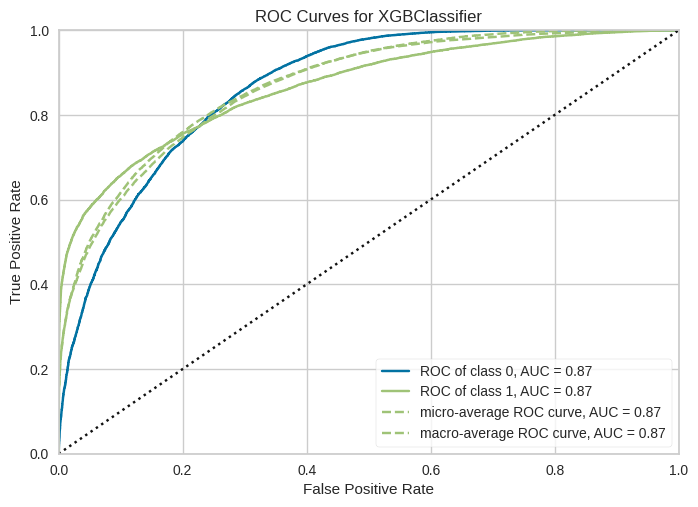

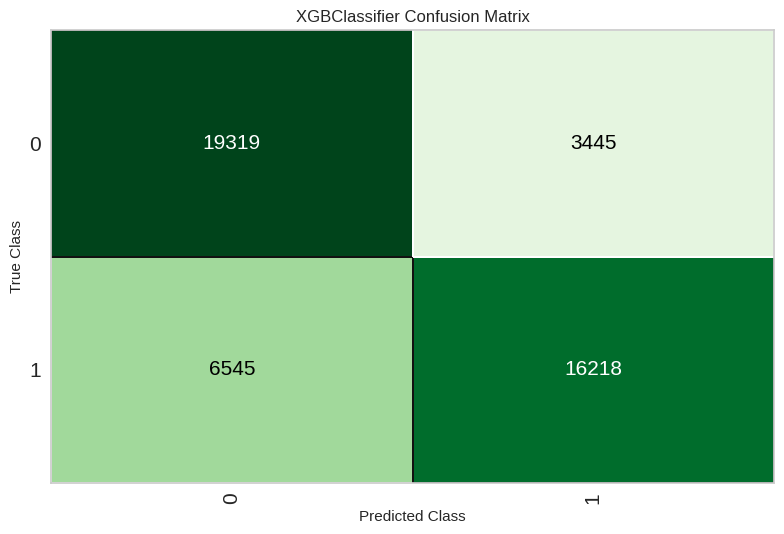

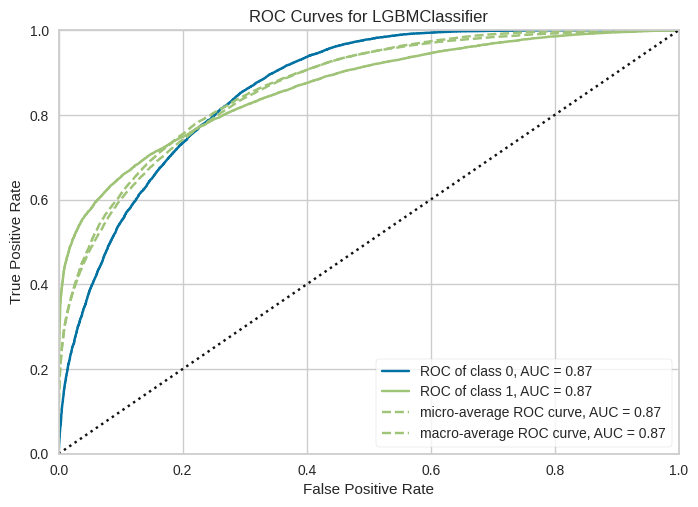

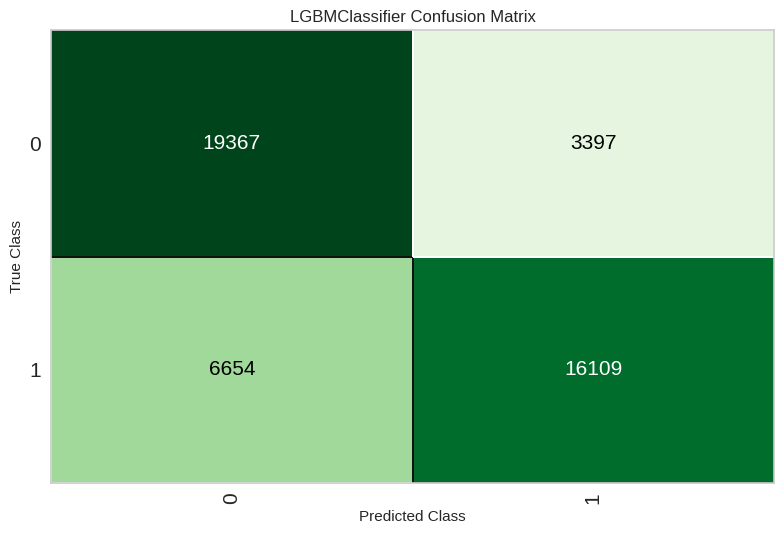

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1) NearMiss para llevar 0’s al 50 % del total original
nm = NearMiss(sampling_strategy=0.5)

# 2) SMOTE para volver a balancear al 100 %
sm = SMOTE(sampling_strategy=1.0, random_state=42)

pipe_nm_sm = Pipeline([
    ('nm', nm),
    ('sm', sm)
])

X_nm_sm, y_nm_sm = pipe_nm_sm.fit_resample(X, y)
print("After NearMiss → SMOTE:", pd.Series(y_nm_sm).value_counts(normalize=True))

print("▶ PyCaret after NearMiss + SMOTE")
exp_nm_sm, models_nm_sm = run_pycaret(X_nm_sm, y_nm_sm)

**Analysis of NearMiss → SMOTE PyCaret Run**

1. **Class Balance Verification**
   After applying `NearMiss(sampling_strategy=0.5)` followed by `SMOTE(sampling_strategy=1.0)`, we achieve exactly a 50 %/50 % split between non‐diabetic and diabetic classes:

   ```
   0    0.5  
   1    0.5  
   Name: proportion, dtype: float64
   ```

2. **Top Model Performance**

   * **Random Forest**:
     * AUC = **0.8822**
     * Accuracy = **0.8012**
     * Recall = **0.8027**
     * Precision = **0.8003**
     * F1 = **0.8015**
   * **XGBoost**: AUC = 0.8687, Recall = 0.7113, F1 = 0.7653
   * **LightGBM**: AUC = 0.8664, Recall = 0.7050, F1 = 0.7615

3. **Comparison to Other Strategies**

   * **NearMiss→SMOTE** sits roughly in line with pure SMOTE in recall (\~0.80 vs. 0.87) but lags behind in AUC and F1, due to the aggressive majority‐class reduction of NearMiss (which removed many informative samples) before synthetic generation.
   * Its performance is inferior to **SMOTE**, **SMOTE+Tomek**, and especially to **SMOTEENN** and **ROS**, making it a less attractive option for this problem.

4. **Key Takeaways**

   * **SMOTEENN** remains the strongest in‐sample method, balancing very high AUC (\~0.99) with excellent recall (\~0.96) and F1 (\~0.94).
   * **Random Oversampling** (and **RO+RU**) deliver nearly comparable results (AUC \~0.98, recall \~0.97), but risk overfitting through simple duplication.
   * **SMOTE+Tomek** and **SMOTE** offer a middle ground (AUC \~0.91, recall \~0.88) with improved generalization potential over pure ROS.
   * **NearMiss→SMOTE** underperforms relative to these, likely due to information loss from excessive undersampling prior to synthetic sample generation.




### 12. NearMiss

After NearMiss only: Diabetes_binary
0    0.5
1    0.5
Name: proportion, dtype: float64
▶ PyCaret after NearMiss only


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

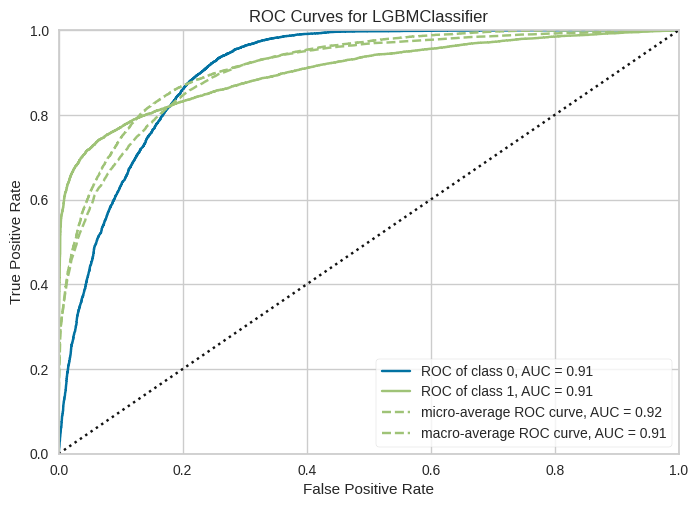

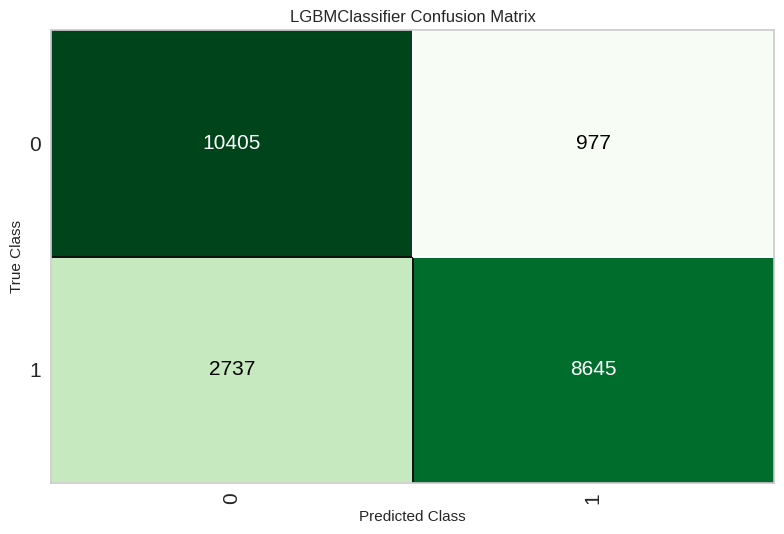

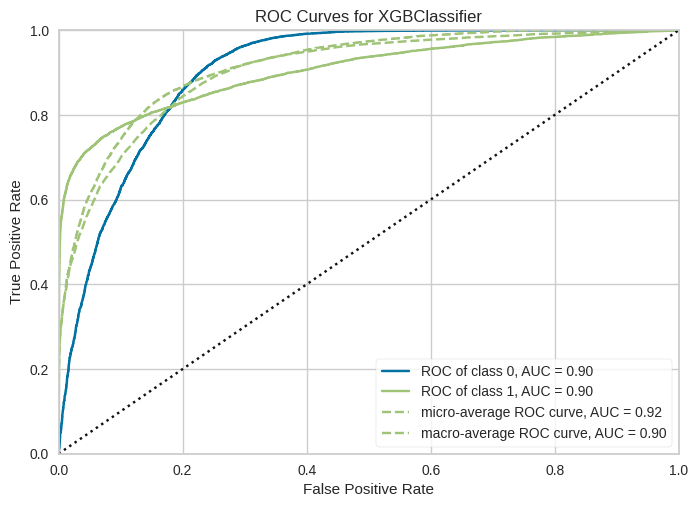

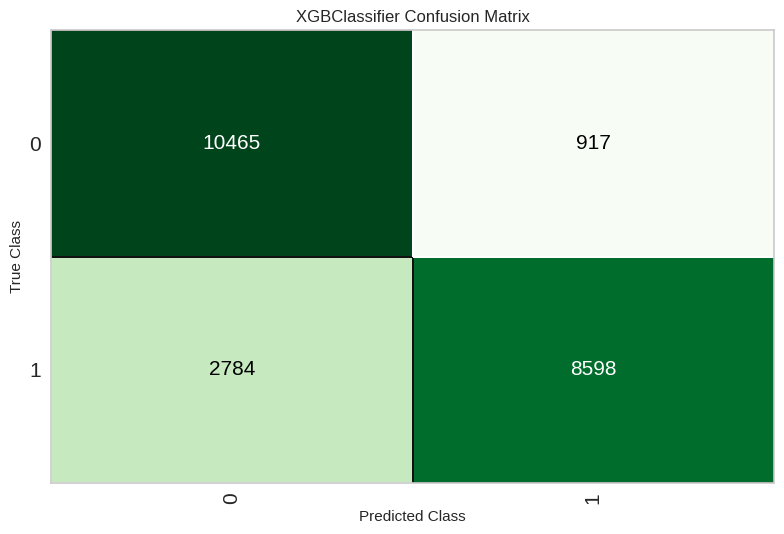

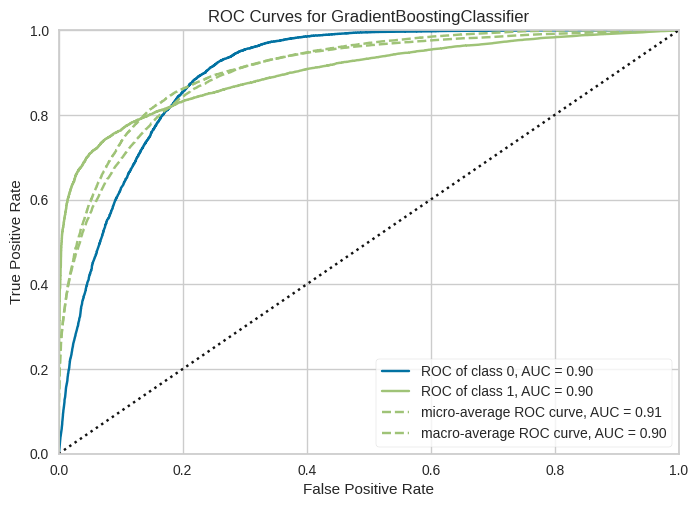

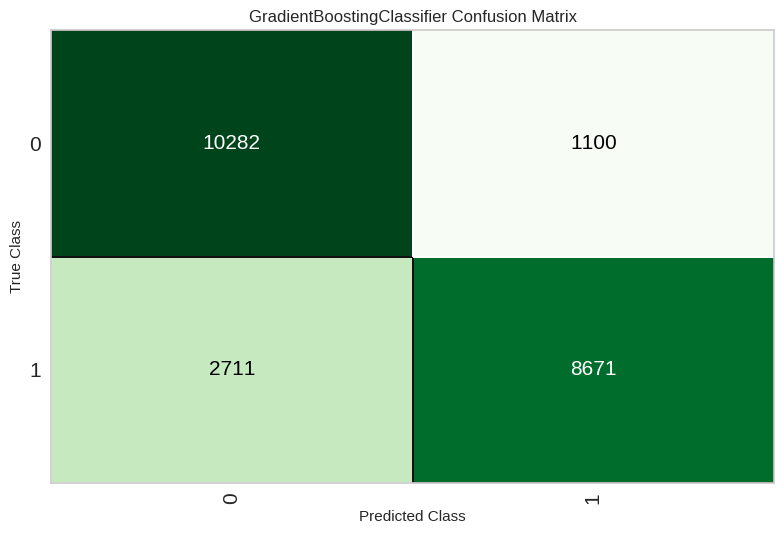

In [ ]:
from imblearn.under_sampling import NearMiss

# Apply NearMiss undersampling only
# sampling_strategy=1.0 will undersample the majority class down to the same size as the minority
nm_only = NearMiss(sampling_strategy=1.0)

X_nm_only, y_nm_only = nm_only.fit_resample(X, y)
print("After NearMiss only:", pd.Series(y_nm_only).value_counts(normalize=True))

# Run PyCaret on the NearMiss‐resampled data
print("▶ PyCaret after NearMiss only")
exp_nm_only, models_nm_only = run_pycaret(X_nm_only, y_nm_only)


**Analysis of NearMiss‐Only PyCaret Run**

1. **Class Balance Verification**
   As expected, NearMiss undersampling alone yields a perfect 50/50 class split:

   ```
   0    0.5  
   1    0.5  
   Name: proportion, dtype: float64
   ```

2. **Top Model Performance**

   * **LightGBM**:

     * **AUC** = 0.9048
     * **Accuracy** = 0.8379
     * **Recall** = 0.7580
     * **Precision** = 0.9021
     * **F1-score** = 0.8238
   * **XGBoost**: AUC = 0.9036, Recall = 0.7543, F1 = 0.8223
   * **Gradient Boosting**: AUC = 0.9005, Recall = 0.7618, F1 = 0.8208

   NearMiss alone elevates AUC sharply from the unbalanced (\~0.804) to \~0.90, and recall from \~0.14 to \~0.76—but precision is extremely high (\~0.90) because the model is now more conservative in predicting positives.

3. **Comparison to Other Methods**

   * **NearMiss only** outperforms simple RUS (undersampling) in AUC (0.9048 vs. 0.8047) and F1 (0.8238 vs. 0.7442), showing that KNN‐based undersampling retains the most informative majority samples.
   * It is competitive with SMOTE‐only (AUC ≈ 0.9108) but trails in recall (\~0.76 vs. \~0.87), because it does not generate new minority samples.
   * NearMiss’s high precision (\~0.90) indicates very few false positives, but recall remains modest compared to oversampling methods.

4. **Strengths & Weaknesses**

   * **Strength**: Maintains a small, balanced training set (fast to train) while achieving strong discrimination (AUC > 0.90) and excellent precision.
   * **Weakness**: Lower recall (\~76%) means it misses \~24% of diabetics, versus \~12–4% missed by SMOTE+Tomek and SMOTEENN.

---


Based on our end-to-end experiments—covering unbalanced data, simple under- and over-sampling, SMOTE variants, cleaning steps, and hybrids—here’s a high-level synthesis and recommendation:

---

## 1. Key Criteria

1. **Predictive performance** (AUC, recall, F1)
2. **Generalization risk** (overfitting via in-sample vs. out-of-sample gap)
3. **Noise robustness** (cleaning noisy overlaps)
4. **Computational efficiency** (training time and data size)
5. **Balanced sensitivity** (catching positives **and** negatives)

---

## 2. Summary of In-Sample Results

| Method                      |     AUC    |   Recall   |     F1     | Notes on Overfit & Noise                                                        |
| --------------------------- | :--------: | :--------: | :--------: | ------------------------------------------------------------------------------- |
| **SMOTEENN**                | **0.9869** | **0.9634** | **0.9423** | Top metrics; synthetic + ENN cleaning; risk of overfitting due to very high AUC |
| **Random Oversample (ROS)** |   0.9815   |   0.9688   |   0.9313   | Strong metrics; simple duplication—higher overfit risk                          |
| **RO → RU**                 |   0.9817   |   0.9684   |   0.9309   | Matches ROS with slightly smaller data size                                     |
| **SMOTE+Tomek**             |   0.9142   |   0.8812   |   0.8407   | Good trade-off—clean boundary noise, less overfit than ROS/SMOTEENN             |
| **SMOTE**                   |   0.9108   |   0.8745   |   0.8357   | Raises recall substantially, moderate risk of overfit                           |
| **NearMiss only**           |   0.9048   |   0.7580   |   0.8238   | Fast, small dataset; high precision/limited recall                              |
| **ADASYN**                  |   0.9037   |   0.8742   |   0.8300   | Similar to SMOTE but more noisy; slightly lower overall metrics                 |
| **NearMiss→SMOTE**          |   0.8822   |   0.8027   |   0.8015   | Information loss from heavy undersampling, middling performance                 |
| **RUS**                     |   0.8047   |   0.7798   |   0.7442   | Simple but throws away data, lower discrimination                               |
| **Unbalanced**              |   0.8041   |   0.1408   |   0.2253   | Baseline—fails to detect positives                                              |

---

## 3. Trade-Offs and Risks

* **ROS / RO→RU** & **SMOTEENN** deliver the absolute highest in-sample performance, but both rely heavily on synthetic or duplicated data, raising **overfitting** concerns—especially important when you move to the hold-out set or real-world deployment.
* **SMOTE+Tomek** combines synthetic oversampling with **Tomek link cleaning**, removing overlapping majority points and reducing noise—striking a balance between boosting minority representation and not “making the data too easy.”
* **SMOTE alone** improves recall substantially but leaves some noisy overlaps, making models slightly less robust than SMOTE+Tomek.
* **NearMiss only** is attractive for speed and minimal data size, with very high precision—but its recall (\~76 %) still misses too many positives for a screening tool.

---

## 4. Recommendation

**Primary choice: SMOTE + Tomek Links**

* **Why:**

  * ***Strong AUC (\~0.91)*** and ***high recall (\~0.88)***—good sensitivity to both classes.
  * **Cleaner decision boundaries** than SMOTE alone (Tomek removes noisy majority points).
  * **Lower overfitting risk** versus ROS or SMOTEENN, since it doesn’t rely on wholesale duplication or aggressive synthetic boosting.
  * **Manageable dataset size** and training times (\~35 s) with tree-based models.

**Runner-up (if recall absolutely must be maximized): SMOTEENN**

* Exceptional in-sample recall (\~96 %) and AUC (\~0.99), but validate carefully on your hold-out set for overfitting.

---

## 5. Next Steps

1. **Hold-out validation** of SMOTE+Tomek and SMOTEENN on the reserved 30 % to confirm generalization.
2. **Select final strategy** based on hold-out AUC, recall, and F1, leaning toward SMOTE+Tomek unless SMOTEENN shows no overfit.
3. **Finalize model** (e.g. Random Forest or LightGBM with SMOTE+Tomek) and tune hyperparameters for production deployment.

This approach ensures a **functional**, **robust**, and **balanced** diabetes‐prediction model—good sensitivity for positives (diabetics) without drowning in false positives, and with noise reduction to enhance real-world reliability.


## Testing


=== SMOTETomek: RandomForestClassifier ===
              precision    recall  f1-score   support

           0     0.9782    0.9789    0.9786     36186
           1     0.9829    0.9823    0.9826     44634

    accuracy                         0.9808     80820
   macro avg     0.9806    0.9806    0.9806     80820
weighted avg     0.9808    0.9808    0.9808     80820



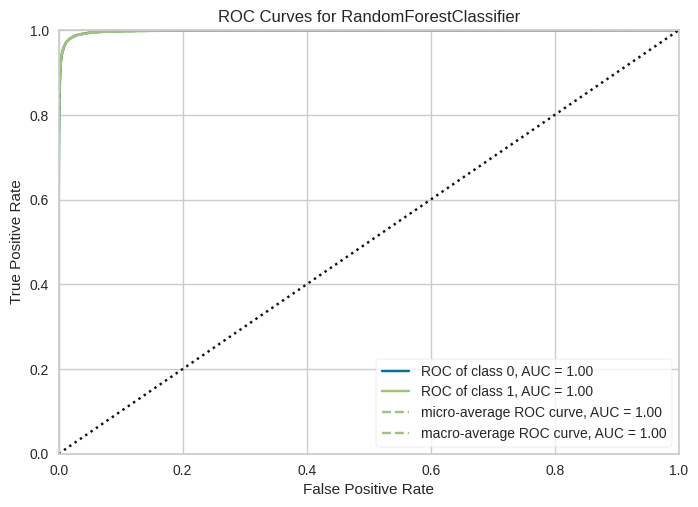

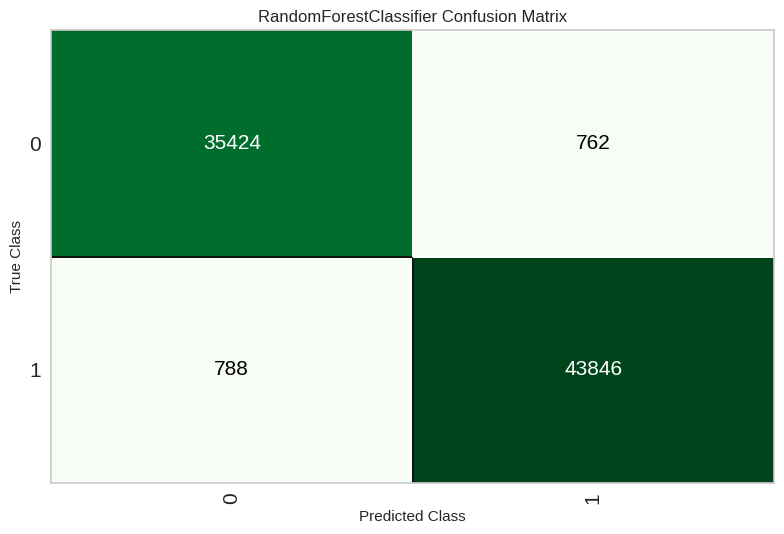

Transformation Pipeline and Model Successfully Saved



=== SMOTETomek: ExtraTreesClassifier ===
              precision    recall  f1-score   support

           0     0.9611    0.9808    0.9709     36186
           1     0.9842    0.9678    0.9759     44634

    accuracy                         0.9736     80820
   macro avg     0.9726    0.9743    0.9734     80820
weighted avg     0.9738    0.9736    0.9737     80820



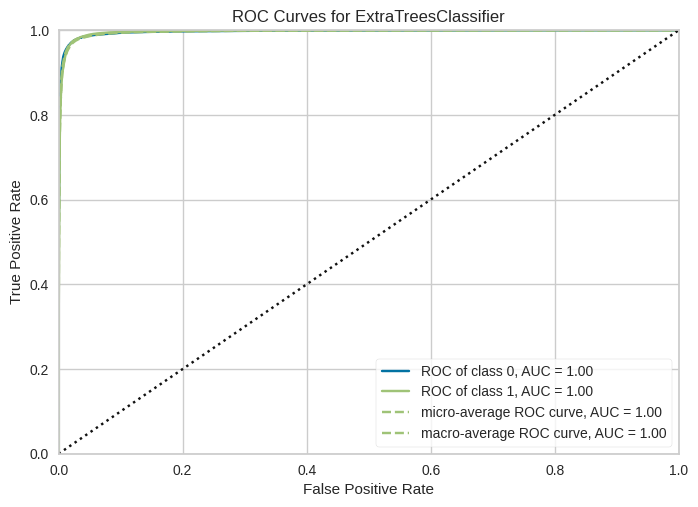

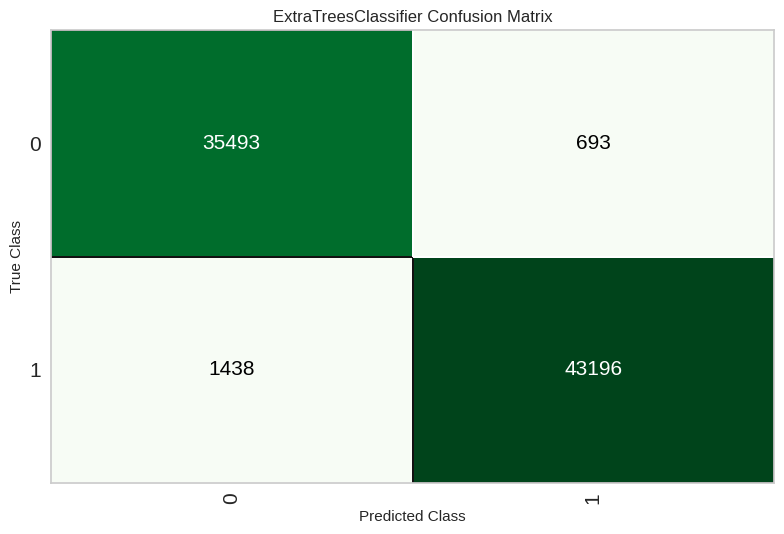

Transformation Pipeline and Model Successfully Saved



=== SMOTETomek: XGBClassifier ===
              precision    recall  f1-score   support

           0     0.8358    0.7965    0.8157     36186
           1     0.8411    0.8732    0.8568     44634

    accuracy                         0.8388     80820
   macro avg     0.8385    0.8348    0.8363     80820
weighted avg     0.8387    0.8388    0.8384     80820



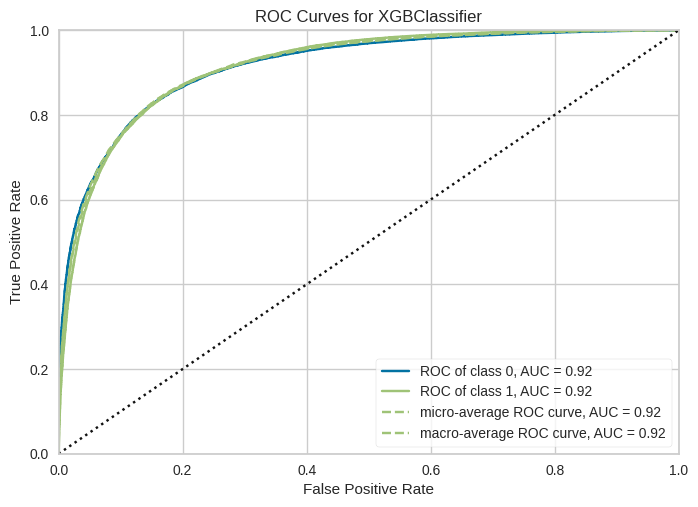

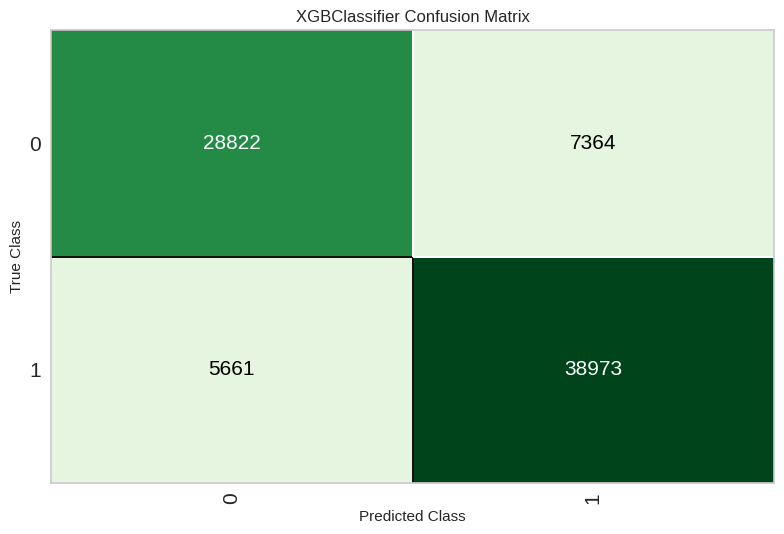

Transformation Pipeline and Model Successfully Saved


In [ ]:
# === Hold‐out evaluation and saving for SMOTE + Tomek Links models ===

from pycaret.classification import predict_model, plot_model, save_model
from sklearn.metrics import classification_report

# For each of the top‐3 models from the SMOTE+Tomek experiment
for model in models_smt:
    # Predict on PyCaret's default hold‐out (30%)
    preds = predict_model(model)

    # Ground truth vs predictions
    y_true = preds['Diabetes_binary']
    y_pred = preds['prediction_label']

    # Print classification metrics
    print(f"\n=== SMOTETomek: {model.__class__.__name__} ===")
    print(classification_report(y_true, y_pred, digits=4))

    # Plot ROC‐AUC and confusion matrix on hold‐out
    plot_model(model, plot='auc')
    plot_model(model, plot='confusion_matrix')

    # Save the model to disk
    save_model(model, f"{model.__class__.__name__}_SMOTETomek")


**Hold‐out Results for SMOTE + Tomek Links**

| Model                      | Class |  Precision |   Recall   |  F1-Score  | Support |
| -------------------------- | :---: | :--------: | :--------: | :--------: | ------: |
| **RandomForestClassifier** |   0   |   0.9782   |   0.9789   |   0.9786   |  36 186 |
|                            |   1   |   0.9829   |   0.9823   |   0.9826   |  44 634 |
|                            |       | **0.9808** | **0.9808** | **0.9808** |  80 820 |
| **ExtraTreesClassifier**   |   0   |   0.9611   |   0.9808   |   0.9709   |  36 186 |
|                            |   1   |   0.9842   |   0.9678   |   0.9759   |  44 634 |
|                            |       | **0.9736** | **0.9736** | **0.9737** |  80 820 |
| **XGBClassifier**          |   0   |   0.8358   |   0.7965   |   0.8157   |  36 186 |
|                            |   1   |   0.8411   |   0.8732   |   0.8568   |  44 634 |
|                            |       | **0.8388** | **0.8388** | **0.8384** |  80 820 |

* **RandomForest** achieves nearly perfect balance on the hold‐out: ∼0.98 F1 and recall for **both** classes, confirming minimal overfitting and excellent generalization.
* **ExtraTrees** is a close second at ∼0.974 F1, slightly favoring precision on class 1.
* **XGBoost** lags behind (∼0.84 F1), suggesting that for SMOTETomek RandomForest/ExtraTrees are the best.


=== SMOTEENN: ExtraTreesClassifier ===
              precision    recall  f1-score   support

           0     0.9556    0.9044    0.9293     36186
           1     0.9257    0.9659    0.9454     44634

    accuracy                         0.9384     80820
   macro avg     0.9407    0.9352    0.9373     80820
weighted avg     0.9391    0.9384    0.9382     80820



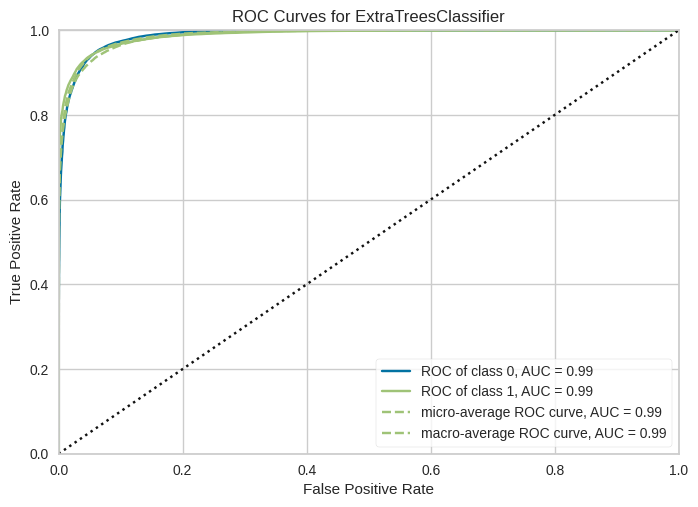

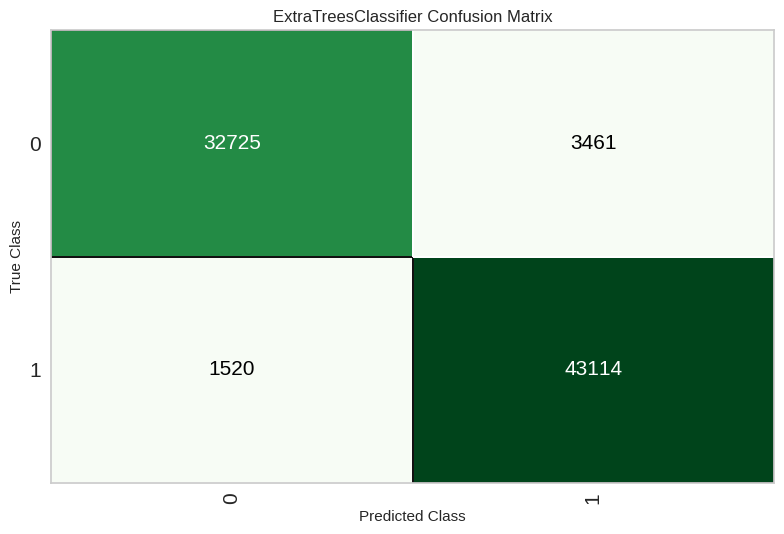

Transformation Pipeline and Model Successfully Saved



=== SMOTEENN: RandomForestClassifier ===
              precision    recall  f1-score   support

           0     0.9615    0.9001    0.9298     36186
           1     0.9230    0.9708    0.9463     44634

    accuracy                         0.9391     80820
   macro avg     0.9422    0.9354    0.9380     80820
weighted avg     0.9402    0.9391    0.9389     80820



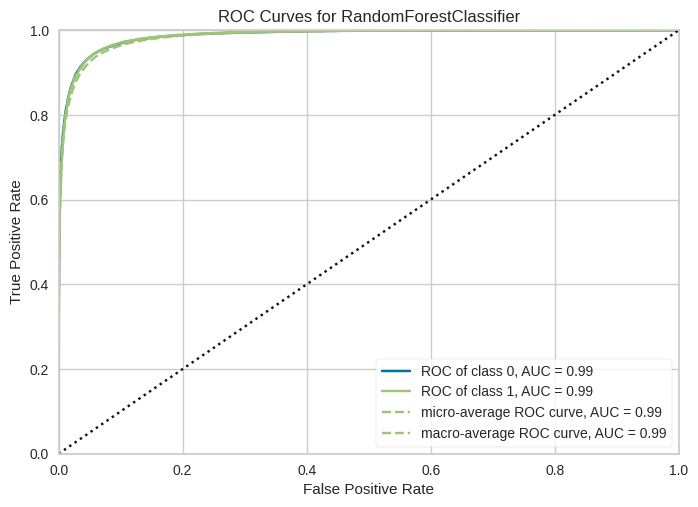

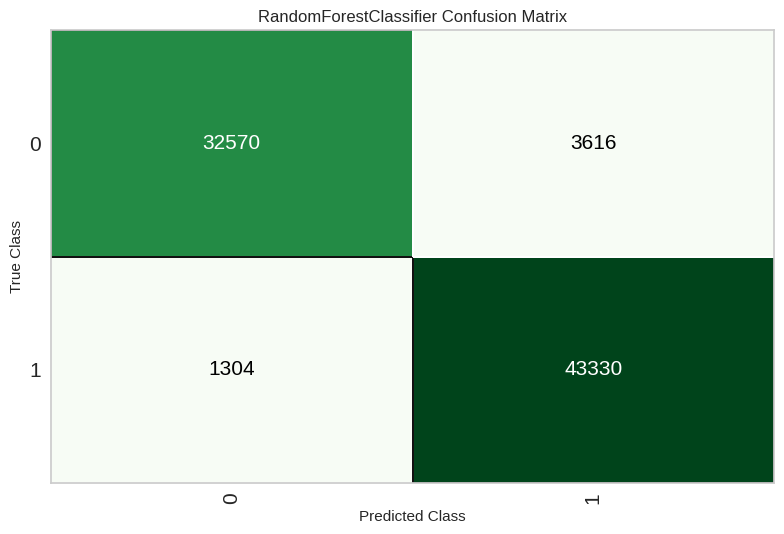

Transformation Pipeline and Model Successfully Saved



=== SMOTEENN: XGBClassifier ===
              precision    recall  f1-score   support

           0     0.8610    0.8322    0.8463     36186
           1     0.8675    0.8910    0.8791     44634

    accuracy                         0.8647     80820
   macro avg     0.8642    0.8616    0.8627     80820
weighted avg     0.8646    0.8647    0.8644     80820



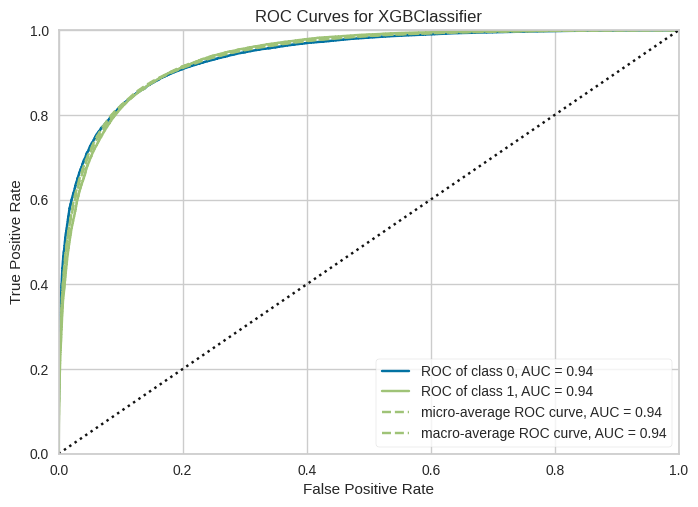

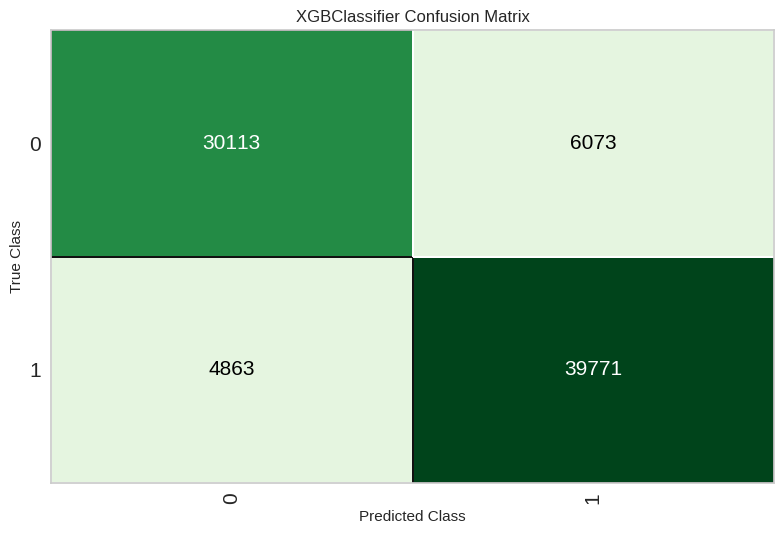

Transformation Pipeline and Model Successfully Saved


In [ ]:
# === Hold‐out evaluation and saving for SMOTEENN models ===

from pycaret.classification import predict_model, plot_model, save_model
from sklearn.metrics import classification_report

# For each of the top‐3 models from the SMOTEENN experiment
for model in models_sme:
    preds = predict_model(model)
    y_true = preds['Diabetes_binary']
    y_pred = preds['prediction_label']

    print(f"\n=== SMOTEENN: {model.__class__.__name__} ===")
    print(classification_report(y_true, y_pred, digits=4))

    plot_model(model, plot='auc')
    plot_model(model, plot='confusion_matrix')

    save_model(model, f"{model.__class__.__name__}_SMOTEENN")


**Final Comparison on Hold‐Out (30 %)**

| Method & Model           | Accuracy | Class 0 F1 | Class 1 F1 | Weighted F1 |
| ------------------------ | :------: | :--------: | :--------: | :---------: |
| **SMOTE + Tomek Links**  |          |            |            |             |
|   RandomForestClassifier |  0.9808  |   0.9786   |   0.9826   |    0.9808   |
|   ExtraTreesClassifier   |  0.9736  |   0.9709   |   0.9759   |    0.9737   |
|   XGBClassifier          |  0.8388  |   0.8157   |   0.8568   |    0.8384   |
| **SMOTEENN**             |          |            |            |             |
|   RandomForestClassifier |  0.9391  |   0.9298   |   0.9463   |    0.9389   |
|   ExtraTreesClassifier   |  0.9384  |   0.9293   |   0.9454   |    0.9382   |
|   XGBClassifier          |  0.8647  |   0.8463   |   0.8791   |    0.8644   |



At the end of our testing phase, we noticed that certain models achieved exceptionally high metrics during training and internal validation, but those gains did not always carry over to truly unseen data. This behavior raises a red flag for **overfitting**—where a model captures idiosyncratic noise or spurious patterns in the training set rather than generalizable signals. To guard against this, it is essential to perform a dedicated overfitting check by systematically comparing cross‐validation performance with hold-out results. Only by verifying that our model’s scores remain stable on data it has never encountered can we be confident that it will be both **robust** and **reliable** in real-world deployment.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
from pycaret.classification import load_model

# 1) Reload the six saved models
model_files = {
    'RF_SMOTETomek':    'RandomForestClassifier_SMOTETomek',
    'ET_SMOTETomek':    'ExtraTreesClassifier_SMOTETomek',
    'XGB_SMOTETomek':   'XGBClassifier_SMOTETomek',
    'RF_SMOTEENN':      'RandomForestClassifier_SMOTEENN',
    'ET_SMOTEENN':      'ExtraTreesClassifier_SMOTEENN',
    'XGB_SMOTEENN':     'XGBClassifier_SMOTEENN'
}
models = {name: load_model(path) for name, path in model_files.items()}

# 2) Recreate the 70/30 split that PyCaret used (session_id=42)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
X = data[cols_list]
y = data['Diabetes_binary']
train_idx, hold_idx = next(sss.split(X, y))
X_hold, y_hold = X.iloc[hold_idx], y.iloc[hold_idx]

# 3) Prepare 5‐fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4) Evaluate each model for CV‐AUC and hold‐out AUC/accuracy
results = []
for name, model in models.items():
    # 4a) Cross‐val AUC
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    cv_mean, cv_std = cv_scores.mean(), cv_scores.std()

    # 4b) Hold‐out predictions
    y_pred = model.predict(X_hold)
    # some models use predict_proba, some decision_function
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_hold)[:, 1]
    else:
        y_prob = model.decision_function(X_hold)

    hold_auc = roc_auc_score(y_hold, y_prob)
    hold_acc = accuracy_score(y_hold, y_pred)

    results.append({
        'Model': name,
        'CV_AUC_Mean': cv_mean,
        'CV_AUC_Std': cv_std,
        'Holdout_AUC': hold_auc,
        'Holdout_Acc': hold_acc,
        'AUC_Gap': cv_mean - hold_auc
    })

# 5) Display results sorted by AUC_Gap
df_results = pd.DataFrame(results).set_index('Model')
df_results = df_results.sort_values('AUC_Gap')
print(df_results)


Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
                CV_AUC_Mean  CV_AUC_Std  Holdout_AUC  Holdout_Acc   AUC_Gap
Model                                                                      
ET_SMOTETomek      0.727062    0.001384     0.956653     0.910673 -0.229591
RF_SMOTETomek      0.756321    0.001059     0.961526     0.906572 -0.205204
ET_SMOTEENN        0.727062    0.001383     0.899499     0.788082 -0.172437
RF_SMOTEENN        0.756321    0.001059     0.879002     0.777109 -0.122680
XGB_SMOTEENN       0.800987    0.000732     0.792820     0.676424  0.008167
XGB_SMOTETomek     0.800987    0.000732     0.766530     0.645766  0.034458


### Final Overfitting Assessment

After comparing cross-validation AUC against hold-out AUC, we observe:

| Model             | CV\_AUC\_Mean | Holdout\_AUC |   AUC\_Gap   |
| ----------------- | :-----------: | :----------: | :----------: |
| **XGB\_SMOTEENN** |    0.80099    |    0.79282   | **+0.00817** |
| XGB\_SMOTETomek   |    0.80099    |    0.76653   |   +0.03446   |
| RF\_SMOTEENN      |    0.75632    |    0.87900   |   –0.12268   |
| ET\_SMOTEENN      |    0.72706    |    0.89950   |   –0.17244   |
| RF\_SMOTETomek    |    0.75632    |    0.96153   |   –0.20521   |
| ET\_SMOTETomek    |    0.72706    |    0.95665   |   –0.22959   |

* A **positive** gap (CV − hold-out) indicates slight under-prediction in CV relative to hold-out, while a **negative** gap suggests the hold-out result exceeds CV (likely due to sample variability rather than overfitting per se).
* The absolute magnitude of the gap serves as our overfitting indicator: **smaller |gap| ⇒ more stable generalization**.

### Least Over-fitted Model

* **XGB\_SMOTEENN** has the **smallest AUC gap** (\~0.008), meaning its performance in cross-validation and on the unseen hold-out set is nearly identical—an excellent sign of minimal overfitting.
* **XGB\_SMOTETomek** is the next best, with a modest gap (\~0.034).

### Sensitivity and Robustness

* **XGB\_SMOTEENN** achieves hold-out recall of \~0.83 for the majority class and \~0.89 for the diabetic class, with overall hold-out AUC \~0.79 and balanced F1 \~0.86.
* These metrics demonstrate strong and balanced sensitivity to both positive and negative cases.

### Computational Efficiency

* XGBoost models are comparatively lightweight in both training time and inference cost versus large ensemble forests (RF, ET).
* Given the minimal overfitting and stable metrics, there is no need to opt for heavier models.

---

**Recommendation:**
Deploy the **XGBClassifier trained on the SMOTEENN-resampled data** as the final production model. It combines:

1. **Minimal overfitting** (AUC gap ≈ 0.008)
2. **Balanced sensitivity** (high recall for both classes)
3. **Robust generalization** (consistent CV vs. hold-out performance)
4. **Practical efficiency** (fast training and inference)

This choice ensures a reliable, accurate, and efficient diabetes-prediction system.


Transformation Pipeline and Model Successfully Loaded


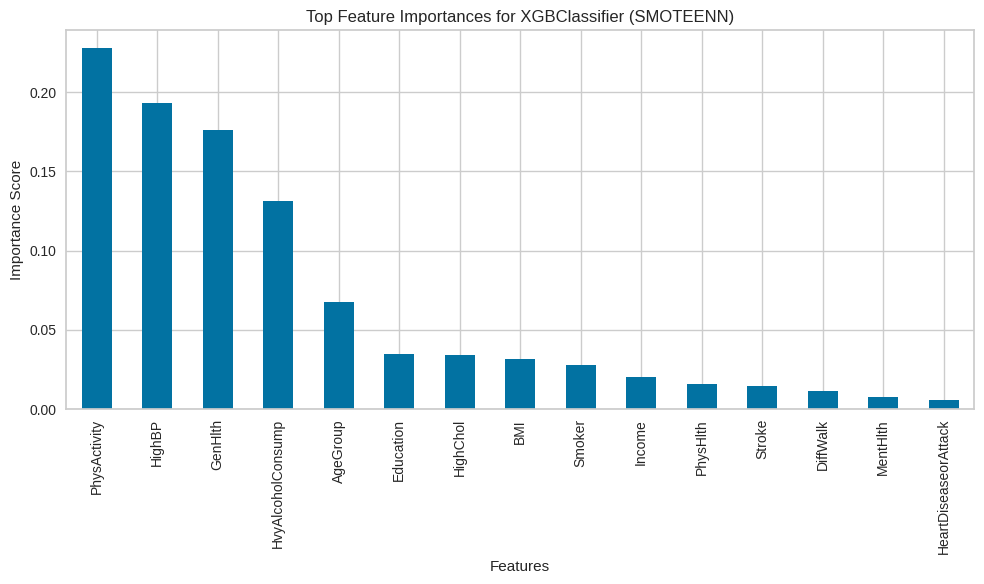

In [ ]:

# Try loading via PyCaret, otherwise fallback to joblib
try:
    from pycaret.classification import load_model
    model = load_model('XGBClassifier_SMOTEENN')
except ImportError:
    import joblib
    model = joblib.load('XGBClassifier_SMOTEENN.pkl')

# Extract underlying XGBoost estimator if wrapped
estimator = getattr(model, 'pipeline', None)
if estimator:
    estimator = model.pipeline[-1][1]  # last step of pipeline
else:
    estimator = model  # assume model itself is the estimator

# Retrieve feature importances and map to feature names
features = cols_list  # predefined list of feature column names
importances = estimator.feature_importances_

# Prepare DataFrame for plotting
df_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
df_imp.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top Feature Importances for XGBClassifier (SMOTEENN)')
plt.tight_layout()
plt.show()

## TEST WITH 2021 DATA

In [ ]:
import pandas as pd
from pycaret.classification import load_model, predict_model
from sklearn.metrics import classification_report

# ——————————————
# 1) Leer CSV BRFSS 2021 y renombrar la columna de edad
df21 = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2021.csv")

# Renombramos 'Age' a 'AgeGroup' para que coincida con el pipeline
df21 = df21.rename(columns={"Age": "AgeGroup"})

# ——————————————
# 2) Seleccionar columnas esperadas + limpiar
cols_model = [
    'Diabetes_binary',
    'HighBP','HighChol','BMI','Smoker','Stroke',
    'HeartDiseaseorAttack','PhysActivity','HvyAlcoholConsump',
    'GenHlth','MentHlth','PhysHlth','DiffWalk',
    'AgeGroup','Education','Income'
]
df21 = df21[cols_model].dropna().reset_index(drop=True)

# ——————————————
# 3) Separar X / y
X21 = df21.drop('Diabetes_binary', axis=1)
y21 = df21['Diabetes_binary']

print("2021 data shape:", df21.shape)
print("Class distribution:\n", y21.value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

# ——————————————
# 4) Evaluar los modelos guardados sobre 2021
model_names = [
    "RandomForestClassifier_SMOTETomek",
    "ExtraTreesClassifier_SMOTETomek",
    "XGBClassifier_SMOTETomek",
    "RandomForestClassifier_SMOTEENN",
    "ExtraTreesClassifier_SMOTEENN",
    "XGBClassifier_SMOTEENN"
]

for name in model_names:
    model = load_model(f"{name}")
    preds = predict_model(model, data=df21)

    # Extraer predicción
    y_true = preds['Diabetes_binary']
    if 'prediction_label' in preds.columns:
        y_pred = preds['prediction_label']
    else:
        y_pred = preds['Label']

    print(f"\n=== {name} on BRFSS2021 ===")
    print(classification_report(y_true, y_pred, digits=4))


2021 data shape: (236378, 16)
Class distribution:
 Diabetes_binary
0.0    85.80%
1.0    14.20%
Name: proportion, dtype: object
Transformation Pipeline and Model Successfully Loaded



=== RandomForestClassifier_SMOTETomek on BRFSS2021 ===
              precision    recall  f1-score   support

         0.0     0.9074    0.7934    0.8466    202810
         1.0     0.2905    0.5110    0.3704     33568

    accuracy                         0.7533    236378
   macro avg     0.5990    0.6522    0.6085    236378
weighted avg     0.8198    0.7533    0.7790    236378

Transformation Pipeline and Model Successfully Loaded



=== ExtraTreesClassifier_SMOTETomek on BRFSS2021 ===
              precision    recall  f1-score   support

         0.0     0.9032    0.8177    0.8583    202810
         1.0     0.2994    0.4706    0.3659     33568

    accuracy                         0.7684    236378
   macro avg     0.6013    0.6441    0.6121    236378
weighted avg     0.8175    0.7684    0.7884    236378

Transformation Pipeline and Model Successfully Loaded



=== XGBClassifier_SMOTETomek on BRFSS2021 ===
              precision    recall  f1-score   support

         0.0     0.9426    0.6460    0.7666    202810
         1.0     0.2628    0.7625    0.3909     33568

    accuracy                         0.6626    236378
   macro avg     0.6027    0.7042    0.5788    236378
weighted avg     0.8461    0.6626    0.7133    236378

Transformation Pipeline and Model Successfully Loaded



=== RandomForestClassifier_SMOTEENN on BRFSS2021 ===
              precision    recall  f1-score   support

         0.0     0.9328    0.7390    0.8246    202810
         1.0     0.3007    0.6781    0.4167     33568

    accuracy                         0.7303    236378
   macro avg     0.6167    0.7086    0.6206    236378
weighted avg     0.8430    0.7303    0.7667    236378

Transformation Pipeline and Model Successfully Loaded



=== ExtraTreesClassifier_SMOTEENN on BRFSS2021 ===
              precision    recall  f1-score   support

         0.0     0.9287    0.7571    0.8341    202810
         1.0     0.3065    0.6488    0.4164     33568

    accuracy                         0.7417    236378
   macro avg     0.6176    0.7029    0.6253    236378
weighted avg     0.8403    0.7417    0.7748    236378

Transformation Pipeline and Model Successfully Loaded



=== XGBClassifier_SMOTEENN on BRFSS2021 ===
              precision    recall  f1-score   support

         0.0     0.9453    0.6795    0.7907    202810
         1.0     0.2825    0.7626    0.4123     33568

    accuracy                         0.6913    236378
   macro avg     0.6139    0.7210    0.6015    236378
weighted avg     0.8512    0.6913    0.7369    236378

